#Libraries

In [1]:
#mounting google drive to load datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#libaries
import pandas as pd
import json
import numpy as np
import re
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import joblib

# Load and merge data

##feedback_2019

In [3]:
# Load labels from tsv format
feedback_2019_labels = pd.read_table("/content/drive/MyDrive/BOT DETECTION THESIS/feedback-2019/botometer-feedback-2019.tsv", header=None)
feedback_2019_labels.rename(columns={feedback_2019_labels.columns[0]: 'user.id', feedback_2019_labels.columns[1]: 'label'}, inplace=True)

# Load user objects from json format
with open('/content/drive/MyDrive/BOT DETECTION THESIS/feedback-2019/botometer-feedback-2019_tweets.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Create a DataFrame from the loaded JSON data
feedback_2019_users = pd.json_normalize(data)

# Merge labels and user objects on the "user.id" column
merged_feedback_2019 = feedback_2019_users.merge(feedback_2019_labels, on="user.id", how="inner")

# Check shape
merged_feedback_2019.shape

(519, 45)

##rtbust_2019

In [4]:
# Load labels from tsv format
rtbust_2019_labels = pd.read_table("/content/drive/MyDrive/BOT DETECTION THESIS/rtbust-2019/cresci-rtbust-2019.tsv", header=None)
rtbust_2019_labels.rename(columns={rtbust_2019_labels.columns[0]: 'user.id', rtbust_2019_labels.columns[1]: 'label'}, inplace=True)

# Load user objects from json format
with open('/content/drive/MyDrive/BOT DETECTION THESIS/rtbust-2019/cresci-rtbust-2019_tweets.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Create a DataFrame from the loaded JSON data
rtbust_2019_users = pd.json_normalize(data)

# Merge labels and user objects on the "user.id" column
merged_rtbust_2019 = rtbust_2019_users.merge(rtbust_2019_labels, on="user.id", how="inner")

# Check chape
merged_rtbust_2019.shape

(693, 45)

##gilani_2017

In [5]:
# Load labels from tsv format
gilani_2017_labels = pd.read_table("/content/drive/MyDrive/BOT DETECTION THESIS/gilani-2017/other/gilani-2017.tsv", header=None)
gilani_2017_labels.rename(columns={gilani_2017_labels.columns[0]: 'user.id', gilani_2017_labels.columns[1]: 'label'}, inplace=True)

# Load user objects from json format
with open('/content/drive/MyDrive/BOT DETECTION THESIS/gilani-2017/other/gilani-2017_tweets.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Create a DataFrame from the loaded JSON data
gilani_2017_users = pd.json_normalize(data)

# Merge labels and user objects on the "user.id" column
merged_gilani_2017 = gilani_2017_users.merge(gilani_2017_labels, on="user.id", how="inner")

# Check shape
merged_gilani_2017.shape

(2503, 45)

##cresci_2015

In [6]:
#E13 all humans dataset
E13_humans = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2015/E13/E13_users.csv')

#E13 tweets dataset
E13_tweets = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2015/E13/E13_tweets.csv', encoding='latin-1')

#Add label column denoting humans
E13_humans['label'] = 0

In [7]:
# Fake followers aka bots
FSF_bots = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2015/FSF/FSF_users.csv')

# Tweets
FSF_tweets = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2015/FSF/FSF_tweets.csv', encoding='latin-1')

#Add label column denoting humans
FSF_bots['label'] = 1

In [8]:
# Bought fake followers aka bots
INT_bots = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2015/INT/INT_users.csv')

# Tweets
INT_tweets = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2015/INT/INT_tweets.csv', encoding='latin-1', low_memory=False)

#Add label column denoting humans
INT_bots['label'] = 1

In [9]:
#TFP all humans dataset
TFP_humans = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2015/TFP/TFP_users.csv')

# Tweets
TFP_tweets = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2015/TFP/TFP_tweets.csv', encoding='latin-1')

#Add label column denoting humans
TFP_humans['label'] = 0

In [10]:
# Fake followers aka bots
TWT_bots = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2015/TWT/TWT_users.csv')

#Tweets
TWT_tweets = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2015/TWT/TWT_tweets.csv', encoding='latin-1')

#Add label column denoting humans
TWT_bots['label'] = 1

Merge all datasets

In [11]:
# Datasets to merge
df_to_merge = [E13_humans, FSF_bots, INT_bots, TFP_humans, TWT_bots]

# Concatenate all DataFrames in the list
merged_cresci_2015 = pd.concat(df_to_merge, ignore_index=True)
merged_cresci_2015.rename(columns={'id': 'user.id'}, inplace=True)

# Check shape
merged_cresci_2015.shape

(5301, 35)

## twibot_20

In [12]:
# Load user objects from train dataset
with open('/content/drive/MyDrive/BOT DETECTION THESIS/twitbot-20/TwiBot-20 2/train.json', 'r', encoding='utf-8') as json_file:
    data_twibot_20 = json.load(json_file)

# Create a DataFrame from the loaded JSON data
X_train_twibot_20 = pd.json_normalize(data_twibot_20)
X_train_twibot_20.rename(columns={'ID': 'user.id'}, inplace=True)

# Load user objects from test dataset
with open('/content/drive/MyDrive/BOT DETECTION THESIS/twitbot-20/TwiBot-20 2/test.json', 'r', encoding='utf-8') as json_file:
    test_twibot_20 = json.load(json_file)

# Create a DataFrame from the loaded JSON data
X_test_twibot_20 = pd.json_normalize(test_twibot_20)
X_test_twibot_20.rename(columns={'ID': 'user.id'}, inplace=True)

# Load user objects from validation dataset
with open('/content/drive/MyDrive/BOT DETECTION THESIS/twitbot-20/TwiBot-20 2/dev.json', 'r', encoding='utf-8') as json_file:
    data_twibot_20_val = json.load(json_file)

# Create a DataFrame from the loaded JSON data
X_val_twibot_20 = pd.json_normalize(data_twibot_20_val)
X_val_twibot_20.rename(columns={'ID': 'user.id'}, inplace=True)

print(X_train_twibot_20.shape)
print(X_test_twibot_20.shape)
print(X_val_twibot_20.shape)

(8278, 45)
(1183, 45)
(2365, 45)


## yang_2013

In [13]:
file_path_humans = '/content/drive/MyDrive/BOT DETECTION THESIS/yang-2013/NormalData/users.txt'
file_path_bots = '/content/drive/MyDrive/BOT DETECTION THESIS/yang-2013/MalData/users.txt'

def split_outside_quotes(s):
    """This function splits a string on commas that are outside of quotes."""
    in_quotes = False
    split_indices = [-1]  # Initialize with -1 for the first split
    for i, char in enumerate(s):
        if char in ["'", '"'] and (i == 0 or s[i-1] != '\\'):  # Check for unescaped quotes
            in_quotes = not in_quotes
        if char == "," and not in_quotes:
            split_indices.append(i)
    split_indices.append(len(s))  # Add the end of the string for the last split
    return [s[split_indices[j]+1:split_indices[j+1]].strip() for j in range(len(split_indices)-1)]

In [14]:
# HUMANS file
# Initialize empty lists to store values for each attribute/column of the dataset.
user_ids = []
background_urls = []
account_creation_times = []
descriptions = []
favourites_counts = []
followers_counts = []
followings_counts = []
geo_enableds = []
locations = []
names = []
image_urls = []
protecteds= []
screen_names = []
statuses_counts = []
timezones = []
verifieds = []
lang = []
list_counts = []
bio_urls = []

# Open the file containing the raw data.
with open(file_path_humans, 'r') as file:
    for line in file:
        # Extract user_id by finding the first sequence of digits in the line.
        user_id_match = re.search(r'(\d+)', line)
        user_ids.append(int(user_id_match.group(1))) if user_id_match else user_ids.append(None)

        # Extract background_url by searching for a URL starting with "http://".
        url_match = re.search(r'u\'(http://[^\']+)\'', line)
        background_urls.append(url_match.group(1)) if url_match else background_urls.append(None)

        # Extract account_creation_time by looking for a sequence of digits followed by 'L'.
        act_match = re.search(r'(\d+)L', line)
        account_creation_times.append(act_match.group(1) + 'L') if act_match else account_creation_times.append(None)

        # Extract description using the custom function to split on commas outside quotes.
        columns = split_outside_quotes(line)
        potential_desc = columns[3].strip().lstrip("u'\"").rstrip("'\"")
        descriptions.append(potential_desc if potential_desc != '' else None)

        # Extract the four integer attributes: favourites_count, followers_count, followings_count, and geo_enabled.
        match = re.search(r', (\d+), (\d+), (\d+), (\d+),', line)
        if match:
            favourites_counts.append(int(match.group(1)))
            followers_counts.append(int(match.group(2)))
            followings_counts.append(int(match.group(3)))
            geo_enableds.append(int(match.group(4)))

        # Extract additional attributes using regex matching.
        match = re.search(r', (\d+), (\d+), (\d+), (\d+), u\'([^\']*)\', u\'([^\']*)\', u\'(http://[^\']*)\', (\d+), u\'([^\']*)\', (\d+), u\'([^\']*)\', (\d+)(?:, u\'([^\']*)\')?(?:, (\d+))?(?:, u\'(http://[^\']*)\')?', line)
        if match:
            locations.append(match.group(5))
            names.append(match.group(6))
            image_urls.append(match.group(7))
            protecteds.append(int(match.group(8)))
            screen_names.append(match.group(9))
            statuses_counts.append(int(match.group(10)))
            timezones.append(match.group(11).strip())
            verifieds.append(int(match.group(12)))
            lang.append(match.group(13) if match.group(13) else None)
            list_counts.append(int(match.group(14)) if match.group(14) else None)
            bio_urls.append(match.group(15) if match.group(15) else None)
        else:
            # If the regex pattern didn't match, append None values to all the attributes' lists.
            locations.append(None)
            names.append(None)
            image_urls.append(None)
            protecteds.append(None)
            screen_names.append(None)
            statuses_counts.append(None)
            timezones.append(None)
            verifieds.append(None)
            lang.append(None)
            list_counts.append(None)
            bio_urls.append(None)

# Convert the lists of extracted values into a pandas DataFrame.
yang_2013_humans = pd.DataFrame({
    'user_id': user_ids,
    'background_url': background_urls,
    'account_creation_time': account_creation_times,
    'description': descriptions,
    'favourites_count': favourites_counts,
    'followers_count': followers_counts,
    'followings_count': followings_counts,
    'geo_enabled': geo_enableds,
    'location': locations,
    'name': names,
    'image_url': image_urls,
    'protected_or_not': protecteds,
    'screen_name': screen_names,
    'statuses_counts': statuses_counts,
    'timezone': timezones,
    'verified_or_not': verifieds,
    'lang': lang,
    'list_count': list_counts,
    'bio_urls': bio_urls
})


In [15]:
# BOTS file
# Initialize empty lists to store values for each attribute/column of the dataset.
bots_user_ids = []
bots_background_urls = []
bots_account_creation_times = []
bots_descriptions = []
bots_favourites_counts = []
bots_followers_counts = []
bots_followings_counts = []
bots_geo_enableds = []
bots_locations = []
bots_names = []
bots_image_urls = []
bots_protecteds= []
bots_screen_names = []
bots_statuses_counts = []
bots_timezones = []
bots_verifieds = []
bots_lang = []
bots_list_counts = []
bots_bio_urls = []

# Open the file containing the raw data.
with open(file_path_bots, 'r') as file:
    for line in file:
        # Extract user_id by finding the first sequence of digits in the line.
        user_id_match = re.search(r'(\d+)', line)
        bots_user_ids.append(int(user_id_match.group(1))) if user_id_match else bots_user_ids.append(None)

        # Extract background_url by searching for a URL starting with "http://".
        url_match = re.search(r'u\'(http://[^\']+)\'', line)
        bots_background_urls.append(url_match.group(1)) if url_match else bots_background_urls.append(None)

        # Extract account_creation_time by looking for a sequence of digits followed by 'L'.
        act_match = re.search(r'(\d+)L', line)
        bots_account_creation_times.append(act_match.group(1) + 'L') if act_match else bots_account_creation_times.append(None)

        # Extract description using the custom function to split on commas outside quotes.
        columns = split_outside_quotes(line)
        potential_desc = columns[3].strip().lstrip("u'\"").rstrip("'\"")
        bots_descriptions.append(potential_desc if potential_desc != '' else None)

        # Extract the four integer attributes: favourites_count, followers_count, followings_count, and geo_enabled.
        match = re.search(r', (\d+), (\d+), (\d+), (\d+),', line)
        if match:
            bots_favourites_counts.append(int(match.group(1)))
            bots_followers_counts.append(int(match.group(2)))
            bots_followings_counts.append(int(match.group(3)))
            bots_geo_enableds.append(int(match.group(4)))

        # Extract additional attributes using regex matching.
        match = re.search(r', (\d+), (\d+), (\d+), (\d+), u\'([^\']*)\', u\'([^\']*)\', u\'(http://[^\']*)\', (\d+), u\'([^\']*)\', (\d+), u\'([^\']*)\', (\d+)(?:, u\'([^\']*)\')?(?:, (\d+))?(?:, u\'(http://[^\']*)\')?', line)
        if match:
            bots_locations.append(match.group(5))
            bots_names.append(match.group(6))
            bots_image_urls.append(match.group(7))
            bots_protecteds.append(int(match.group(8)))
            bots_screen_names.append(match.group(9))
            bots_statuses_counts.append(int(match.group(10)))
            bots_timezones.append(match.group(11).strip())
            bots_verifieds.append(int(match.group(12)))
            bots_lang.append(match.group(13) if match.group(13) else None)
            bots_list_counts.append(int(match.group(14)) if match.group(14) else None)
            bots_bio_urls.append(match.group(15) if match.group(15) else None)
        else:
            # If the regex pattern didn't match, append None values to all the attributes' lists.
            bots_locations.append(None)
            bots_names.append(None)
            bots_image_urls.append(None)
            bots_protecteds.append(None)
            bots_screen_names.append(None)
            bots_statuses_counts.append(None)
            bots_timezones.append(None)
            bots_verifieds.append(None)
            bots_lang.append(None)
            bots_list_counts.append(None)
            bots_bio_urls.append(None)

# Convert the lists of extracted values into a pandas DataFrame.
yang_2013_bots = pd.DataFrame({
    'user_id': bots_user_ids,
    'background_url': bots_background_urls,
    'account_creation_time': bots_account_creation_times,
    'description': bots_descriptions,
    'favourites_count': bots_favourites_counts,
    'followers_count': bots_followers_counts,
    'followings_count': bots_followings_counts,
    'geo_enabled': bots_geo_enableds,
    'location': bots_locations,
    'name': bots_names,
    'image_url': bots_image_urls,
    'protected_or_not': bots_protecteds,
    'screen_name': bots_screen_names,
    'statuses_counts': bots_statuses_counts,
    'timezone': bots_timezones,
    'verified_or_not': bots_verifieds,
    'lang': bots_lang,
    'list_count': bots_list_counts,
    'bio_urls': bots_bio_urls
})


In [16]:
#load tweet file bots
file_path_tweets_bots = '/content/drive/MyDrive/BOT DETECTION THESIS/yang-2013/MalData/tweets.txt'

# Lists to store extracted tweet IDs and user IDs
tweet_ids_bots = []
user_ids_bots = []

# Open the text file for reading
with open(file_path_tweets_bots, 'r') as file:
    # Iterate through each line in the file
    for line in file:
        # Use regular expressions to extract the first two integers
        match = re.match(r'\((\d+), (\d+),', line)
        if match:
         tweet_ids_bots.append(int(match.group(1)))
         user_ids_bots.append(int(match.group(2)))

# Convert lists to a DataFrame
yang_2013_tweets_bots = pd.DataFrame({
    'tweet_id': tweet_ids_bots,
    'user_id': user_ids_bots
})


In [17]:
#load tweet file humans
file_path_tweets_humans = '/content/drive/MyDrive/BOT DETECTION THESIS/yang-2013/NormalData/tweets.txt'

# Lists to store extracted tweet IDs and user IDs
tweet_ids_humans = []
user_ids_humans = []

# Open the text file for reading
with open(file_path_tweets_humans, 'r') as file:
    # Iterate through each line in the file
    for line in file:
        # Use regular expressions to extract the first two integers
        match = re.match(r'\((\d+), (\d+),', line)
        if match:
         tweet_ids_humans.append(int(match.group(1)))
         user_ids_humans.append(int(match.group(2)))

# Convert lists to a DataFrame
yang_2013_tweets_humans = pd.DataFrame({
    'tweet_id': tweet_ids_humans,
    'user_id': user_ids_humans
})


Merge datasets

In [18]:
# Add lable column in each dataset
yang_2013_bots["label"] = 1
yang_2013_humans["label"] = 0

# Merge human and bot datsets on user id
merged_yang_2013 = pd.concat([yang_2013_bots, yang_2013_humans], ignore_index=True)
merged_yang_2013.rename(columns={'user_id': 'user.id'}, inplace=True)

# Check df shape
merged_yang_2013.shape

(11000, 20)

## cresci_stock_2018

In [19]:
# Load labels from tsv format
stock_2018_labels = pd.read_table("/content/drive/MyDrive/BOT DETECTION THESIS/stock-2018/cresci-stock-2018.tsv", header=None)
stock_2018_labels.rename(columns={stock_2018_labels.columns[0]: 'user.id', stock_2018_labels.columns[1]: 'label'}, inplace=True)

# Load user objects from json format
with open('/content/drive/MyDrive/BOT DETECTION THESIS/stock-2018/cresci-stock-2018_tweets.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Create a DataFrame from the loaded JSON data
stock_2018_users = pd.json_normalize(data)

# Merge labels and user objects on the "user.id" column
merged_stock_2018 = stock_2018_users.merge(stock_2018_labels, on="user.id", how="inner")

# Check df shape
merged_stock_2018.shape

(13276, 45)

## cresci_2017

In [20]:
#Fake followers 2015 dataset
fake_followers_2015 = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/fake_followers_2015/users.csv')
fake_followers_tweets = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/fake_followers_2015/tweets.csv', encoding='latin-1', low_memory=False)

#Add label column denoting bots
fake_followers_2015['label'] = 1

In [21]:
#Genuine all humans dataset
genuine_accounts = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/genuine_accounts/users.csv')
genuine_accounts_tweets = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/genuine_accounts/tweets.csv', encoding='latin-1', low_memory=False)

#Add label column denoting humans
genuine_accounts['label'] = 0

In [22]:
#social spambots datasets
social_spambots_1 = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/social_spambots_1/users.csv')
social_spambots_2 = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/social_spambots_2/users.csv')
social_spambots_3 = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/social_spambots_3/users.csv')

social_spambots_1_tweets = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/social_spambots_1/tweets.csv', encoding='latin-1', low_memory=False)
social_spambots_2_tweets = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/social_spambots_2/tweets.csv', encoding='latin-1', low_memory=False)
social_spambots_3_tweets = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/social_spambots_3/tweets.csv', encoding='latin-1', low_memory=False)

#Add label column denoting bots
social_spambots_1['label'] = 1
social_spambots_2['label'] = 1
social_spambots_3['label'] = 1

In [23]:
# traditional spambots datasets
trad_spambots_1 = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/traditional_spambots_1/users.csv')
trad_spambots_2 = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/traditional_spambots_2/users.csv')
trad_spambots_3 = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/traditional_spambots_3/users.csv')
trad_spambots_4 = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/traditional_spambots_4/users.csv')

trad_spambots_1_tweets = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/cresci-2017/traditional_spambots_1/tweets.csv', encoding='latin-1', low_memory=False)

#Add label column denoting bots
trad_spambots_1['label'] = 1
trad_spambots_2['label'] = 1
trad_spambots_3['label'] = 1
trad_spambots_4['label'] = 1

Merge datasets

In [24]:
# Merge trad spam bot datasets
df_to_merge_traditional_spambots = [trad_spambots_1, trad_spambots_2, trad_spambots_3, trad_spambots_4]

# Concatenate all DataFrames in the list
merged_traditional_spambots = pd.concat(df_to_merge_traditional_spambots, ignore_index=True)

In [25]:
#Drop test columns from spambots 1 and spambots 3, so all 3 datasets contain the same info
social_spambots_1 = social_spambots_1.drop('test_set_1', axis=1)
social_spambots_3 = social_spambots_3.drop('test_set_2', axis=1)

#Merge social spambots datasets
df_to_merge_social_spambots = [social_spambots_1, social_spambots_2, social_spambots_3]

# Concatenate all DataFrames in the list
merged_social_spambots = pd.concat(df_to_merge_social_spambots, ignore_index=True)

#Merge spambots
merged_spambots = pd.concat([merged_traditional_spambots, merged_social_spambots], ignore_index=True)

In [26]:
#Drop test columns from genuine accounts, so it contains the same information as merged spambots
columns_to_drop = ['test_set_1', 'test_set_2']
genuine_accounts = genuine_accounts.drop(columns=columns_to_drop)

#Merge spambots and genuine accounts
merged_spambots_gen_accounts = pd.concat([merged_spambots, genuine_accounts], ignore_index=True)

In [27]:
# Get the 'created_at' column
created_at_column = fake_followers_2015.pop('created_at')

# Insert 'created_at' column at index 36
fake_followers_2015.insert(36, 'created_at', created_at_column)

# Insert 'timestamp' column at index 37 and 'crawled_at' column at index 38 filled with nan to match the merged dataset structure
# Explicitly writing NaN value as a string so its treated as an object to match datatypes in merged dataset to avoid additional columns upon merging
fake_followers_2015.insert(37, 'timestamp', 'NaN')
fake_followers_2015.insert(38, 'crawled_at', 'NaN')

In [28]:
# Concatenate the two DataFrames horizontally
merged_cresci_2017 = pd.concat([merged_spambots_gen_accounts, fake_followers_2015], ignore_index=True)
merged_cresci_2017.rename(columns={'id': 'user.id'}, inplace=True)

#Check df shape
merged_cresci_2017.shape

(14368, 41)

## caverlee_2011

In [29]:
# Define the column names
column_names_caverlee_2011_users = ["UserID", "CreatedAt", "CollectedAt", "NumberOfFollowings", "NumberOfFollowers", "NumberOfTweets", "LengthOfScreenName", "LengthOfDescriptionInUserProfile"]

# Load the data
caverlee_2011_bots = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/caverlee-2011/txt/content_polluters.txt',
                                 delimiter='\t', header=None, names=column_names_caverlee_2011_users)
caverlee_2011_humans = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/caverlee-2011/txt/legitimate_users.txt',
                                   delimiter='\t', header=None, names=column_names_caverlee_2011_users)

# Add lable column in each dataset
caverlee_2011_bots["label"] = 1
caverlee_2011_humans["label"] = 0

# Merge human and bot datsets on user id
merged_caverlee_2011 = pd.concat([caverlee_2011_bots, caverlee_2011_humans], ignore_index=True)
merged_caverlee_2011.rename(columns={'UserID': 'user.id'}, inplace=True)

# Check df shape
merged_caverlee_2011.shape

(41499, 9)

## midterm_2018

In [30]:
# Load labels from tsv format
midterm_2018_labels = pd.read_table("/content/drive/MyDrive/BOT DETECTION THESIS/midterm-2018/midterm-2018.tsv", header=None)
midterm_2018_labels.rename(columns={midterm_2018_labels.columns[0]: 'user_id', midterm_2018_labels.columns[1]: 'label'}, inplace=True)

# Load user objects from json format
with open('/content/drive/MyDrive/BOT DETECTION THESIS/midterm-2018/midterm-2018_processed_user_objects.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Create a DataFrame from the loaded JSON data
midterm_2018_users = pd.json_normalize(data)

# Merge labels and user objects on the "user.id" column
merged_midterm_2018 = midterm_2018_users.merge(midterm_2018_labels, on="user_id", how="inner")
merged_midterm_2018.rename(columns={'user_id': 'user.id'}, inplace=True)

# Check df shape before cheking duplicate ids
merged_midterm_2018.shape

(50538, 20)

## twibot_22

In [31]:
twibot_22_labels = pd.read_csv('/content/drive/MyDrive/BOT DETECTION THESIS/twitbot-22/label.csv')

# Load user objects from json format
with open('/content/drive/MyDrive/BOT DETECTION THESIS/twitbot-22/user.json', 'r', encoding='utf-8') as json_file:
    data_twibot_22 = json.load(json_file)

# Create a DataFrame from the loaded JSON data
twibot_22_users = pd.json_normalize(data_twibot_22)

# Merge labels and user objects on the "user.id" column
merged_twibot_22 = twibot_22_users.merge(twibot_22_labels, on="id", how="inner")
merged_twibot_22.rename(columns={'id': 'user.id'}, inplace=True)

# Check df shape
merged_twibot_22.shape

(1000000, 24)

#Dataset pre-processing
The following steps are applied:
- binary label encoding
- removing duplicate user ids within each dataset
- removing duplicate user ids among all datasets
- extracting information such as tweet_count
- dropping uncommon features
- handling missing values
- splitting data into training, validation and test sets
- extracting human/bot count information per set

## Binary label encoding

In [32]:
# matching label types across all datasets
dataset_names = [
    "merged_feedback_2019",
    "merged_rtbust_2019",
    "merged_gilani_2017",
    "merged_cresci_2015",
    "X_train_twibot_20",
    "X_test_twibot_20",
    "X_val_twibot_20",
    "merged_yang_2013",
    "merged_stock_2018",
    "merged_cresci_2017",
    "merged_caverlee_2011",
    "merged_midterm_2018",
    "merged_twibot_22"
]

datasets_group = [
    merged_feedback_2019,
    merged_rtbust_2019,
    merged_gilani_2017,
    merged_cresci_2015,
    X_train_twibot_20,
    X_test_twibot_20,
    X_val_twibot_20,
    merged_yang_2013,
    merged_stock_2018,
    merged_cresci_2017,
    merged_caverlee_2011,
    merged_midterm_2018,
    merged_twibot_22
]

for i, dataset in enumerate(datasets_group):
    dataset_name = dataset_names[i]
    label_type = type(dataset.iloc[0]['label'])
    label_value = dataset.iloc[0]['label']

    # Check if the label_type is int and label_value is either 0 or 1
    if label_value in ["human", "bot"]:
        # Replace all values in the "label" column
        dataset['label'] = dataset['label'].replace({'human': 0, 'bot': 1})

## Removing duplicate user ids within each dataset

feedback_2019

In [33]:
# Check for duplicated values in the "user_id" column
duplicates_feedback = merged_feedback_2019[merged_feedback_2019["user.id"].duplicated(keep=False)]

# The keep=False parameter marks all duplicates as True

if not duplicates_feedback.empty:
    print("Duplicated user IDs:")
    print(duplicates_feedback['user.id'])
else:
    print("No duplicated user IDs found.")

Duplicated user IDs:
449    755808822506041344
450    755808822506041344
Name: user.id, dtype: int64


In [34]:
# Check labels of duplicate ids
duplicate_rows_feedback = merged_feedback_2019[merged_feedback_2019["user.id"] == 755808822506041344]
duplicate_rows_feedback[['user.id', 'label']]

,user.id,label
449,755808822506041344,0
450,755808822506041344,1


In [35]:
# Drop all rows with duplicate ids
merged_feedback_2019 = merged_feedback_2019.drop_duplicates(subset="user.id", keep=False)

In [36]:
# Check df shape after removing duplicate ids
merged_feedback_2019.shape

(517, 45)

rtbust_2019

In [37]:
# Check for duplicated values in the "user_id" column
duplicates_rtbust = merged_rtbust_2019[merged_rtbust_2019["user.id"].duplicated(keep=False)]

# The keep=False parameter marks all duplicates as True

if not duplicates_rtbust.empty:
    print("Duplicated user IDs:")
    print(duplicates_rtbust['user.id'])
else:
    print("No duplicated user IDs found.")

No duplicated user IDs found.


gilani_2017

In [38]:
# Check for duplicated values in the "user_id" column
duplicates_gilani = merged_gilani_2017[merged_gilani_2017["user.id"].duplicated(keep=False)]

# The keep=False parameter marks all duplicates as True

if not duplicates_gilani.empty:
    print("Duplicated user IDs:")
    print(duplicates_gilani['user.id'])
    print(len(duplicates_gilani))
else:
    print("No duplicated user IDs found.")

Duplicated user IDs:
9         19129949
10        19129949
130       19564719
131       19564719
363      384331504
364      384331504
481      234513598
482      234513598
839     2406546896
840     2406546896
887      108196938
888      108196938
986      113816349
987      113816349
1063     172729719
1064     172729719
1335      39985029
1336      39985029
1442      16186995
1443      16186995
1714     161452925
1715     161452925
1766     413841846
1767     413841846
1777     141161453
1778     141161453
1877    2309234977
1878    2309234977
2141      23042027
2142      23042027
2180     624995677
2181     624995677
2382     212266188
2383     212266188
2417     135236273
2418     135236273
2486     171337448
2487     171337448
Name: user.id, dtype: int64
38


In [39]:
# Check labels of duplicate ids
duplicate_rows_gilani = merged_gilani_2017[merged_gilani_2017["user.id"].isin(duplicates_gilani['user.id'])]
duplicate_rows_gilani[['user.id', 'label']]

,user.id,label
9,19129949,1
10,19129949,0
130,19564719,1
131,19564719,0
363,384331504,1
364,384331504,0
481,234513598,1
482,234513598,0
839,2406546896,1
840,2406546896,0


In [40]:
# Drop all rows with duplicate ids
merged_gilani_2017 = merged_gilani_2017.drop_duplicates(subset="user.id", keep=False)

cresci_2015

In [41]:
# Check for duplicated values in the "user_id" column
duplicates_cresci_2015 = merged_cresci_2015[merged_cresci_2015["user.id"].duplicated(keep=False)]

# The keep=False parameter marks all duplicates as True

if not duplicates_cresci_2015.empty:
    print("Duplicated user IDs:")
    print(duplicates_cresci_2015['user.id'].values)
else:
    print("No duplicated user IDs found.")

No duplicated user IDs found.


twibot_20

In [42]:
# Create a list of DataFrames for the datasets to check
datasets_to_check = [X_train_twibot_20, X_test_twibot_20, X_val_twibot_20]

# Initialize a list to store the names of datasets with duplicate user IDs
datasets_with_duplicates = []

# Check for duplicate user IDs within each dataset
for dataset_name, dataset in zip(["Train Set", "Test Set", "Validation Set"], datasets_to_check):
    duplicate_user_ids = dataset[dataset.duplicated(subset='user.id', keep=False)]['user.id']

    if not duplicate_user_ids.empty:
        datasets_with_duplicates.append(f"{dataset_name} contains duplicate user IDs: {', '.join(map(str, duplicate_user_ids))}")

# Check if there are any datasets with duplicate user IDs
if datasets_with_duplicates:
    print("Datasets with duplicate user IDs:")
    for dataset_info in datasets_with_duplicates:
        print(dataset_info)
else:
    print("No duplicate user IDs found in the datasets.")


No duplicate user IDs found in the datasets.


yang_2013

In [43]:
# Check for duplicated values in the "user_id" column
duplicates_yang_2013 = merged_yang_2013[merged_yang_2013["user.id"].duplicated(keep=False)]

# The keep=False parameter marks all duplicates as True

if not duplicates_yang_2013.empty:
    print("Duplicated user IDs:")
    print(duplicates_yang_2013['user.id'])
else:
    print("No duplicated user IDs found.")

No duplicated user IDs found.


stock_2018

In [44]:
# Check for duplicated values in the "user_id" column
duplicates_stock = merged_stock_2018[merged_stock_2018["user.id"].duplicated(keep=False)]

# The keep=False parameter marks all duplicates as True

if not duplicates_stock.empty:
    print("Duplicated user IDs:")
    print(duplicates_stock['user.id'])
else:
    print("No duplicated user IDs found.")

No duplicated user IDs found.


cresci_2017

In [45]:
# Check for duplicated values in the "user_id" column
duplicates_cresci_2017 = merged_cresci_2017[merged_cresci_2017["user.id"].duplicated(keep=False)]

# The keep=False parameter marks all duplicates as True

if not duplicates_cresci_2017.empty:
    print("Duplicated user IDs:")
    print(duplicates_cresci_2017['user.id'].values)
else:
    print("No duplicated user IDs found.")

No duplicated user IDs found.


caverlee_2011

In [46]:
# Check for duplicated values in the "user_id" column
duplicates_caverlee_2011 = merged_caverlee_2011[merged_caverlee_2011['user.id'].duplicated(keep=False)]

# The keep=False parameter marks all duplicates as True

if not duplicates_caverlee_2011.empty:
    print("Duplicated user IDs:")
    print(duplicates_caverlee_2011['user.id'])
else:
    print("No duplicated user IDs found.")

Duplicated user IDs:
260      14119816
703      15958265
811      16413061
892      16681194
1007     17143323
           ...   
40361    87464209
40651    89022461
40999    90386901
41000    90393562
41207    91369358
Name: user.id, Length: 88, dtype: int64


In [47]:
# Check labels of duplicate ids
duplicate_rows_caverlee = merged_caverlee_2011[merged_caverlee_2011['user.id'].isin(duplicates_caverlee_2011['user.id'])]
duplicate_rows_caverlee[['user.id', 'label']].sort_values(by='user.id', ascending=True)

,user.id,label
260,14119816,1
23248,14119816,0
24233,15958265,0
703,15958265,1
811,16413061,1
...,...,...
9138,90386901,1
41000,90393562,0
9141,90393562,1
9373,91369358,1


In [48]:
# Drop all rows with duplicate ids
merged_caverlee_2011 = merged_caverlee_2011.drop_duplicates(subset="user.id", keep=False)

midterm_2018

In [49]:
# Check for duplicated values in the "user_id" column
duplicates_midterm = merged_midterm_2018[merged_midterm_2018["user.id"].duplicated(keep=False)]

# The keep=False parameter marks all duplicates as True

if not duplicates_midterm.empty:
    print("Duplicated user IDs:")
    print(duplicates_midterm['user.id'].values)
else:
    print("No duplicated user IDs found.")

No duplicated user IDs found.


twibot_22

In [50]:
# Check for duplicated values in the "user_id" column
duplicates_twibot_22 = merged_twibot_22[merged_twibot_22["user.id"].duplicated(keep=False)]

# The keep=False parameter marks all duplicates as True

if not duplicates_twibot_22.empty:
    print("Duplicated user IDs:")
    print(duplicates_twibot_22['user.id'])
else:
    print("No duplicated user IDs found.")

No duplicated user IDs found.


## Removing duplicate user ids among all datasets

In [51]:
# matching label types across all datasets
dataset_names = [
    "merged_feedback_2019",
    "merged_rtbust_2019",
    "merged_gilani_2017",
    "merged_cresci_2015",
    "X_train_twibot_20",
    "X_test_twibot_20",
    "X_val_twibot_20",
    "merged_yang_2013",
    "merged_stock_2018",
    "merged_cresci_2017",
    "merged_caverlee_2011",
    "merged_midterm_2018",
    "merged_twibot_22"
]

datasets_group = [
    merged_feedback_2019,
    merged_rtbust_2019,
    merged_gilani_2017,
    merged_cresci_2015,
    X_train_twibot_20,
    X_test_twibot_20,
    X_val_twibot_20,
    merged_yang_2013,
    merged_stock_2018,
    merged_cresci_2017,
    merged_caverlee_2011,
    merged_midterm_2018,
    merged_twibot_22
]

In [52]:
# Initialize a list of sets to store user IDs for each dataset group
user_ids_groups = [set() for _ in range(len(datasets_group))]

# Initialize a dictionary to store overlapping user IDs per overlapping dataset
overlapping_user_ids = {dataset_name: [] for dataset_name in dataset_names}

# Extract user IDs from each dataset group
for i, dataset in enumerate(datasets_group):
    user_ids_groups[i].update(dataset['user.id'])

# Check for overlapping user IDs between dataset groups
for i in range(len(datasets_group)):
    for j in range(i + 1, len(datasets_group)):
        overlap = user_ids_groups[i].intersection(user_ids_groups[j])
        if overlap:
            dataset1_name = dataset_names[i]
            dataset2_name = dataset_names[j]
            overlapping_user_ids[dataset1_name].append((dataset2_name, overlap))
            overlapping_user_ids[dataset2_name].append((dataset1_name, overlap))

# Print the overlapping user IDs per overlapping dataset
for dataset_name, overlaps in overlapping_user_ids.items():
    if overlaps:
        print(f"Overlapping user IDs for {dataset_name}:")
        for other_dataset, ids in overlaps:
          if(len(ids) < 10):
            print(f"  - With {other_dataset}: {len(ids), ids}")
          else:
            print(f"  - With {other_dataset}: {len(ids)}")
    else:
        print(f"No overlapping user IDs found for {dataset_name}.")

Overlapping user IDs for merged_feedback_2019:
  - With merged_gilani_2017: (1, {304679484})
  - With merged_yang_2013: (1, {86391789})
  - With merged_cresci_2017: (1, {96435556})
  - With merged_midterm_2018: (1, {789969215650422784})
No overlapping user IDs found for merged_rtbust_2019.
Overlapping user IDs for merged_gilani_2017:
  - With merged_feedback_2019: (1, {304679484})
  - With merged_yang_2013: 20
  - With merged_stock_2018: (1, {14216123})
  - With merged_cresci_2017: (1, {425528043})
  - With merged_caverlee_2011: (5, {15846407, 43563720, 26902613, 9609372, 39927901})
  - With merged_midterm_2018: (2, {16083576, 15485441})
Overlapping user IDs for merged_cresci_2015:
  - With merged_cresci_2017: 3351
  - With merged_caverlee_2011: (1, {22624920})
No overlapping user IDs found for X_train_twibot_20.
No overlapping user IDs found for X_test_twibot_20.
No overlapping user IDs found for X_val_twibot_20.
Overlapping user IDs for merged_yang_2013:
  - With merged_feedback_2019

In [53]:
def remove_rows_with_matching_userid(df1, df2, df1_name, df2_name):
    overlapping_ids = set(df1['user.id']) & set(df2['user.id'])

    if not overlapping_ids:
        print(f"No overlapping IDs between {df1_name} and {df2_name}")
        return df1, df2

    for overlapping_id in overlapping_ids:
        first_label = df1.loc[df1['user.id'] == overlapping_id, 'label'].values
        second_label = df2.loc[df2['user.id'] == overlapping_id, 'label'].values

        if first_label[0] == second_label[0]:
          # Check which DataFrame has more rows with the assigned label
          label_to_check = first_label[0]
          df1_label_count = len(df1[df1['label'] == label_to_check])
          df2_label_count = len(df2[df2['label'] == label_to_check])

          # Remove overlapping id from the df that has higher number of rows with assigned label
          if df1_label_count > df2_label_count:
            df1 = df1.drop(df1[df1['user.id'] == overlapping_id].index)
            print(f'Removed {overlapping_id} from {df1_name}(labels match)')
          else:
            df2 = df2.drop(df2[df2['user.id'] == overlapping_id].index)
            print(f'Removed {overlapping_id} from {df2_name} (labels match)')

        else:
            df1 = df1.drop(df1[df1['user.id'] == overlapping_id].index)
            df2 = df2.drop(df2[df2['user.id'] == overlapping_id].index)
            print(f'Removed {overlapping_id} from both {df1_name} and {df2_name} (labels do not match)')

    return df1, df2

In [54]:
#feedback_group
merged_feedback_2019, merged_gilani_2017 = remove_rows_with_matching_userid(
    merged_feedback_2019, merged_gilani_2017, 'merged_feedback_2019', 'merged_gilani_2017')

merged_feedback_2019, merged_yang_2013 = remove_rows_with_matching_userid(
    merged_feedback_2019, merged_yang_2013, 'merged_feedback_2019', 'merged_yang_2013')

merged_feedback_2019, merged_cresci_2017 = remove_rows_with_matching_userid(
    merged_feedback_2019, merged_cresci_2017, 'merged_feedback_2019', 'merged_cresci_2017')

merged_feedback_2019, merged_midterm_2018 = remove_rows_with_matching_userid(
    merged_feedback_2019, merged_midterm_2018, 'merged_feedback_2019', 'merged_midterm_2018')

Removed 304679484 from merged_gilani_2017 (labels match)
Removed 86391789 from both merged_feedback_2019 and merged_yang_2013 (labels do not match)
Removed 96435556 from merged_cresci_2017 (labels match)
Removed 789969215650422784 from both merged_feedback_2019 and merged_midterm_2018 (labels do not match)


In [55]:
# gilani_2017 group
merged_gilani_2017, merged_feedback_2019 = remove_rows_with_matching_userid(merged_gilani_2017, merged_feedback_2019, 'merged_gilani_2017', 'merged_feedback_2019')
merged_gilani_2017, merged_yang_2013 = remove_rows_with_matching_userid(merged_gilani_2017, merged_yang_2013, 'merged_gilani_2017', 'merged_yang_2013')
merged_gilani_2017, merged_cresci_2017 = remove_rows_with_matching_userid(merged_gilani_2017, merged_cresci_2017, 'merged_gilani_2017', 'merged_cresci_2017')
merged_gilani_2017, merged_midterm_2018 = remove_rows_with_matching_userid(merged_gilani_2017, merged_midterm_2018, 'merged_gilani_2017', 'merged_midterm_2018')
merged_gilani_2017, merged_caverlee_2011 = remove_rows_with_matching_userid(merged_gilani_2017, merged_caverlee_2011, 'merged_gilani_2017', 'merged_caverlee_2011')
merged_gilani_2017, merged_stock_2018 = remove_rows_with_matching_userid(merged_gilani_2017, merged_stock_2018, 'merged_gilani_2017', 'merged_stock_2018')

No overlapping IDs between merged_gilani_2017 and merged_feedback_2019
Removed 717313 from both merged_gilani_2017 and merged_yang_2013 (labels do not match)
Removed 6017542 from both merged_gilani_2017 and merged_yang_2013 (labels do not match)
Removed 780050 from merged_yang_2013 (labels match)
Removed 24100116 from both merged_gilani_2017 and merged_yang_2013 (labels do not match)
Removed 35293850 from both merged_gilani_2017 and merged_yang_2013 (labels do not match)
Removed 18806575 from both merged_gilani_2017 and merged_yang_2013 (labels do not match)
Removed 24502450 from merged_yang_2013 (labels match)
Removed 31444922 from both merged_gilani_2017 and merged_yang_2013 (labels do not match)
Removed 22885574 from merged_yang_2013 (labels match)
Removed 22411342 from both merged_gilani_2017 and merged_yang_2013 (labels do not match)
Removed 52876623 from merged_yang_2013 (labels match)
Removed 2557521 from both merged_gilani_2017 and merged_yang_2013 (labels do not match)
Removed

In [56]:
# cresci_2015 group
merged_cresci_2015, merged_caverlee_2011 = remove_rows_with_matching_userid(merged_cresci_2015, merged_caverlee_2011, 'merged_cresci_2015', 'merged_caverlee_2011')

# removing from cresci-2017
overlapping_ids_cresci = set(merged_cresci_2015['user.id']).intersection(merged_cresci_2017['user.id'])
counter = 0

# Iterate through the overlapping IDs
for overlapping_id in overlapping_ids_cresci:
    # Get the labels for cresci_2015 and cresci_2017 for the current ID
    label_cresci_2015 = merged_cresci_2015.loc[merged_cresci_2015['user.id'] == overlapping_id, 'label'].values
    label_cresci_2017 = merged_cresci_2017.loc[merged_cresci_2017['user.id'] == overlapping_id, 'label'].values

    # Check if labels match
    if label_cresci_2015[0] == label_cresci_2017[0]:
        # Remove the ID from cresci-2017
        merged_cresci_2017 = merged_cresci_2017[merged_cresci_2017['user.id'] != overlapping_id]
        counter +=1

print(f'Removed {counter} matching labels from cresci-2017')

Removed 22624920 from merged_caverlee_2011 (labels match)
Removed 3351 matching labels from cresci-2017


In [57]:
# yang_2013 group
merged_yang_2013, merged_feedback_2019 = remove_rows_with_matching_userid(merged_yang_2013, merged_feedback_2019, 'merged_yang_2013', 'merged_feedback_2019')
merged_yang_2013, merged_gilani_2017 = remove_rows_with_matching_userid(merged_yang_2013, merged_gilani_2017, 'merged_yang_2013', 'merged_gilani_2017')
merged_yang_2013, merged_stock_2018 = remove_rows_with_matching_userid(merged_yang_2013, merged_stock_2018, 'merged_yang_2013', 'merged_stock_2018')
merged_yang_2013, merged_midterm_2018 = remove_rows_with_matching_userid(merged_yang_2013, merged_midterm_2018, 'merged_yang_2013', 'merged_midterm_2018')
merged_yang_2013, merged_caverlee_2011 = remove_rows_with_matching_userid(merged_yang_2013, merged_caverlee_2011, 'merged_yang_2013', 'merged_caverlee_2011')

No overlapping IDs between merged_yang_2013 and merged_feedback_2019
No overlapping IDs between merged_yang_2013 and merged_gilani_2017
Removed 10415712 from merged_yang_2013(labels match)
Removed 5980142 from merged_yang_2013(labels match)
Removed 61272064 from both merged_yang_2013 and merged_caverlee_2011 (labels do not match)
Removed 26025988 from both merged_yang_2013 and merged_caverlee_2011 (labels do not match)
Removed 46376966 from both merged_yang_2013 and merged_caverlee_2011 (labels do not match)
Removed 15730696 from both merged_yang_2013 and merged_caverlee_2011 (labels do not match)
Removed 89509898 from both merged_yang_2013 and merged_caverlee_2011 (labels do not match)
Removed 38301710 from both merged_yang_2013 and merged_caverlee_2011 (labels do not match)
Removed 99069972 from both merged_yang_2013 and merged_caverlee_2011 (labels do not match)
Removed 115396629 from both merged_yang_2013 and merged_caverlee_2011 (labels do not match)
Removed 42348571 from both mer

In [58]:
# removing yang overlapping ids from cresci-2017
overlapping_ids_cresci_yang = set(merged_yang_2013['user.id']).intersection(merged_cresci_2017['user.id'])
counter = 0

# Iterate through the overlapping IDs
for overlapping_id in overlapping_ids_cresci_yang:
    # Get the labels for yang_2013 and cresci_2017 for the current ID
    label_yang_2013 = merged_yang_2013.loc[merged_yang_2013['user.id'] == overlapping_id, 'label'].values
    label_cresci_2017 = merged_cresci_2017.loc[merged_cresci_2017['user.id'] == overlapping_id, 'label'].values

    # Check if labels match
    if label_yang_2013[0] == label_cresci_2017[0]:
        # Remove the ID from cresci-2017
        merged_cresci_2017 = merged_cresci_2017[merged_cresci_2017['user.id'] != overlapping_id]
        counter +=1
    else:
        merged_cresci_2017 = merged_cresci_2017[merged_cresci_2017['user.id'] != overlapping_id]
        merged_yang_2013 = merged_yang_2013[merged_yang_2013['user.id'] != overlapping_id]
        print(f'Removed {overlapping_id} from both yang_2013 and cresci_2017 (labels do not match)')

print(f'Removed {counter} matching labels from cresci-2017')

Removed 15947185 from both yang_2013 and cresci_2017 (labels do not match)
Removed 1000 matching labels from cresci-2017


In [59]:
# stock_2018 group
merged_stock_2018, merged_yang_2013 = remove_rows_with_matching_userid(merged_stock_2018, merged_yang_2013, 'merged_stock_2018', 'merged_yang_2013')
merged_stock_2018, merged_gilani_2017 = remove_rows_with_matching_userid(merged_stock_2018, merged_gilani_2017, 'merged_stock_2018', 'merged_gilani_2017')
merged_stock_2018, merged_midterm_2018 = remove_rows_with_matching_userid(merged_stock_2018, merged_midterm_2018, 'merged_stock_2018', 'merged_midterm_2018')
merged_stock_2018, merged_caverlee_2011 = remove_rows_with_matching_userid(merged_stock_2018, merged_caverlee_2011, 'merged_stock_2018', 'merged_caverlee_2011')

No overlapping IDs between merged_stock_2018 and merged_yang_2013
No overlapping IDs between merged_stock_2018 and merged_gilani_2017
Removed 25728346 from merged_midterm_2018 (labels match)
Removed 19755416 from both merged_stock_2018 and merged_caverlee_2011 (labels do not match)
Removed 24025545 from merged_caverlee_2011 (labels match)
Removed 23434516 from merged_caverlee_2011 (labels match)


In [60]:
#cresci_2017 group
merged_cresci_2017, merged_yang_2013 = remove_rows_with_matching_userid(merged_cresci_2017, merged_yang_2013, 'merged_cresci_2017', 'merged_yang_2013')
merged_cresci_2017, merged_gilani_2017 = remove_rows_with_matching_userid(merged_cresci_2017, merged_gilani_2017, 'merged_cresci_2017', 'merged_gilani_2017')
merged_cresci_2017, merged_midterm_2018 = remove_rows_with_matching_userid(merged_cresci_2017, merged_midterm_2018, 'merged_cresci_2017', 'merged_midterm_2018')
merged_cresci_2017, merged_caverlee_2011 = remove_rows_with_matching_userid(merged_cresci_2017, merged_caverlee_2011, 'merged_cresci_2017', 'merged_caverlee_2011')
merged_cresci_2017, merged_cresci_2015 = remove_rows_with_matching_userid(merged_cresci_2017, merged_cresci_2015, 'merged_cresci_2017', 'merged_cresci_2015')
merged_cresci_2017, merged_feedback_2019 = remove_rows_with_matching_userid(merged_cresci_2017, merged_feedback_2019, 'merged_cresci_2017', 'merged_feedback_2019')

No overlapping IDs between merged_cresci_2017 and merged_yang_2013
No overlapping IDs between merged_cresci_2017 and merged_gilani_2017
Removed 14980820 from merged_midterm_2018 (labels match)
Removed 15871870 from merged_midterm_2018 (labels match)
Removed 489042575 from merged_midterm_2018 (labels match)
Removed 17132768 from merged_caverlee_2011 (labels match)
Removed 21253156 from merged_caverlee_2011 (labels match)
Removed 24080811 from both merged_cresci_2017 and merged_caverlee_2011 (labels do not match)
Removed 17890482 from merged_caverlee_2011 (labels match)
Removed 22927611 from both merged_cresci_2017 and merged_caverlee_2011 (labels do not match)
Removed 43259836 from both merged_cresci_2017 and merged_caverlee_2011 (labels do not match)
Removed 75863742 from merged_caverlee_2011 (labels match)
No overlapping IDs between merged_cresci_2017 and merged_cresci_2015
No overlapping IDs between merged_cresci_2017 and merged_feedback_2019


In [61]:
#caverlee_2011 group
merged_caverlee_2011, merged_yang_2013 = remove_rows_with_matching_userid(merged_caverlee_2011, merged_yang_2013, 'merged_caverlee_2011', 'merged_yang_2013')
merged_caverlee_2011, merged_gilani_2017 = remove_rows_with_matching_userid(merged_caverlee_2011, merged_gilani_2017, 'merged_caverlee_2011', 'merged_gilani_2017')
merged_caverlee_2011, merged_midterm_2018 = remove_rows_with_matching_userid(merged_caverlee_2011, merged_midterm_2018, 'merged_caverlee_2011', 'merged_midterm_2018')
merged_caverlee_2011, merged_cresci_2015 = remove_rows_with_matching_userid(merged_caverlee_2011, merged_cresci_2015, 'merged_caverlee_2011', 'merged_cresci_2015')
merged_caverlee_2011, merged_feedback_2019 = remove_rows_with_matching_userid(merged_caverlee_2011, merged_feedback_2019, 'merged_caverlee_2011', 'merged_feedback_2019')
merged_caverlee_2011, merged_stock_2018 = remove_rows_with_matching_userid(merged_caverlee_2011, merged_stock_2018, 'merged_caverlee_2011', 'merged_stock_2018')

No overlapping IDs between merged_caverlee_2011 and merged_yang_2013
No overlapping IDs between merged_caverlee_2011 and merged_gilani_2017
Removed 26321824 from merged_caverlee_2011(labels match)
Removed 23014114 from merged_caverlee_2011(labels match)
Removed 15494243 from merged_caverlee_2011(labels match)
Removed 18919909 from merged_caverlee_2011(labels match)
Removed 40256981 from merged_caverlee_2011(labels match)
Removed 140564601 from both merged_caverlee_2011 and merged_midterm_2018 (labels do not match)
No overlapping IDs between merged_caverlee_2011 and merged_cresci_2015
No overlapping IDs between merged_caverlee_2011 and merged_feedback_2019
No overlapping IDs between merged_caverlee_2011 and merged_stock_2018


In [62]:
#midterm_2018
merged_midterm_2018, merged_yang_2013 = remove_rows_with_matching_userid(merged_midterm_2018, merged_yang_2013, 'merged_midterm_2018', 'merged_yang_2013')
merged_midterm_2018, merged_gilani_2017 = remove_rows_with_matching_userid(merged_midterm_2018, merged_gilani_2017, 'merged_midterm_2018', 'merged_gilani_2017')
merged_midterm_2018, merged_cresci_2017 = remove_rows_with_matching_userid(merged_midterm_2018, merged_cresci_2017, 'merged_midterm_2018', 'merged_cresci_2017')
merged_midterm_2018, merged_feedback_2019 = remove_rows_with_matching_userid(merged_midterm_2018, merged_feedback_2019, 'merged_midterm_2018', 'merged_feedback_2019')
merged_midterm_2018, merged_stock_2018 = remove_rows_with_matching_userid(merged_midterm_2018, merged_stock_2018, 'merged_midterm_2018', 'merged_stock_2018')
merged_midterm_2018, merged_caverlee_2011 = remove_rows_with_matching_userid(merged_midterm_2018, merged_caverlee_2011, 'merged_midterm_2018', 'merged_caverlee_2011')

No overlapping IDs between merged_midterm_2018 and merged_yang_2013
No overlapping IDs between merged_midterm_2018 and merged_gilani_2017
No overlapping IDs between merged_midterm_2018 and merged_cresci_2017
No overlapping IDs between merged_midterm_2018 and merged_feedback_2019
No overlapping IDs between merged_midterm_2018 and merged_stock_2018
No overlapping IDs between merged_midterm_2018 and merged_caverlee_2011


## Extracting tweet_count
- extracting it from full dataset


cresci_2015

In [63]:
# Group and aggregate the 'yang_2013_tweets_bots' dataframe to get unique user IDs and tweet counts
E13_tweets['tweet_count'] = E13_tweets.groupby('user_id')['id'].transform('count')
FSF_tweets['tweet_count'] = FSF_tweets.groupby('user_id')['id'].transform('count')
INT_tweets['tweet_count'] = INT_tweets.groupby('user_id')['id'].transform('count')
TFP_tweets['tweet_count'] = TFP_tweets.groupby('user_id')['id'].transform('count')
TWT_tweets['tweet_count'] = TWT_tweets.groupby('user_id')['id'].transform('count')

In [64]:
# Add the data into new dataframe
E13_tweets_count = E13_tweets[['user_id', 'tweet_count']].copy()
E13_tweets_count.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

FSF_tweets_count = FSF_tweets[['user_id', 'tweet_count']].copy()
FSF_tweets_count.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

INT_tweets_count = INT_tweets[['user_id', 'tweet_count']].copy()
INT_tweets_count.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

TFP_tweets_count = TFP_tweets[['user_id', 'tweet_count']].copy()
TFP_tweets_count.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

TWT_tweets_count = TWT_tweets[['user_id', 'tweet_count']].copy()
TWT_tweets_count.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

In [65]:
#merge all tweet counts
counts_to_merge = [E13_tweets_count, FSF_tweets_count, INT_tweets_count, TFP_tweets_count, TWT_tweets_count]

# Concatenate all DataFrames in the list
counts_merged_cresci_2015 = pd.concat(counts_to_merge, ignore_index=True)
counts_merged_cresci_2015.rename(columns={'user_id': 'user.id'}, inplace=True)

In [66]:
# Merge the DataFrames on the "user_id" column
merged_cresci_2015 = pd.merge(merged_cresci_2015, counts_merged_cresci_2015, on='user.id', how='left')

yang_2013

In [67]:
# Group and aggregate the 'yang_2013_tweets_bots' dataframe to get unique user IDs and tweet counts
yang_2013_tweets_bots['tweet_count'] = yang_2013_tweets_bots.groupby('user_id')['tweet_id'].transform('count')

# Drop tweet id and only keep only unique user ids
yang_2013_tweets_bots.drop(columns=['tweet_id'], inplace=True)
yang_2013_tweets_bots.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

In [68]:
# Group and aggregate the 'yang_2013_tweets_humans' dataframe to get unique user IDs and tweet counts
yang_2013_tweets_humans['tweet_count'] = yang_2013_tweets_humans.groupby('user_id')['tweet_id'].transform('count')

# Drop tweet id and only keep only unique user ids
yang_2013_tweets_humans.drop(columns=['tweet_id'], inplace=True)
yang_2013_tweets_humans.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

In [69]:
# Merge human and bot datsets on user id
merged_yang_2013_tweet_count = pd.concat([yang_2013_tweets_humans, yang_2013_tweets_bots], ignore_index=True)
merged_yang_2013_tweet_count.rename(columns={'user_id': 'user.id'}, inplace=True)

In [70]:
# Merge the DataFrames on the "user_id" column
merged_yang_2013 = pd.merge(merged_yang_2013, merged_yang_2013_tweet_count, on='user.id', how='left')

cresci_2017

In [71]:
# Group and aggregate the 'yang_2013_tweets_bots' dataframe to get unique user IDs and tweet counts
fake_followers_tweets['tweet_count'] = fake_followers_tweets.groupby('user_id')['id'].transform('count')
genuine_accounts_tweets['tweet_count'] = genuine_accounts_tweets.groupby('user_id')['id'].transform('count')
social_spambots_1_tweets['tweet_count'] = social_spambots_1_tweets.groupby('user_id')['id'].transform('count')
social_spambots_2_tweets['tweet_count'] = social_spambots_2_tweets.groupby('user_id')['id'].transform('count')
social_spambots_3_tweets['tweet_count'] = social_spambots_3_tweets.groupby('user_id')['id'].transform('count')
trad_spambots_1_tweets['tweet_count'] = trad_spambots_1_tweets.groupby('user_id')['id'].transform('count')

# Keep the data in new dataframe and
fake_followers_tweets_count = fake_followers_tweets[['user_id', 'tweet_count']].copy()
fake_followers_tweets_count.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

genuine_accounts_tweets_count = genuine_accounts_tweets[['user_id', 'tweet_count']].copy()
genuine_accounts_tweets_count.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

social_spambots_1_tweets_count = social_spambots_1_tweets[['user_id', 'tweet_count']].copy()
social_spambots_1_tweets_count.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

social_spambots_2_tweets_count = social_spambots_2_tweets[['user_id', 'tweet_count']].copy()
social_spambots_2_tweets_count.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

social_spambots_3_tweets_count = social_spambots_3_tweets[['user_id', 'tweet_count']].copy()
social_spambots_3_tweets_count.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

trad_spambots_1_tweets_count = trad_spambots_1_tweets[['user_id', 'tweet_count']].copy()
trad_spambots_1_tweets_count.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

In [72]:
#merge all tweet counts
counts_to_merge_cresci_2017 = [genuine_accounts_tweets_count, social_spambots_1_tweets_count,
                               social_spambots_3_tweets_count, trad_spambots_1_tweets_count]

# Concatenate all DataFrames in the list
counts_merged_cresci_2017 = pd.concat(counts_to_merge_cresci_2017, ignore_index=True)
counts_merged_cresci_2017.rename(columns={'user_id': 'user.id'}, inplace=True)

counts_merged_cresci_2017 = counts_merged_cresci_2017.dropna(subset=['user.id'])
counts_merged_cresci_2017['user.id'] = counts_merged_cresci_2017['user.id'].astype(int)

In [73]:
# Merge the DataFrames on the "user_id" column
merged_cresci_2017 = pd.merge(merged_cresci_2017, counts_merged_cresci_2017, on='user.id', how='left')

twibot_20

In [74]:
def preprocess_dataframe(df):
    # Change user id to int type
    df['user.id'] = df['user.id'].astype(int)

    # Select features to count
    df_tweet_count = df[['user.id', 'tweet']]

    # Drop rows that have no tweets
    df_tweet_count = df_tweet_count.dropna()

    # Reset the index of the DataFrame after removing rows
    df_tweet_count.reset_index(drop=True, inplace=True)

  # Count the number of tweets within an array
    for i in range(len(df_tweet_count)):
      tweet_count = len(df_tweet_count['tweet'][i])
      df_tweet_count.at[i, 'tweet_count'] = tweet_count

    return df_tweet_count

# Apply the preprocessing function to each DataFrame
X_train_twibot_20_tweet_count = preprocess_dataframe(X_train_twibot_20)
X_test_twibot_20_tweet_count = preprocess_dataframe(X_test_twibot_20)
X_val_twibot_20_tweet_count = preprocess_dataframe(X_val_twibot_20)

X_train_twibot_20 = pd.merge(X_train_twibot_20, X_train_twibot_20_tweet_count, on='user.id', how='left')
X_test_twibot_20 = pd.merge(X_test_twibot_20, X_test_twibot_20_tweet_count, on='user.id', how='left')
X_val_twibot_20 = pd.merge(X_val_twibot_20, X_val_twibot_20_tweet_count, on='user.id', how='left')

## Selecting common features

In [75]:
merged_feedback_2019_sub = merged_feedback_2019[['user.listed_count', 'user.friends_count', 'user.followers_count', 'label']] \
    .rename(columns={'user.listed_count': 'listed_count', 'user.friends_count': 'friends_count', 'user.followers_count': 'followers_count'}) \
    .copy()

In [76]:
merged_rtbust_2019_sub = merged_rtbust_2019[['user.listed_count', 'user.friends_count', 'user.followers_count', 'label']] \
    .rename(columns={'user.listed_count': 'listed_count', 'user.friends_count': 'friends_count', 'user.followers_count': 'followers_count'}) \
    .copy()

In [77]:
merged_gilani_2017_sub = merged_gilani_2017[['user.listed_count', 'user.friends_count', 'user.followers_count', 'label']] \
    .rename(columns={'user.listed_count': 'listed_count', 'user.friends_count': 'friends_count', 'user.followers_count': 'followers_count'}) \
    .copy()

In [78]:
merged_cresci_2015_sub = merged_cresci_2015[['listed_count', 'friends_count', 'followers_count', 'tweet_count', 'label']].copy()

In [79]:
# Select the desired columns
columns_to_select = ['profile.listed_count', 'profile.friends_count', 'profile.followers_count', 'tweet_count', 'label']

# Rename the columns
new_column_names = {
    'profile.listed_count': 'listed_count',
    'profile.friends_count': 'friends_count',
    'profile.followers_count': 'followers_count'
}

# Apply column selection and renaming to each DataFrame
X_train_twibot_20_sub = X_train_twibot_20[columns_to_select].rename(columns=new_column_names)
X_test_twibot_20_sub = X_test_twibot_20[columns_to_select].rename(columns=new_column_names)
X_val_twibot_20_sub = X_val_twibot_20[columns_to_select].rename(columns=new_column_names)

In [80]:
merged_yang_2013_sub = merged_yang_2013[['list_count', 'followings_count', 'followers_count', 'tweet_count', 'label']] \
    .rename(columns={'list_count': 'listed_count', 'followings_count': 'friends_count'}) \
    .copy()

In [81]:
merged_stock_2018_sub = merged_stock_2018[['user.listed_count', 'user.friends_count', 'user.followers_count', 'label']] \
    .rename(columns={'user.listed_count': 'listed_count', 'user.friends_count': 'friends_count', 'user.followers_count': 'followers_count'}) \
    .copy()

In [82]:
merged_cresci_2017_sub = merged_cresci_2017[['listed_count', 'friends_count', 'followers_count',  'tweet_count', 'label']].copy()

In [83]:
merged_caverlee_2011_sub = merged_caverlee_2011[['NumberOfFollowings', 'NumberOfFollowers', 'NumberOfTweets', 'label']] \
    .rename(columns={'NumberOfFollowings': 'friends_count', 'NumberOfFollowers': 'followers_count', 'NumberOfTweets': 'tweet_count'}).copy()

In [84]:
merged_midterm_2018_sub = merged_midterm_2018[['listed_count','friends_count','followers_count', 'label']].copy()

In [85]:
merged_twibot_22_sub = merged_twibot_22[['public_metrics.listed_count','public_metrics.following_count', 'public_metrics.followers_count','public_metrics.tweet_count', 'label']] \
    .rename(columns={'public_metrics.listed_count': 'listed_count', 'public_metrics.following_count': 'friends_count',
                     'public_metrics.followers_count': 'followers_count', 'public_metrics.tweet_count': 'tweet_count'}).copy()

## Mising values

In [86]:
dataset_names_processed = [
    "merged_feedback_2019",
    "merged_rtbust_2019",
    "merged_gilani_2017",
    "merged_cresci_2015",
    "X_train_twibot_20",
    "X_test_twibot_20",
    "X_val_twibot_20",
    "merged_yang_2013",
    "merged_stock_2018",
    "merged_cresci_2017",
    "merged_caverlee_2011",
    "merged_midterm_2018",
    "merged_twibot_22"
]


datasets_group_processed = [
    merged_feedback_2019_sub,
    merged_rtbust_2019_sub,
    merged_gilani_2017_sub,
    merged_cresci_2015_sub,
    X_train_twibot_20_sub,
    X_test_twibot_20_sub,
    X_val_twibot_20_sub,
    merged_yang_2013_sub,
    merged_stock_2018_sub,
    merged_cresci_2017_sub,
    merged_caverlee_2011_sub,
    merged_midterm_2018_sub,
    merged_twibot_22_sub
]


# Iterate over datasets and their corresponding names
for dataset, dataset_name in zip(datasets_group_processed, dataset_names_processed):
    missing_values_per_feature = dataset.isnull().sum()
    for feature, count in missing_values_per_feature.items():
        if count > 0 and count != dataset.shape[0]:
            print(f'Dataset: {dataset_name}, Feature: {feature}, Missing Values: {count}')


Dataset: merged_cresci_2015, Feature: tweet_count, Missing Values: 153
Dataset: X_train_twibot_20, Feature: tweet_count, Missing Values: 55
Dataset: X_test_twibot_20, Feature: tweet_count, Missing Values: 10
Dataset: X_val_twibot_20, Feature: tweet_count, Missing Values: 15
Dataset: merged_yang_2013, Feature: listed_count, Missing Values: 9700
Dataset: merged_yang_2013, Feature: tweet_count, Missing Values: 9967
Dataset: merged_cresci_2017, Feature: tweet_count, Missing Values: 7476


In [87]:
# Fill missing values with 0 and update data type to int
merged_cresci_2015_sub['tweet_count'] = merged_cresci_2015_sub['tweet_count'].fillna(0).astype(int)
X_train_twibot_20_sub['tweet_count'] = X_train_twibot_20_sub['tweet_count'].fillna(0).astype(int)
X_val_twibot_20_sub['tweet_count'] = X_val_twibot_20_sub['tweet_count'].fillna(0).astype(int)
X_test_twibot_20_sub['tweet_count'] = X_test_twibot_20_sub['tweet_count'].fillna(0).astype(int)
merged_yang_2013_sub['tweet_count'] = merged_yang_2013_sub['tweet_count'].fillna(0).astype(int)
merged_yang_2013_sub['listed_count'] = merged_yang_2013_sub['listed_count'].fillna(0).astype(int)
merged_cresci_2017_sub['tweet_count'] = merged_cresci_2017_sub['tweet_count'].fillna(0).astype(int)

## Splitting data into train, validation and test sets

feedback_2019

In [88]:
# FEEDBACK_2019 MERGED DATASET
X_feedback_2019 = merged_feedback_2019_sub.drop(columns=['label'])
y_feedback_2019 = merged_feedback_2019_sub['label']

# Split the data into a training set, a validation set, and a test set
X_train_feedback_2019, X_temp_feedback_2019, y_train_feedback_2019, y_temp_feedback_2019 = train_test_split(
    X_feedback_2019, y_feedback_2019, test_size=0.3, random_state=42)

# Further split the temporary data into a validation set and a test set
X_val_feedback_2019, X_test_feedback_2019, y_val_feedback_2019, y_test_feedback_2019 = train_test_split(
    X_temp_feedback_2019, y_temp_feedback_2019, test_size=0.5, random_state=42)

print("All entries:", X_feedback_2019.shape)
print("Train set:", X_train_feedback_2019.shape)
print("Validation set:", X_val_feedback_2019.shape)
print("Test set:", X_test_feedback_2019.shape)

All entries: (515, 3)
Train set: (360, 3)
Validation set: (77, 3)
Test set: (78, 3)


rtbust_2019

In [89]:
# RTBUST_2019 MERGED DATASET
X_rtbust_2019 = merged_rtbust_2019_sub.drop(columns=['label'])
y_rtbust_2019 = merged_rtbust_2019_sub['label']

# Split the data into a training set (70%) and a temporary set (30%)
X_train_rtbust_2019, X_temp_rtbust_2019, y_train_rtbust_2019, y_temp_rtbust_2019 = train_test_split(
    X_rtbust_2019, y_rtbust_2019, test_size=0.3, random_state=42)

# Further split the temporary set into a validation set (15%) and a test set (15%)
X_val_rtbust_2019, X_test_rtbust_2019, y_val_rtbust_2019, y_test_rtbust_2019 = train_test_split(
    X_temp_rtbust_2019, y_temp_rtbust_2019, test_size=0.5, random_state=42)

print("All entries:", X_rtbust_2019.shape)
print("Train set:", X_train_rtbust_2019.shape)
print("Validation set:", X_val_rtbust_2019.shape)
print("Test set:", X_test_rtbust_2019.shape)

All entries: (693, 3)
Train set: (485, 3)
Validation set: (104, 3)
Test set: (104, 3)


gilani_2017

In [90]:
# GILANI_2017 MERGED DATASET

X_gilani_2017 = merged_gilani_2017_sub.drop(columns=['label'])
y_gilani_2017 = merged_gilani_2017_sub['label']

# Split the data into a training set (70%) and a temporary set (30%)
X_train_gilani_2017, X_temp_gilani_2017, y_train_gilani_2017, y_temp_gilani_2017 = train_test_split(
    X_gilani_2017, y_gilani_2017, test_size=0.3, random_state=42)

# Further split the temporary set into a validation set (15%) and a test set (15%)
X_val_gilani_2017, X_test_gilani_2017, y_val_gilani_2017, y_test_gilani_2017 = train_test_split(
    X_temp_gilani_2017, y_temp_gilani_2017, test_size=0.5, random_state=42)

print("All entries:", X_gilani_2017.shape)
print("Train set:", X_train_gilani_2017.shape)
print("Validation set:", X_val_gilani_2017.shape)
print("Test set:", X_test_gilani_2017.shape)

All entries: (2449, 3)
Train set: (1714, 3)
Validation set: (367, 3)
Test set: (368, 3)


cresci-2015

In [91]:
# CRESCI_2015 MERGED DATASET

X_cresci_2015 = merged_cresci_2015_sub.drop(columns=['label'])
y_cresci_2015 = merged_cresci_2015_sub['label']

# Split the data into a training set (70%) and a temporary set (30%)
X_train_cresci_2015, X_temp_cresci_2015, y_train_cresci_2015, y_temp_cresci_2015 = train_test_split(
    X_cresci_2015, y_cresci_2015, test_size=0.3, random_state=42)

# Further split the temporary set into a validation set (15%) and a test set (15%)
X_val_cresci_2015, X_test_cresci_2015, y_val_cresci_2015, y_test_cresci_2015 = train_test_split(
    X_temp_cresci_2015, y_temp_cresci_2015, test_size=0.5, random_state=42)

print("All entries:", X_cresci_2015.shape)
print("Train set:", X_train_cresci_2015.shape)
print("Validation set:", X_val_cresci_2015.shape)
print("Test set:", X_test_cresci_2015.shape)

All entries: (5301, 4)
Train set: (3710, 4)
Validation set: (795, 4)
Test set: (796, 4)


twibot_20

In [92]:
y_train_twibot_20_sub = X_train_twibot_20_sub['label'].copy()
X_train_twibot_20_sub.drop('label', axis=1, inplace=True)

y_test_twibot_20_sub = X_test_twibot_20_sub['label'].copy()
X_test_twibot_20_sub.drop('label', axis=1, inplace=True)

y_val_twibot_20_sub = X_val_twibot_20_sub['label'].copy()
X_val_twibot_20_sub.drop('label', axis=1, inplace=True)

print("Train set:", X_train_twibot_20_sub.shape)
print("Validation set:", X_val_twibot_20_sub.shape)
print("Test set:", X_test_twibot_20_sub.shape)

Train set: (8278, 4)
Validation set: (2365, 4)
Test set: (1183, 4)


stock_2018

In [93]:
# STOCK_2018 MERGED DATASET

X_stock_2018 = merged_stock_2018_sub.drop(columns=['label'])
y_stock_2018 = merged_stock_2018_sub['label']

# Split the data into a training set (70%) and a holdout test set (30%)
X_train_stock_2018, X_temp_stock_2018, y_train_stock_2018, y_temp_stock_2018 = train_test_split(
    X_stock_2018, y_stock_2018, test_size=0.3, random_state=42)

# Further split the training data into a training set (70%) and a validation set (15%)
X_val_stock_2018, X_test_stock_2018, y_val_stock_2018, y_test_stock_2018 = train_test_split(
    X_temp_stock_2018, y_temp_stock_2018, test_size=0.5, random_state=42)

print("All entries:", X_stock_2018.shape)
print("Train set:", X_train_stock_2018.shape)
print("Validation set:", X_val_stock_2018.shape)
print("Test set:", X_test_stock_2018.shape)

All entries: (13274, 3)
Train set: (9291, 3)
Validation set: (1991, 3)
Test set: (1992, 3)


cresci_2017

In [94]:
X_cresci_2017 = merged_cresci_2017_sub.drop(columns=['label'])
y_cresci_2017 = merged_cresci_2017_sub['label']

#Split the data into a training set and a holdout test set
X_train_cresci_2017, X_temp_cresci_2017, y_train_cresci_2017, y_temp_cresci_2017 = train_test_split(
    X_cresci_2017, y_cresci_2017, test_size=0.3, random_state=42)

#Further split the training data into a training set and a validation set
X_val_cresci_2017, X_test_cresci_2017, y_val_cresci_2017, y_test_cresci_2017 = train_test_split(
    X_temp_cresci_2017, y_temp_cresci_2017, test_size=0.5, random_state=42)

print("All entries:", X_cresci_2017.shape)
print("Train set:", X_train_cresci_2017.shape)
print("Validation set:", X_val_cresci_2017.shape)
print("Test set:", X_test_cresci_2017.shape)

All entries: (10011, 4)
Train set: (7007, 4)
Validation set: (1502, 4)
Test set: (1502, 4)


caverlee_2011

In [95]:
X_caverlee_2011 = merged_caverlee_2011_sub.drop(columns=['label'])
y_caverlee_2011 = merged_caverlee_2011_sub['label']

#Split the data into a training set and a holdout test set
X_train_caverlee_2011, X_temp_caverlee_2011, y_train_caverlee_2011, y_temp_caverlee_2011 = train_test_split(
    X_caverlee_2011, y_caverlee_2011, test_size=0.3, random_state=42)

#Further split the training data into a training set and a validation set
X_val_caverlee_2011, X_test_caverlee_2011, y_val_caverlee_2011, y_test_caverlee_2011 = train_test_split(
    X_temp_caverlee_2011, y_temp_caverlee_2011, test_size=0.5, random_state=42)

print("All entries:", X_caverlee_2011.shape)
print("Train set:", X_train_caverlee_2011.shape)
print("Validation set:", X_val_caverlee_2011.shape)
print("Test set:", X_test_caverlee_2011.shape)

All entries: (40637, 3)
Train set: (28445, 3)
Validation set: (6096, 3)
Test set: (6096, 3)


midterm_2018

In [96]:
X_midterm_2018 = merged_midterm_2018_sub.drop(columns=['label'])
y_midterm_2018 = merged_midterm_2018_sub['label']

#Split the data into a training set and a holdout test set
X_train_midterm_2018, X_temp_midterm_2018, y_train_midterm_2018, y_temp_midterm_2018 = train_test_split(
    X_midterm_2018, y_midterm_2018, test_size=0.3, random_state=42)

#Further split the training data into a training set and a validation set
X_val_midterm_2018, X_test_midterm_2018, y_val_midterm_2018, y_test_midterm_2018 = train_test_split(
    X_temp_midterm_2018, y_temp_midterm_2018, test_size=0.5, random_state=42)

print("All entries:", X_midterm_2018.shape)
print("Train set:", X_train_midterm_2018.shape)
print("Validation set:", X_val_midterm_2018.shape)
print("Test set:", X_test_midterm_2018.shape)

All entries: (50530, 3)
Train set: (35371, 3)
Validation set: (7579, 3)
Test set: (7580, 3)


twitbot_22

In [97]:
X_twibot_22 = merged_twibot_22_sub.drop(columns=['label'])
y_twibot_22 = merged_twibot_22_sub['label']

#Split the data into a training set and a holdout test set
X_train_twibot_22, X_temp_twibot_22, y_train_twibot_22, y_temp_twibot_22 = train_test_split(
    X_twibot_22, y_twibot_22, test_size=0.3, random_state=42)

#Further split the training data into a training set and a validation set
X_val_twibot_22, X_test_twibot_22, y_val_twibot_22, y_test_twibot_22 = train_test_split(
    X_temp_twibot_22, y_temp_twibot_22, test_size=0.5, random_state=42)

print("All entries:", X_twibot_22.shape)
print("Train set:", X_train_twibot_22.shape)
print("Validation set:", X_val_twibot_22.shape)
print("Test set:", X_test_twibot_22.shape)

All entries: (1000000, 4)
Train set: (700000, 4)
Validation set: (150000, 4)
Test set: (150000, 4)


yang_2013

In [98]:
X_yang_2013 = merged_yang_2013_sub.drop(columns=['label'])
y_yang_2013 = merged_yang_2013_sub['label']

#Split the data into a training set and a holdout test set
X_train_yang_2013, X_temp_yang_2013, y_train_yang_2013, y_temp_yang_2013 = train_test_split(
    X_yang_2013, y_yang_2013, test_size=0.3, random_state=42)

#Further split the training data into a training set and a validation set
X_val_yang_2013, X_test_yang_2013, y_val_yang_2013, y_test_yang_2013 = train_test_split(
    X_temp_yang_2013, y_temp_yang_2013, test_size=0.5, random_state=42)

print("All entries:", X_yang_2013.shape)
print("Train set:", X_train_yang_2013.shape)
print("Validation set:", X_val_yang_2013.shape)
print("Test set:", X_test_yang_2013.shape)

All entries: (10293, 4)
Train set: (7205, 4)
Validation set: (1544, 4)
Test set: (1544, 4)


## Count humans and bots per each set per dataset

feedback_2019

In [99]:
# Count the number of humans and bots
y_train_feedback_humans = (y_train_feedback_2019 == 0).sum()
y_train_feedback_bots = (y_train_feedback_2019 == 1).sum()
y_val_feedback_humans = (y_val_feedback_2019 == 0).sum()
y_val_feedback_bots = (y_val_feedback_2019 == 1).sum()
y_test_feedback_humans = (y_test_feedback_2019 == 0).sum()
y_test_feedback_bots = (y_test_feedback_2019 == 1).sum()

print("FEEDBACK DATASET")
print("Train set humans:", y_train_feedback_humans)
print("Train set bots:", y_train_feedback_bots)
print("Validation set humans:", y_val_feedback_humans)
print("Validation set bots:", y_val_feedback_bots)
print("Test set humans:", y_test_feedback_humans)
print("Test set bots:", y_test_feedback_bots)

FEEDBACK DATASET
Train set humans: 266
Train set bots: 94
Validation set humans: 58
Validation set bots: 19
Test set humans: 55
Test set bots: 23


rtbust_2019

In [100]:
# Count the number of humans and bots
y_train_rtbust_humans = (y_train_rtbust_2019 == 0).sum()
y_train_rtbust_bots = (y_train_rtbust_2019 == 1).sum()
y_val_rtbust_humans = (y_val_rtbust_2019 == 0).sum()
y_val_rtbust_bots = (y_val_rtbust_2019 == 1).sum()
y_test_rtbust_humans = (y_test_rtbust_2019 == 0).sum()
y_test_rtbust_bots = (y_test_rtbust_2019 == 1).sum()

print("RTBUST DATASET")
print("Train set humans:", y_train_rtbust_humans)
print("Train set bots:", y_train_rtbust_bots)
print("Validation set humans:", y_val_rtbust_humans)
print("Validation set bots:", y_val_rtbust_bots)
print("Test set humans:", y_test_rtbust_humans)
print("Test set bots:", y_test_rtbust_bots)

RTBUST DATASET
Train set humans: 242
Train set bots: 243
Validation set humans: 50
Validation set bots: 54
Test set humans: 48
Test set bots: 56


gilani_2017

In [101]:
# Count the number of humans and bots
y_train_gilani_humans = (y_train_gilani_2017 == 0).sum()
y_train_gilani_bots = (y_train_gilani_2017 == 1).sum()
y_val_gilani_humans = (y_val_gilani_2017 == 0).sum()
y_val_gilani_bots = (y_val_gilani_2017 == 1).sum()
y_test_gilani_humans = (y_test_gilani_2017 == 0).sum()
y_test_gilani_bots = (y_test_gilani_2017 == 1).sum()

print("GILANI DATASET")
print("Train set humans:", y_train_gilani_humans)
print("Train set bots:", y_train_gilani_bots)
print("Validation set humans:", y_val_gilani_humans)
print("Validation set bots:", y_val_gilani_bots)
print("Test set humans:", y_test_gilani_humans)
print("Test set bots:", y_test_gilani_bots)

GILANI DATASET
Train set humans: 974
Train set bots: 740
Validation set humans: 221
Validation set bots: 146
Test set humans: 197
Test set bots: 171


cresci_2015

In [102]:
# Count the number of humans and bots
y_train_cresci15_humans = (y_train_cresci_2015 == 0).sum()
y_train_cresci15_bots = (y_train_cresci_2015 == 1).sum()
y_val_cresci15_humans = (y_val_cresci_2015 == 0).sum()
y_val_cresci15_bots = (y_val_cresci_2015 == 1).sum()
y_test_cresci15_humans = (y_test_cresci_2015 == 0).sum()
y_test_cresci15_bots = (y_test_cresci_2015 == 1).sum()

print("CRESCI15 DATASET")
print("Train set humans:", y_train_cresci15_humans)
print("Train set bots:", y_train_cresci15_bots)
print("Validation set humans:", y_val_cresci15_humans)
print("Validation set bots:", y_val_cresci15_bots)
print("Test set humans:", y_test_cresci15_humans)
print("Test set bots:", y_test_cresci15_bots)

CRESCI15 DATASET
Train set humans: 1334
Train set bots: 2376
Validation set humans: 304
Validation set bots: 491
Test set humans: 312
Test set bots: 484


twibot_20

In [103]:
y_train_twibot_20_sub = y_train_twibot_20_sub.astype(int)
y_test_twibot_20_sub = y_test_twibot_20_sub.astype(int)
y_val_twibot_20_sub = y_val_twibot_20_sub.astype(int)

# Count the number of humans and bots
y_train_twibot20_humans = (y_train_twibot_20_sub == 0).sum()
y_train_twibot20_bots = (y_train_twibot_20_sub == 1).sum()
y_val_twibot20_humans = (y_val_twibot_20_sub == 0).sum()
y_val_twibot20_bots = (y_val_twibot_20_sub == 1).sum()
y_test_twibot20_humans = (y_test_twibot_20_sub == 0).sum()
y_test_twibot20_bots = (y_test_twibot_20_sub == 1).sum()

print("TWIBOT20 DATASET")
print("Train set humans:", y_train_twibot20_humans)
print("Train set bots:", y_train_twibot20_bots)
print("Validation set humans:", y_val_twibot20_humans)
print("Validation set bots:", y_val_twibot20_bots)
print("Test set humans:", y_test_twibot20_humans)
print("Test set bots:", y_test_twibot20_bots)

TWIBOT20 DATASET
Train set humans: 3632
Train set bots: 4646
Validation set humans: 1062
Validation set bots: 1303
Test set humans: 543
Test set bots: 640


yang_2013

In [104]:
# Count the number of humans and bots
y_train_yang_humans = (y_train_yang_2013 == 0).sum()
y_train_yang_bots = (y_train_yang_2013 == 1).sum()
y_val_yang_humans = (y_val_yang_2013 == 0).sum()
y_val_yang_bots = (y_val_yang_2013 == 1).sum()
y_test_yang_humans = (y_test_yang_2013 == 0).sum()
y_test_yang_bots = (y_test_yang_2013 == 1).sum()

print("YANG DATASET")
print("Train set humans:", y_train_yang_humans)
print("Train set bots:", y_train_yang_bots)
print("Validation set humans:", y_val_yang_humans)
print("Validation set bots:", y_val_yang_bots)
print("Test set humans:", y_test_yang_humans)
print("Test set bots:", y_test_yang_bots)

YANG DATASET
Train set humans: 6527
Train set bots: 678
Validation set humans: 1380
Validation set bots: 164
Test set humans: 1387
Test set bots: 157


cresci_stock_2018

In [105]:
# Count the number of humans and bots
y_train_stock_humans = (y_train_stock_2018 == 0).sum()
y_train_stock_bots = (y_train_stock_2018 == 1).sum()
y_val_stock_humans = (y_val_stock_2018 == 0).sum()
y_val_stock_bots = (y_val_stock_2018 == 1).sum()
y_test_stock_humans = (y_test_stock_2018 == 0).sum()
y_test_stock_bots = (y_test_stock_2018 == 1).sum()

print("STOCK DATASET")
print("Train set humans:", y_train_stock_humans)
print("Train set bots:", y_train_stock_bots)
print("Validation set humans:", y_val_stock_humans)
print("Validation set bots:", y_val_stock_bots)
print("Test set humans:", y_test_stock_humans)
print("Test set bots:", y_test_stock_bots)

STOCK DATASET
Train set humans: 4339
Train set bots: 4952
Validation set humans: 920
Validation set bots: 1071
Test set humans: 913
Test set bots: 1079


cresci_2017

In [106]:
# Count the number of humans and bots
y_train_cresci17_humans = (y_train_cresci_2017 == 0).sum()
y_train_cresci17_bots = (y_train_cresci_2017 == 1).sum()
y_val_cresci17_humans = (y_val_cresci_2017 == 0).sum()
y_val_cresci17_bots = (y_val_cresci_2017 == 1).sum()
y_test_cresci17_humans = (y_test_cresci_2017 == 0).sum()
y_test_cresci17_bots = (y_test_cresci_2017 == 1).sum()

print("CRESCI17 DATASET")
print("Train set humans:", y_train_cresci17_humans)
print("Train set bots:", y_train_cresci17_bots)
print("Validation set humans:", y_val_cresci17_humans)
print("Validation set bots:", y_val_cresci17_bots)
print("Test set humans:", y_test_cresci17_humans)
print("Test set bots:", y_test_cresci17_bots)

CRESCI17 DATASET
Train set humans: 2457
Train set bots: 4550
Validation set humans: 508
Validation set bots: 994
Test set humans: 507
Test set bots: 995


caverlee_2011

In [107]:
# Count the number of humans and bots
y_train_caverlee_humans = (y_train_caverlee_2011 == 0).sum()
y_train_caverlee_bots = (y_train_caverlee_2011 == 1).sum()
y_val_caverlee_humans = (y_val_caverlee_2011 == 0).sum()
y_val_caverlee_bots = (y_val_caverlee_2011 == 1).sum()
y_test_caverlee_humans = (y_test_caverlee_2011 == 0).sum()
y_test_caverlee_bots = (y_test_caverlee_2011 == 1).sum()

print("CAVERLEE DATASET")
print("Train set humans:", y_train_caverlee_humans)
print("Train set bots:", y_train_caverlee_bots)
print("Validation set humans:", y_val_caverlee_humans)
print("Validation set bots:", y_val_caverlee_bots)
print("Test set humans:", y_test_caverlee_humans)
print("Test set bots:", y_test_caverlee_bots)

CAVERLEE DATASET
Train set humans: 13395
Train set bots: 15050
Validation set humans: 2892
Validation set bots: 3204
Test set humans: 2860
Test set bots: 3236


midterm_2018

In [108]:
# Count the number of humans and bots
y_train_midterm_humans = (y_train_midterm_2018 == 0).sum()
y_train_midterm_bots = (y_train_midterm_2018 == 1).sum()
y_val_midterm_humans = (y_val_midterm_2018 == 0).sum()
y_val_midterm_bots = (y_val_midterm_2018 == 1).sum()
y_test_midterm_humans = (y_test_midterm_2018 == 0).sum()
y_test_midterm_bots = (y_test_midterm_2018 == 1).sum()

print("MIDTERM DATASET")
print("Train set humans:", y_train_midterm_humans)
print("Train set bots:", y_train_midterm_bots)
print("Validation set humans:", y_val_midterm_humans)
print("Validation set bots:", y_val_midterm_bots)
print("Test set humans:", y_test_midterm_humans)
print("Test set bots:", y_test_midterm_bots)

MIDTERM DATASET
Train set humans: 5565
Train set bots: 29806
Validation set humans: 1236
Validation set bots: 6343
Test set humans: 1283
Test set bots: 6297


twibot_22

In [109]:
# Count the number of humans and bots
y_train_twibot22_humans = (y_train_twibot_22 == 0).sum()
y_train_twibot22_bots = (y_train_twibot_22 == 1).sum()
y_val_twibot22_humans = (y_val_twibot_22 == 0).sum()
y_val_twibot22_bots = (y_val_twibot_22 == 1).sum()
y_test_twibot22_humans = (y_test_twibot_22 == 0).sum()
y_test_twibot22_bots = (y_test_twibot_22 == 1).sum()

print("TWIBOT_22 DATASET")
print("Train set humans:", y_train_twibot22_humans)
print("Train set bots:", y_train_twibot22_bots)
print("Validation set humans:", y_val_twibot22_humans)
print("Validation set bots:", y_val_twibot22_bots)
print("Test set humans:", y_test_twibot22_humans)
print("Test set bots:", y_test_twibot22_bots)

TWIBOT_22 DATASET
Train set humans: 601932
Train set bots: 98068
Validation set humans: 129143
Validation set bots: 20857
Test set humans: 128982
Test set bots: 21018


### Bar plots

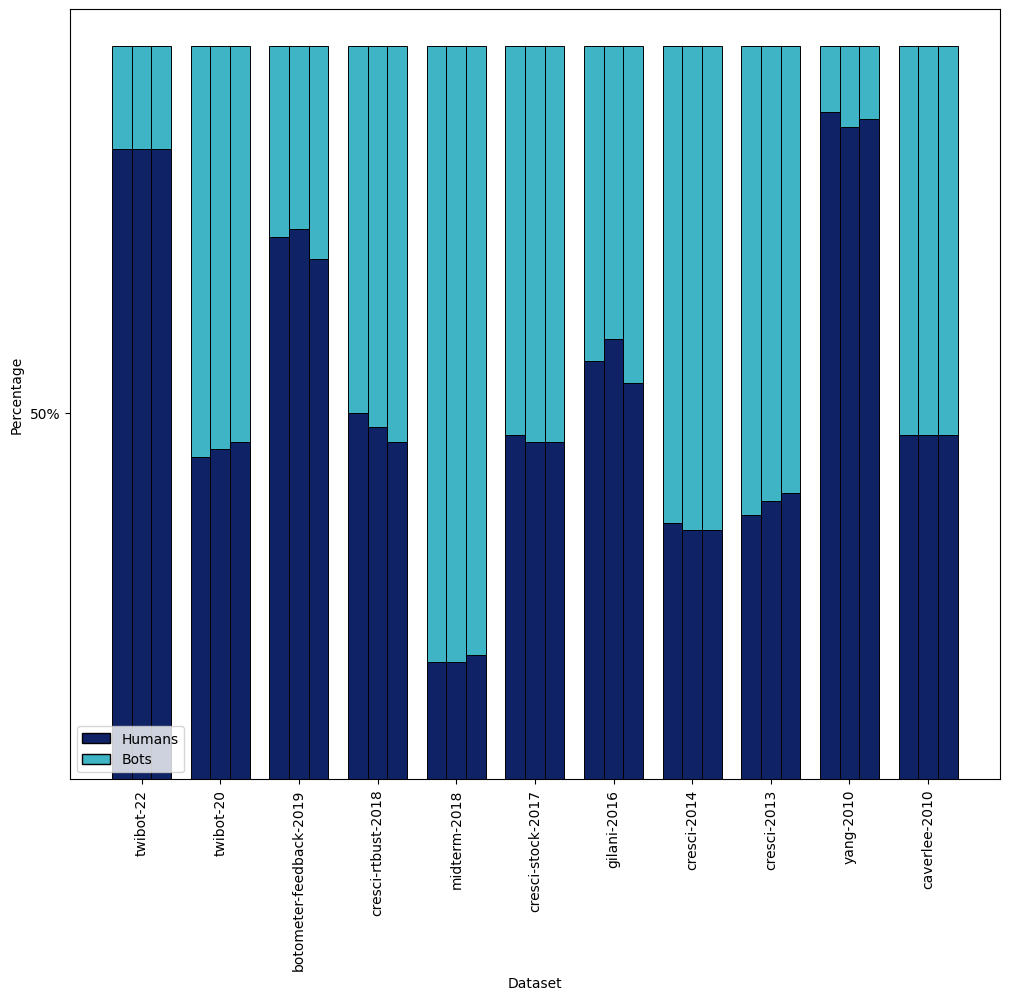

In [483]:
# Data
data = {
    "Dataset": ["twibot-22", "twibot-20", "botometer-feedback-2019", "cresci-rtbust-2018", "midterm-2018",
                "cresci-stock-2017", "gilani-2016", "cresci-2014", "cresci-2013", "yang-2010", "caverlee-2010"],
    "Train set Humans": [86, 44, 74, 50, 16, 47, 57, 35, 36, 91, 47],
    "Train set Bots": [14, 56, 26, 50, 84, 53, 43, 65, 64, 9, 53],
    "Val set Humans": [86, 45, 75, 48, 16, 46, 60, 34, 38, 89, 47],
    "Val set Bots": [14, 55, 25, 52, 84, 54, 40, 66, 62, 11, 53],
    "Test set Humans": [86, 46, 71, 46, 17, 46, 54, 34, 39, 90, 47],
    "Test set Bots": [14, 54, 29, 54, 83, 54, 46, 66, 61, 10, 53]
}

# Colors
human_color = '#0E2265'
bot_color = '#3FB4C4'

# Creating a DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Width of a bar
bar_width = 0.25
linewidth_val = 0.7

# Setting position of bar on X axis
r1 = range(len(df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Make the plot
ax.bar(r1, df['Train set Humans'], color=human_color, width=bar_width, linewidth = linewidth_val, edgecolor='black', label='Train set Humans')
ax.bar(r1, df['Train set Bots'], color=bot_color, width=bar_width, linewidth = linewidth_val, edgecolor='black', bottom=df['Train set Humans'], label='Train set Bots')

ax.bar(r2, df['Val set Humans'], color=human_color, width=bar_width, linewidth = linewidth_val, edgecolor='black', label='Val set Humans')
ax.bar(r2, df['Val set Bots'], color=bot_color, width=bar_width, linewidth = linewidth_val, edgecolor='black', bottom=df['Val set Humans'], label='Val set Bots')

ax.bar(r3, df['Test set Humans'], color=human_color, width=bar_width, linewidth = linewidth_val, edgecolor='black', label='Test set Humans')
ax.bar(r3, df['Test set Bots'], color=bot_color, width=bar_width, linewidth = linewidth_val, edgecolor='black', bottom=df['Test set Humans'], label='Test set Bots')

# Adding labels
ax.set_xlabel('Dataset')
ax.set_ylabel('Percentage')
#ax.set_title('Dataset Composition: Human vs Bots')
ax.set_xticks([r + bar_width for r in range(len(df))])
ax.set_xticklabels(df['Dataset'], rotation=90, ha="center")

# Set y-ticks to only display 50%
ax.set_yticks([50])
ax.set_yticklabels(['50%'])

# Add a horizontal line across the entire axis at 50%
#ax.axhline(y=50, color='black', linestyle='--', linewidth=0.8)

# Creating proxy artists for the legend
legend_elements = [Patch(facecolor=human_color, edgecolor='black', label='Humans'),
                   Patch(facecolor=bot_color, edgecolor='black', label='Bots')]

# Adding legend
ax.legend(handles=legend_elements, loc='lower left')
plt.show()


#Experiment: Train on one, test on another

Training Data: A single dataset from a specific year or time interval.

Testing Data: All remaining datasets from other years or time intervals.

Rationale: Evaluates the generalization capability of a model trained on data from one specific time period when tested on various other time periods. It helps in understanding how well a model trained in one context (year or time interval) can predict or classify data from different contexts.

Example: Train on the dataset from 2009 and test on datasets from 2010, 2011, 2012,...,2022. Then, train on the dataset from 2010 and test on datasets from 2009, 2011, 2012,...,2022, and so on. This creates a cross-generalization table showing the performance metrics (e.g., accuracy) for each training-testing combination.

## In-domain classification

Baseline steps:

- Train on the training data.
- Predict on the validation set.
- Evaluate the model.

Hyper-parameter tuning steps:
- Define hyperparameters
- Train on the training data.
- Use stratified k-fold cross-validation due to class imbalances.
- Score based on balanced accuracy.

Prediction steps:
- Use the classifier with the best parameters determined by the highest balanced accuracy.
- Predict on the test data.

Evaluation steps:
- Evaluate the optimized model's performance on the test data.





In [111]:
# HYPERPARAMETER TUNING
scorer = make_scorer(balanced_accuracy_score)
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10, 20, 50]
}

# Create a HalvingGridSearchCV object with balanced accuracy as the scoring metric
grid_search = HalvingGridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=skf,
    scoring=scorer,
    n_jobs=-1
)


### twibot_22

####4 features
- listed_count
- friends_count
- followers_count
- tweet_count

In [112]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_twibot_22 = RandomForestClassifier(random_state=42)

#fit the data
baseline_model_twibot_22.fit(X_train_twibot_22, y_train_twibot_22)

# Predict on the validation set
y_val_pred_twibot_22 = baseline_model_twibot_22.predict(X_val_twibot_22)

# Calculate balanced accuracy
balanced_acc_baseline_twibot_22 = balanced_accuracy_score(y_val_twibot_22, y_val_pred_twibot_22)

# Calculate F1 score
f1_baseline_twibot_22 = f1_score(y_val_twibot_22, y_val_pred_twibot_22)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_twibot_22:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_twibot_22:.2f}')

Balanced accuracy on the validation set: 0.56
F1 Score on the validation set: 0.23


Hyper-parameter tuning

In [113]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_twibot_22, y_train_twibot_22)

# Get the best hyperparameters
#best_params_twibot_22 = grid_search.best_params_
best_params_twibot_22 =  {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
print(f"Best param:", best_params_twibot_22)

Best param: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


Performance metrics (optimized model)

In [114]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_twibot_22 = RandomForestClassifier(random_state=42, **best_params_twibot_22)

# Train the model on the entire training dataset
optimized_model_twibot_22.fit(X_train_twibot_22, y_train_twibot_22)

# Make predictions on the test set
y_val_pred_twibot_22_op = optimized_model_twibot_22.predict(X_val_twibot_22)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_twibot_22 = balanced_accuracy_score(y_val_twibot_22, y_val_pred_twibot_22_op)

# Calculate F1 score
f1_op_twibot_22 = f1_score(y_val_twibot_22, y_val_pred_twibot_22_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_twibot_22:.2f}')
print(f'F1 Score on the test set: {f1_op_twibot_22:.2f}')

Balanced accuracy on the test set: 0.52
F1 Score on the test set: 0.08


In [115]:
#Save the model
if balanced_acc_baseline_twibot_22 < balanced_acc_op_twibot_22:
    joblib.dump(optimized_model_twibot_22, 'rf_twibot_22_4feat.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_twibot_22 == balanced_acc_op_twibot_22 and f1_baseline_twibot_22 < f1_op_twibot_22:
    joblib.dump(optimized_model_twibot_22, 'rf_twibot_22_4feat.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_twibot_22, 'rf_twibot_22_4feat.pkl')
    print('Saved model: baseline')

Saved model: baseline


####3 features - lff
- listed_count
- friends_count
- followers_count

In [116]:
X_train_twibot_22_lff = X_train_twibot_22[['listed_count', 'friends_count', 'followers_count']].copy()
X_val_twibot_22_lff = X_val_twibot_22[['listed_count', 'friends_count', 'followers_count']].copy()
X_test_twibot_22_lff = X_test_twibot_22[['listed_count', 'friends_count', 'followers_count']].copy()

In [117]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_twibot_22_lff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_twibot_22_lff.fit(X_train_twibot_22_lff, y_train_twibot_22)

# Predict on the validation set
y_val_pred_twibot_22_lff = baseline_model_twibot_22_lff.predict(X_val_twibot_22_lff)

# Calculate balanced accuracy
balanced_acc_baseline_twibot_22_lff = balanced_accuracy_score(y_val_twibot_22, y_val_pred_twibot_22_lff)

# Calculate F1 score
f1_baseline_twibot_22_lff = f1_score(y_val_twibot_22, y_val_pred_twibot_22_lff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_twibot_22_lff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_twibot_22_lff:.2f}')

Balanced accuracy on the validation set: 0.56
F1 Score on the validation set: 0.23


Hyper-parameter tuning

In [118]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_twibot_22_lff, y_train_twibot_22)

# Get the best hyperparameters
#best_params_twibot_22_lff = grid_search.best_params_
best_params_twibot_22_lff =  {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
print(f"Best param:", best_params_twibot_22_lff)

Best param: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


Performance metrics (optimized model)

In [119]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_twibot_22_lff = RandomForestClassifier(random_state=42, **best_params_twibot_22_lff)

# Train the model on the entire training dataset
optimized_model_twibot_22_lff.fit(X_train_twibot_22_lff, y_train_twibot_22)

# Make predictions on the test set
y_val_pred_twibot_22_lff_op = optimized_model_twibot_22_lff.predict(X_val_twibot_22_lff)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_twibot_22_lff = balanced_accuracy_score(y_val_twibot_22, y_val_pred_twibot_22_lff_op)

# Calculate F1 score
f1_op_twibot_22_lff = f1_score(y_val_twibot_22, y_val_pred_twibot_22_lff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_twibot_22_lff:.2f}')
print(f'F1 Score on the test set: {f1_op_twibot_22_lff:.2f}')

Balanced accuracy on the test set: 0.52
F1 Score on the test set: 0.08


In [120]:
#Save the model
if balanced_acc_baseline_twibot_22_lff < balanced_acc_op_twibot_22_lff:
    joblib.dump(optimized_model_twibot_22_lff, 'rf_twibot_22_3feat_lff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_twibot_22_lff == balanced_acc_op_twibot_22_lff and f1_baseline_twibot_22_lff < f1_op_twibot_22_lff:
    joblib.dump(optimized_model_twibot_22_lff, 'rf_twibot_22_3feat_lff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_twibot_22_lff, 'rf_twibot_22_3feat_lff.pkl')
    print('Saved model: baseline')

Saved model: baseline


####3 features - fft
- friends_count
- followers_count
- tweet_count

In [121]:
X_train_twibot_22_fft = X_train_twibot_22[['friends_count', 'followers_count', 'tweet_count']].copy()
X_val_twibot_22_fft = X_val_twibot_22[['friends_count', 'followers_count', 'tweet_count']].copy()
X_test_twibot_22_fft = X_test_twibot_22[['friends_count', 'followers_count', 'tweet_count']].copy()

In [122]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_twibot_22_fft = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_twibot_22_fft.fit(X_train_twibot_22_fft, y_train_twibot_22)

# Predict on the validation set
y_val_pred_twibot_22_fft = baseline_model_twibot_22_fft.predict(X_val_twibot_22_fft)

# Calculate balanced accuracy
balanced_acc_baseline_twibot_22_fft = balanced_accuracy_score(y_val_twibot_22, y_val_pred_twibot_22_fft)

# Calculate F1 score
f1_baseline_twibot_22_fft = f1_score(y_val_twibot_22, y_val_pred_twibot_22_fft)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_twibot_22_fft:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_twibot_22_fft:.2f}')

Balanced accuracy on the validation set: 0.56
F1 Score on the validation set: 0.23


Hyper-parameter tuning

In [123]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_twibot_22_fft, y_train_twibot_22)

# Get the best hyperparameters
#best_params_twibot_22_fft = grid_search.best_params_
best_params_twibot_22_fft =  {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 300}
print(f"Best param:", best_params_twibot_22_fft)

Best param: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 300}


Performance metrics (optimized model)

In [124]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_twibot_22_fft = RandomForestClassifier(random_state=42, **best_params_twibot_22_fft)

# Train the model on the entire training dataset
optimized_model_twibot_22_fft.fit(X_train_twibot_22_fft, y_train_twibot_22)

# Make predictions on the test set
y_val_pred_twibot_22_fft_op = optimized_model_twibot_22_fft.predict(X_val_twibot_22_fft)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_twibot_22_fft = balanced_accuracy_score(y_val_twibot_22, y_val_pred_twibot_22_fft_op)

# Calculate F1 score
f1_op_twibot_22_fft = f1_score(y_val_twibot_22, y_val_pred_twibot_22_fft_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_twibot_22_fft:.2f}')
print(f'F1 Score on the test set: {f1_op_twibot_22_fft:.2f}')

Balanced accuracy on the test set: 0.50
F1 Score on the test set: 0.02


In [125]:
#Save the model
if balanced_acc_baseline_twibot_22_fft < balanced_acc_op_twibot_22_fft:
    joblib.dump(optimized_model_twibot_22_fft, 'rf_twibot_22_3feat_fft.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_twibot_22_fft == balanced_acc_op_twibot_22_fft and f1_baseline_twibot_22_fft < f1_op_twibot_22_fft:
    joblib.dump(optimized_model_twibot_22_fft, 'rf_twibot_22_3feat_fft.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_twibot_22_fft, 'rf_twibot_22_3feat_fft.pkl')
    print('Saved model: baseline')

Saved model: baseline


###twibot_20

####4 features
- listed_count
- friends_count
- followers_count
- tweet_count

In [126]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_twibot_20 = RandomForestClassifier(random_state=42)

#fit the data
baseline_model_twibot_20.fit(X_train_twibot_20_sub, y_train_twibot_20_sub)

# Predict on the validation set
y_val_pred_twibot_20 = baseline_model_twibot_20.predict(X_val_twibot_20_sub)

# Calculate balanced accuracy
balanced_acc_baseline_twibot_20 = balanced_accuracy_score(y_val_twibot_20_sub, y_val_pred_twibot_20)

# Calculate F1 score
f1_baseline_twibot_20 = f1_score(y_val_twibot_20_sub, y_val_pred_twibot_20)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_twibot_20:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_twibot_20:.2f}')

Balanced accuracy on the validation set: 0.72
F1 Score on the validation set: 0.77


Hyper-parameter tuning

In [127]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_twibot_20_sub, y_train_twibot_20_sub)

# Get the best hyperparameters
#best_params_twibot_20 = grid_search.best_params_
best_params_twibot_20 = {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
print(f"Best param:", best_params_twibot_20)

Best param: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}


Performance metrics (optimized model)

In [128]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_twibot_20 = RandomForestClassifier(random_state=42, **best_params_twibot_20)

# Train the model on the entire training dataset
optimized_model_twibot_20.fit(X_train_twibot_20_sub, y_train_twibot_20_sub)

# Make predictions on the test set
y_val_pred_twibot_20_op = optimized_model_twibot_20.predict(X_val_twibot_20_sub)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_twibot_20 = balanced_accuracy_score(y_val_twibot_20_sub, y_val_pred_twibot_20_op)

# Calculate F1 score
f1_op_twibot_20 = f1_score(y_val_twibot_20_sub, y_val_pred_twibot_20_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_twibot_20:.2f}')
print(f'F1 Score on the test set: {f1_op_twibot_20:.2f}')

Balanced accuracy on the test set: 0.73
F1 Score on the test set: 0.80


In [129]:
#Save the model
if balanced_acc_baseline_twibot_20 < balanced_acc_op_twibot_20:
    joblib.dump(optimized_model_twibot_20, 'rf_twibot_20_4feat.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_twibot_20 == balanced_acc_op_twibot_20 and f1_baseline_twibot_20 < f1_op_twibot_20:
    joblib.dump(optimized_model_twibot_20, 'rf_twibot_20_4feat.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_twibot_20, 'rf_twibot_20_4feat.pkl')
    print('Saved model: baseline')

Saved model: optimized


####3 features - lff
- listed_count
- friends_count
- followers_count

In [130]:
X_train_twibot_20_lff = X_train_twibot_20_sub[['listed_count', 'friends_count', 'followers_count']].copy()
X_val_twibot_20_lff = X_val_twibot_20_sub[['listed_count', 'friends_count', 'followers_count']].copy()
X_test_twibot_20_lff = X_test_twibot_20_sub[['listed_count', 'friends_count', 'followers_count']].copy()

In [131]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_twibot_20_lff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_twibot_20_lff.fit(X_train_twibot_20_lff, y_train_twibot_20_sub)

# Predict on the validation set
y_val_pred_twibot_20_lff = baseline_model_twibot_20_lff.predict(X_val_twibot_20_lff)

# Calculate balanced accuracy
balanced_acc_baseline_twibot_20_lff = balanced_accuracy_score(y_val_twibot_20_sub, y_val_pred_twibot_20_lff)

# Calculate F1 score
f1_baseline_twibot_20_lff = f1_score(y_val_twibot_20_sub, y_val_pred_twibot_20_lff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_twibot_20_lff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_twibot_20_lff:.2f}')

Balanced accuracy on the validation set: 0.71
F1 Score on the validation set: 0.76


Hyper-parameter tuning

In [132]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_twibot_20_lff, y_train_twibot_20_sub)

# Get the best hyperparameters
#best_params_twibot_20_lff = grid_search.best_params_
best_params_twibot_20_lff =  {'max_depth': 10, 'min_samples_split': 50, 'n_estimators': 300}
print(f"Best param:", best_params_twibot_20_lff)

Best param: {'max_depth': 10, 'min_samples_split': 50, 'n_estimators': 300}


Performance metrics (optimized model)

In [133]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_twibot_20_lff = RandomForestClassifier(random_state=42, **best_params_twibot_20_lff)

# Train the model on the entire training dataset
optimized_model_twibot_20_lff.fit(X_train_twibot_20_lff, y_train_twibot_20_sub)

# Make predictions on the test set
y_val_pred_twibot_20_lff_op = optimized_model_twibot_20_lff.predict(X_val_twibot_20_lff)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_twibot_20_lff = balanced_accuracy_score(y_val_twibot_20_sub, y_val_pred_twibot_20_lff_op)

# Calculate F1 score
f1_op_twibot_20_lff = f1_score(y_val_twibot_20_sub, y_val_pred_twibot_20_lff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_twibot_20_lff:.2f}')
print(f'F1 Score on the test set: {f1_op_twibot_20_lff:.2f}')

Balanced accuracy on the test set: 0.73
F1 Score on the test set: 0.80


In [134]:
#Save the model
if balanced_acc_baseline_twibot_20_lff < balanced_acc_op_twibot_20_lff:
    joblib.dump(optimized_model_twibot_20_lff, 'rf_twibot_20_3feat_lff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_twibot_20_lff == balanced_acc_op_twibot_20_lff and f1_baseline_twibot_20_lff < f1_op_twibot_20_lff:
    joblib.dump(optimized_model_twibot_20_lff, 'rf_twibot_20_3feat_lff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_twibot_20_lff, 'rf_twibot_20_3feat_lff.pkl')
    print('Saved model: baseline')

Saved model: optimized


####3 features - fft
- friends_count
- followers_count
- tweet_count

In [135]:
X_train_twibot_20_fft = X_train_twibot_20_sub[['friends_count', 'followers_count', 'tweet_count']].copy()
X_val_twibot_20_fft = X_val_twibot_20_sub[['friends_count', 'followers_count', 'tweet_count']].copy()
X_test_twibot_20_fft = X_test_twibot_20_sub[['friends_count', 'followers_count', 'tweet_count']].copy()

In [136]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_twibot_20_fft = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_twibot_20_fft.fit(X_train_twibot_20_fft, y_train_twibot_20_sub)

# Predict on the validation set
y_val_pred_twibot_20_fft = baseline_model_twibot_20_fft.predict(X_val_twibot_20_fft)

# Calculate balanced accuracy
balanced_acc_baseline_twibot_20_fft = balanced_accuracy_score(y_val_twibot_20_sub, y_val_pred_twibot_20_fft)

# Calculate F1 score
f1_baseline_twibot_20_fft = f1_score(y_val_twibot_20_sub, y_val_pred_twibot_20_fft)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_twibot_20_fft:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_twibot_20_fft:.2f}')

Balanced accuracy on the validation set: 0.70
F1 Score on the validation set: 0.75


Hyper-parameter tuning

In [137]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_twibot_20_fft, y_train_twibot_20_sub)

# Get the best hyperparameters
#best_params_twibot_20_fft = grid_search.best_params_
best_params_twibot_20_fft = {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 300}
print(f"Best param:", best_params_twibot_22_fft)

Best param: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 300}


Performance metrics (optimized model)

In [138]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_twibot_20_fft = RandomForestClassifier(random_state=42, **best_params_twibot_20_fft)

# Train the model on the entire training dataset
optimized_model_twibot_20_fft.fit(X_train_twibot_20_fft, y_train_twibot_20_sub)

# Make predictions on the test set
y_val_pred_twibot_20_fft_op = optimized_model_twibot_20_fft.predict(X_val_twibot_20_fft)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_twibot_20_fft = balanced_accuracy_score(y_val_twibot_20_sub, y_val_pred_twibot_20_fft_op)

# Calculate F1 score
f1_op_twibot_20_fft = f1_score(y_val_twibot_20_sub, y_val_pred_twibot_20_fft_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_twibot_20_fft:.2f}')
print(f'F1 Score on the test set: {f1_op_twibot_20_fft:.2f}')

Balanced accuracy on the test set: 0.73
F1 Score on the test set: 0.80


In [139]:
#Save the model
if balanced_acc_baseline_twibot_20_fft < balanced_acc_op_twibot_20_fft:
    joblib.dump(optimized_model_twibot_20_fft, 'rf_twibot_20_3feat_fft.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_twibot_20_fft == balanced_acc_op_twibot_20_fft and f1_baseline_twibot_20_fft < f1_op_twibot_20_fft:
    joblib.dump(optimized_model_twibot_20_fft, 'rf_twibot_20_3feat_fft.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_twibot_20_fft, 'rf_twibot_20_3feat_fft.pkl')
    print('Saved model: baseline')

Saved model: optimized


### feedback_2019

#### 3 features - lff
- listed_count
- friends_count
- followers_count

In [140]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_feedback_2019_lff = RandomForestClassifier(random_state=42)

#fit the data
baseline_model_feedback_2019_lff.fit(X_train_feedback_2019, y_train_feedback_2019)

# Predict on the validation set
y_val_pred_feedback_2019_lff = baseline_model_feedback_2019_lff.predict(X_val_feedback_2019)

# Calculate balanced accuracy
balanced_acc_baseline_feedback_2019_lff = balanced_accuracy_score(y_val_feedback_2019, y_val_pred_feedback_2019_lff)

# Calculate F1 score
f1_baseline_feedback_2019_lff = f1_score(y_val_feedback_2019, y_val_pred_feedback_2019_lff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_feedback_2019_lff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_feedback_2019_lff:.2f}')

Balanced accuracy on the validation set: 0.66
F1 Score on the validation set: 0.48


Hyper-parameter tuning


In [141]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_feedback_2019, y_train_feedback_2019)

# Get the best hyperparameters
#best_params_feedback_2019_lff = grid_search.best_params_
best_params_feedback_2019_lff = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
print(f"Best param:", best_params_feedback_2019_lff)

Best param: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


Performance metrics (optimized model)

In [142]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_feedback_2019_lff = RandomForestClassifier(random_state=42, **best_params_feedback_2019_lff)

# Train the model on the entire training dataset
optimized_model_feedback_2019_lff.fit(X_train_feedback_2019, y_train_feedback_2019)

# Make predictions on the test set
y_val_pred_feedback_2019_lff_op = optimized_model_feedback_2019_lff.predict(X_val_feedback_2019)

# Calculate balanced accuracy
balanced_acc_op_feedback_2019_lff = balanced_accuracy_score(y_val_feedback_2019, y_val_pred_feedback_2019_lff_op)

# Calculate F1 score
f1_op_feedback_2019_lff = f1_score(y_val_feedback_2019, y_val_pred_feedback_2019_lff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_feedback_2019_lff:.2f}')
print(f'F1 Score on the test set: {f1_op_feedback_2019_lff:.2f}')

Balanced accuracy on the test set: 0.58
F1 Score on the test set: 0.31


In [143]:
#Save the model
if balanced_acc_baseline_feedback_2019_lff < balanced_acc_op_feedback_2019_lff:
    joblib.dump(optimized_model_feedback_2019_lff, 'rf_feedback_2019_lff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_feedback_2019_lff == balanced_acc_op_feedback_2019_lff and f1_baseline_feedback_2019_lff < f1_op_feedback_2019_lff:
    joblib.dump(optimized_model_feedback_2019_lff, 'rf_feedback_2019_lff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_feedback_2019_lff, 'rf_feedback_2019_lff.pkl')
    print('Saved model: baseline')

Saved model: baseline


#### 2 features - ff
- friends_count
- followers_count

In [144]:
X_train_feedback_2019_ff = X_train_feedback_2019[['friends_count', 'followers_count']].copy()
X_val_feedback_2019_ff = X_val_feedback_2019[['friends_count', 'followers_count']].copy()
X_test_feedback_2019_ff = X_test_feedback_2019[['friends_count', 'followers_count']].copy()

In [145]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_feedback_2019_ff = RandomForestClassifier(random_state=42)

#fit the data
baseline_model_feedback_2019_ff.fit(X_train_feedback_2019_ff, y_train_feedback_2019)

# Predict on the validation set
y_val_pred_feedback_2019_ff = baseline_model_feedback_2019_ff.predict(X_val_feedback_2019_ff)

# Calculate balanced accuracy
balanced_acc_baseline_feedback_2019_ff = balanced_accuracy_score(y_val_feedback_2019, y_val_pred_feedback_2019_ff)

# Calculate F1 score
f1_baseline_feedback_2019_ff = f1_score(y_val_feedback_2019, y_val_pred_feedback_2019_ff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_feedback_2019_ff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_feedback_2019_ff:.2f}')

Balanced accuracy on the validation set: 0.62
F1 Score on the validation set: 0.42


Hyper-parameter tuning


In [146]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_feedback_2019_ff, y_train_feedback_2019)

# Get the best hyperparameters
#best_params_feedback_2019_ff = grid_search.best_params_
best_params_feedback_2019_ff = {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 200}
print(f"Best param:", best_params_feedback_2019_ff)

Best param: {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 200}


Performance metrics (optimized model)

In [147]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_feedback_2019_ff = RandomForestClassifier(random_state=42, **best_params_feedback_2019_ff)

# Train the model on the entire training dataset
optimized_model_feedback_2019_ff.fit(X_train_feedback_2019_ff, y_train_feedback_2019)

# Make predictions on the test set
y_val_pred_feedback_2019_ff_op = optimized_model_feedback_2019_ff.predict(X_val_feedback_2019_ff)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_feedback_2019_ff = balanced_accuracy_score(y_val_feedback_2019, y_val_pred_feedback_2019_ff_op)

# Calculate F1 score
f1_op_feedback_2019_ff = f1_score(y_val_feedback_2019, y_val_pred_feedback_2019_ff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_feedback_2019_ff:.2f}')
print(f'F1 Score on the test set: {f1_op_feedback_2019_ff:.2f}')

Balanced accuracy on the test set: 0.57
F1 Score on the test set: 0.30


In [148]:
#Save the model
if balanced_acc_baseline_feedback_2019_ff < balanced_acc_op_feedback_2019_ff:
    joblib.dump(optimized_model_feedback_2019_ff, 'rf_feedback_2019_ff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_feedback_2019_ff == balanced_acc_op_feedback_2019_ff and f1_baseline_feedback_2019_ff < f1_op_feedback_2019_ff:
    joblib.dump(optimized_model_feedback_2019_ff, 'rf_feedback_2019_ff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_feedback_2019_ff, 'rf_feedback_2019_ff.pkl')
    print('Saved model: baseline')

Saved model: baseline


### rtbust_2019

####3 features - lff
- listed_count
- friends_count
- followers_count

In [149]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_rtbust_lff = RandomForestClassifier(random_state=42)

#fit the data
baseline_model_rtbust_lff.fit(X_train_rtbust_2019, y_train_rtbust_2019)

# Predict on the validation set
y_val_pred_rtbust_lff = baseline_model_rtbust_lff.predict(X_val_rtbust_2019)

# Calculate balanced accuracy
balanced_acc_baseline_rtbust_lff = balanced_accuracy_score(y_val_rtbust_2019, y_val_pred_rtbust_lff)

# Calculate F1 score
f1_baseline_rtbust_lff = f1_score(y_val_rtbust_2019, y_val_pred_rtbust_lff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_rtbust_lff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_rtbust_lff:.2f}')

Balanced accuracy on the validation set: 0.72
F1 Score on the validation set: 0.72


Hyper-parameter tuning


In [150]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_rtbust_2019, y_train_rtbust_2019)

# Get the best hyperparameters
#best_params_rtbust_lff = grid_search.best_params_
best_params_rtbust_lff = {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
print(f"Best param:", best_params_rtbust_lff)

Best param: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


Performance metrics (optimized model)

In [151]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_rtbust_lff = RandomForestClassifier(random_state=42, **best_params_rtbust_lff)

# Train the model on the entire training dataset
optimized_model_rtbust_lff.fit(X_train_rtbust_2019, y_train_rtbust_2019)

# Make predictions on the test set
y_val_pred_rtbust_lff_op = optimized_model_rtbust_lff.predict(X_val_rtbust_2019)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_rtbust_lff = balanced_accuracy_score(y_val_rtbust_2019, y_val_pred_rtbust_lff_op)

# Calculate F1 score
f1_op_rtbust_lff = f1_score(y_val_rtbust_2019, y_val_pred_rtbust_lff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_rtbust_lff:.2f}')
print(f'F1 Score on the test set: {f1_op_rtbust_lff:.2f}')

Balanced accuracy on the test set: 0.72
F1 Score on the test set: 0.73


In [152]:
#Save the model
if balanced_acc_baseline_rtbust_lff < balanced_acc_op_rtbust_lff:
    joblib.dump(optimized_model_rtbust_lff, 'rf_bust_3feat_lff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_rtbust_lff == balanced_acc_op_rtbust_lff and f1_baseline_rtbust_lff < f1_op_rtbust_lff:
    joblib.dump(optimized_model_rtbust_lff, 'rf_bust_3feat_lff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_rtbust_lff, 'rf_bust_3feat_lff.pkl')
    print('Saved model: baseline')

Saved model: baseline


#### 2 features - ff
- friends_count
- followers_count

In [153]:
X_train_rtbust_ff = X_train_rtbust_2019[['friends_count', 'followers_count']].copy()
X_val_rtbust_ff = X_val_rtbust_2019[['friends_count', 'followers_count']].copy()
X_test_rtbust_ff = X_test_rtbust_2019[['friends_count', 'followers_count']].copy()

In [154]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_rtbust_ff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_rtbust_ff.fit(X_train_rtbust_ff, y_train_rtbust_2019)

# Predict on the validation set
y_val_pred_rtbust_ff = baseline_model_rtbust_ff.predict(X_val_rtbust_ff)

# Calculate balanced accuracy
balanced_acc_baseline_rtbust_ff = balanced_accuracy_score(y_val_rtbust_2019, y_val_pred_rtbust_ff)

# Calculate F1 score
f1_baseline_rtbust_ff = f1_score(y_val_rtbust_2019, y_val_pred_rtbust_ff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_rtbust_ff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_rtbust_ff:.2f}')

Balanced accuracy on the validation set: 0.65
F1 Score on the validation set: 0.64


Hyper-parameter tuning


In [155]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_rtbust_ff, y_train_rtbust_2019)

# Get the best hyperparameters
#best_params_rtbust_ff = grid_search.best_params_
best_params_rtbust_ff = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
print(f"Best param:", best_params_rtbust_ff)

Best param: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


Performance metrics (optimized model)

In [156]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_rtbust_ff = RandomForestClassifier(random_state=42, **best_params_rtbust_ff)

# Train the model on the entire training dataset
optimized_model_rtbust_ff.fit(X_train_rtbust_ff, y_train_rtbust_2019)

# Make predictions on the test set
y_val_pred_rtbust_ff_op = optimized_model_rtbust_ff.predict(X_val_rtbust_ff)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_rtbust_ff = balanced_accuracy_score(y_val_rtbust_2019, y_val_pred_rtbust_ff_op)

# Calculate F1 score
f1_op_rtbust_ff = f1_score(y_val_rtbust_2019, y_val_pred_rtbust_ff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_rtbust_ff:.2f}')
print(f'F1 Score on the test set: {f1_op_rtbust_ff:.2f}')

Balanced accuracy on the test set: 0.68
F1 Score on the test set: 0.72


In [157]:
#Save the model
if balanced_acc_baseline_rtbust_ff < balanced_acc_op_rtbust_ff:
    joblib.dump(optimized_model_rtbust_ff, 'rf_rtbust_ff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_rtbust_ff == balanced_acc_op_rtbust_ff and f1_baseline_rtbust_ff < f1_op_rtbust_ff:
    joblib.dump(optimized_model_rtbust_ff, 'rf_rtbust_ff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_rtbust_ff, 'rf_rtbust_ff.pkl')
    print('Saved model: baseline')

Saved model: optimized


###gilani_2017

#### 3 features - lff
- listed_count
- friends_count
- followers_count

In [158]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_gilani_lff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_gilani_lff.fit(X_train_gilani_2017, y_train_gilani_2017)

# Predict on the validation set
y_val_pred_gilani_lff = baseline_model_gilani_lff.predict(X_val_gilani_2017)

# Calculate balanced accuracy
balanced_acc_baseline_gilani_lff = balanced_accuracy_score(y_val_gilani_2017, y_val_pred_gilani_lff)

# Calculate F1 score
f1_baseline_gilani_lff = f1_score(y_val_gilani_2017, y_val_pred_gilani_lff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_gilani_lff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_gilani_lff:.2f}')

Balanced accuracy on the validation set: 0.59
F1 Score on the validation set: 0.50


Hyper-parameter tuning


In [159]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_gilani_2017, y_train_gilani_2017)

# Get the best hyperparameters
#best_params_gilani_lff = grid_search.best_params_
best_params_gilani_lff = {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
print(f"Best param:", best_params_gilani_lff)

Best param: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


Performance metrics (optimized model)

In [160]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_gilani_lff = RandomForestClassifier(random_state=42, **best_params_gilani_lff)

# Train the model on the entire training dataset
optimized_model_gilani_lff.fit(X_train_gilani_2017, y_train_gilani_2017)

# Make predictions on the test set
y_val_pred_gilani_lff_op = optimized_model_gilani_lff.predict(X_val_gilani_2017)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_gilani_lff = balanced_accuracy_score(y_val_gilani_2017, y_val_pred_gilani_lff_op)

# Calculate F1 score
f1_op_gilani_lff = f1_score(y_val_gilani_2017, y_val_pred_gilani_lff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_gilani_lff:.2f}')
print(f'F1 Score on the test set: {f1_op_gilani_lff:.2f}')

Balanced accuracy on the test set: 0.61
F1 Score on the test set: 0.51


In [161]:
#Save the model
if balanced_acc_baseline_gilani_lff < balanced_acc_op_gilani_lff:
    joblib.dump(optimized_model_gilani_lff, 'rf_gilani_3feat_lff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_rtbust_lff == balanced_acc_op_rtbust_lff and f1_baseline_gilani_lff < f1_op_gilani_lff:
    joblib.dump(optimized_model_gilani_lff, 'rf_gilani_3feat_lff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_gilani_lff, 'rf_gilani_3feat_lff.pkl')
    print('Saved model: baseline')

Saved model: optimized


#### 2 features - ff
- friends_count
- followers_count

In [162]:
X_train_gilani_ff = X_train_gilani_2017[['friends_count', 'followers_count']].copy()
X_val_gilani_ff = X_val_gilani_2017[['friends_count', 'followers_count']].copy()
X_test_gilani_ff = X_test_gilani_2017[['friends_count', 'followers_count']].copy()

In [163]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_gilani_ff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_gilani_ff.fit(X_train_gilani_ff, y_train_gilani_2017)

# Predict on the validation set
y_val_pred_gilani_ff = baseline_model_gilani_ff.predict(X_val_gilani_ff)

# Calculate balanced accuracy
balanced_acc_baseline_gilani_ff = balanced_accuracy_score(y_val_gilani_2017, y_val_pred_gilani_ff)

# Calculate F1 score
f1_baseline_gilani_ff = f1_score(y_val_gilani_2017, y_val_pred_gilani_ff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_gilani_ff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_gilani_ff:.2f}')

Balanced accuracy on the validation set: 0.57
F1 Score on the validation set: 0.48


Hyper-parameter tuning


In [164]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_gilani_ff, y_train_gilani_2017)

# Get the best hyperparameters
#best_params_gilani_ff = grid_search.best_params_
best_params_gilani_ff = {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
print(f"Best param:", best_params_gilani_ff)

Best param: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}


Performance metrics (optimized model)

In [165]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_gilani_ff = RandomForestClassifier(random_state=42, **best_params_gilani_ff)

# Train the model on the entire training dataset
optimized_model_gilani_ff.fit(X_train_gilani_ff, y_train_gilani_2017)

# Make predictions on the test set
y_val_pred_gilani_ff_op = optimized_model_gilani_ff.predict(X_val_gilani_ff)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_gilani_ff = balanced_accuracy_score(y_val_gilani_2017, y_val_pred_gilani_ff_op)

# Calculate F1 score
f1_op_gilani_ff = f1_score(y_val_gilani_2017, y_val_pred_gilani_ff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_gilani_ff:.2f}')
print(f'F1 Score on the test set: {f1_op_gilani_ff:.2f}')

Balanced accuracy on the test set: 0.62
F1 Score on the test set: 0.50


In [166]:
#Save the model
if balanced_acc_baseline_gilani_ff < balanced_acc_op_gilani_ff:
    joblib.dump(optimized_model_gilani_ff, 'rf_gilani_2feat_ff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_rtbust_ff == balanced_acc_op_rtbust_ff and f1_baseline_gilani_ff < f1_op_gilani_ff:
    joblib.dump(optimized_model_gilani_ff, 'rf_gilani_2feat_ff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_gilani_ff, 'rf_gilani_2feat_ff.pkl')
    print('Saved model: baseline')

Saved model: optimized


####Raw data
This training is conducted to check if the same balanced accuracy can be achieved, namely 71%, as in Hays, C., Z. Schutzman, M. Raghavan, E. Walk, and P. Zimmer (2023, April).
Simplistic Collection and Labeling Practices Limit the Utility of Benchmark Datasets for Twitter Bot Detection.

In [167]:
X_gilani_2017_raw = merged_gilani_2017[['user.listed_count', 'user.friends_count', 'user.followers_count']]
y_gilani_2017_raw = merged_gilani_2017['label']

# Split the data into a training set (70%) and a temporary set (30%)
X_train_gilani_2017_raw, X_temp_gilani_2017_raw, y_train_gilani_2017_raw, y_temp_gilani_2017_raw = train_test_split(
    X_gilani_2017_raw, y_gilani_2017_raw, test_size=0.2, random_state=42)

In [168]:
# Create a Random Forest classifier
model_gilani_raw = RandomForestClassifier(random_state=42)

# Fit the data
model_gilani_raw.fit(X_train_gilani_2017_raw, y_train_gilani_2017_raw)

# Predict on the validation set
y_pred_gilani_raw = model_gilani_raw.predict(X_temp_gilani_2017_raw)

# Calculate balanced accuracy
balanced_acc_gilani_raw = balanced_accuracy_score(y_temp_gilani_2017_raw, y_pred_gilani_raw)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_gilani_raw:.2f}')

Balanced accuracy on the validation set: 0.60


###cresci-2015

#### 4 features
- listed_count
- friends_count
- followers_count
- tweet_count

In [169]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_cresci_2015 = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_cresci_2015.fit(X_train_cresci_2015, y_train_cresci_2015)

# Predict on the validation set
y_val_pred_cresci_2015 = baseline_model_cresci_2015.predict(X_val_cresci_2015)

# Calculate balanced accuracy
balanced_acc_baseline_cresci_2015 = balanced_accuracy_score(y_val_cresci_2015, y_val_pred_cresci_2015)

# Calculate F1 score
f1_baseline_cresci_2015 = f1_score(y_val_cresci_2015, y_val_pred_cresci_2015)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_cresci_2015:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_cresci_2015:.2f}')

Balanced accuracy on the validation set: 0.98
F1 Score on the validation set: 0.99


Hyper-parameter tuning

In [170]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_cresci_2015, y_train_cresci_2015)

# Get the best hyperparameters
#best_params_cresci_2015 = grid_search.best_params_
best_params_cresci_2015 = {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
print(f"Best param:", best_params_cresci_2015)

Best param: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}


Performance metrics (optimized model)

In [171]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_cresci_2015 = RandomForestClassifier(random_state=42, **best_params_cresci_2015)

# Train the model on the entire training dataset
optimized_model_cresci_2015.fit(X_train_cresci_2015, y_train_cresci_2015)

# Make predictions on the test set
y_val_pred_cresci_2015_op = optimized_model_cresci_2015.predict(X_val_cresci_2015)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_cresci_2015 = balanced_accuracy_score(y_val_cresci_2015, y_val_pred_cresci_2015_op)

# Calculate F1 score
f1_op_cresci_2015 = f1_score(y_val_cresci_2015, y_val_pred_cresci_2015_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_cresci_2015:.2f}')
print(f'F1 Score on the test set: {f1_op_cresci_2015:.2f}')

Balanced accuracy on the test set: 0.98
F1 Score on the test set: 0.98


In [172]:
#Save the model
if balanced_acc_baseline_cresci_2015 < balanced_acc_op_cresci_2015:
    joblib.dump(optimized_model_cresci_2015, 'rf_cresci_2015_4feat.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_cresci_2015 == balanced_acc_op_cresci_2015 and f1_baseline_cresci_2015 < f1_op_cresci_2015:
    joblib.dump(optimized_model_cresci_2015, 'rf_cresci_2015_4feat.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_cresci_2015, 'rf_cresci_2015_4feat.pkl')
    print('Saved model: baseline')

Saved model: baseline


####3 features - lff
- listed_count
- friends_count
- followers_count

In [173]:
X_train_cresci_2015_lff = X_train_cresci_2015[['listed_count', 'friends_count', 'followers_count']].copy()
X_val_cresci_2015_lff = X_val_cresci_2015[['listed_count', 'friends_count', 'followers_count']].copy()
X_test_cresci_2015_lff = X_test_cresci_2015[['listed_count', 'friends_count', 'followers_count']].copy()

In [174]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_cresci_2015_lff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_cresci_2015_lff.fit(X_train_cresci_2015_lff, y_train_cresci_2015)

# Predict on the validation set
y_val_pred_cresci_2015_lff = baseline_model_cresci_2015_lff.predict(X_val_cresci_2015_lff)

# Calculate balanced accuracy
balanced_acc_baseline_cresci_2015_lff = balanced_accuracy_score(y_val_cresci_2015, y_val_pred_cresci_2015_lff)

# Calculate F1 score
f1_baseline_cresci_2015_lff = f1_score(y_val_cresci_2015, y_val_pred_cresci_2015_lff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_cresci_2015_lff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_cresci_2015_lff:.2f}')

Balanced accuracy on the validation set: 0.97
F1 Score on the validation set: 0.98


Hyper-parameter tuning

In [175]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_cresci_2015_lff, y_train_cresci_2015)

# Get the best hyperparameters
#best_params_cresci_2015_lff = grid_search.best_params_
best_params_cresci_2015_lff = {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
print(f"Best param:", best_params_cresci_2015_lff)

Best param: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


Performance metrics (optimized model)

In [176]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_cresci_2015_lff = RandomForestClassifier(random_state=42, **best_params_cresci_2015_lff)

# Train the model on the entire training dataset
optimized_model_cresci_2015_lff.fit(X_train_cresci_2015_lff, y_train_cresci_2015)

# Make predictions on the test set
y_val_pred_cresci_2015_lff_op = optimized_model_cresci_2015_lff.predict(X_val_cresci_2015_lff)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_cresci_2015_lff = balanced_accuracy_score(y_val_cresci_2015, y_val_pred_cresci_2015_lff_op)

# Calculate F1 score
f1_op_cresci_2015_lff = f1_score(y_val_cresci_2015, y_val_pred_cresci_2015_lff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_cresci_2015_lff:.2f}')
print(f'F1 Score on the test set: {f1_op_cresci_2015_lff:.2f}')

Balanced accuracy on the test set: 0.98
F1 Score on the test set: 0.98


In [177]:
#Save the model
if balanced_acc_baseline_cresci_2015_lff < balanced_acc_op_cresci_2015_lff:
    joblib.dump(optimized_model_cresci_2015_lff, 'rf_cresci_2015_3feat_lff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_cresci_2015_lff == balanced_acc_op_cresci_2015_lff and f1_baseline_cresci_2015_lff < f1_op_cresci_2015_lff:
    joblib.dump(optimized_model_cresci_2015_lff, 'rf_cresci_2015_3feat_lff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_cresci_2015_lff, 'rf_cresci_2015_3feat_lff.pkl')
    print('Saved model: baseline')

Saved model: optimized


####3 features - fft
- friends_count
- followers_count
- tweet_count

In [178]:
X_train_cresci_2015_fft = X_train_cresci_2015[['friends_count', 'followers_count', 'tweet_count']].copy()
X_val_cresci_2015_fft = X_val_cresci_2015[['friends_count', 'followers_count', 'tweet_count']].copy()
X_test_cresci_2015_fft = X_test_cresci_2015[['friends_count', 'followers_count', 'tweet_count']].copy()

In [179]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_cresci_2015_fft = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_cresci_2015_fft.fit(X_train_cresci_2015_fft, y_train_cresci_2015)

# Predict on the validation set
y_val_pred_cresci_2015_fft = baseline_model_cresci_2015_fft.predict(X_val_cresci_2015_fft)

# Calculate balanced accuracy
balanced_acc_baseline_cresci_2015_fft = balanced_accuracy_score(y_val_cresci_2015, y_val_pred_cresci_2015_fft)

# Calculate F1 score
f1_baseline_cresci_2015_fft = f1_score(y_val_cresci_2015, y_val_pred_cresci_2015_fft)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_cresci_2015_fft:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_cresci_2015_fft:.2f}')

Balanced accuracy on the validation set: 0.98
F1 Score on the validation set: 0.99


Hyper-parameter tuning

In [180]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_cresci_2015_fft, y_train_cresci_2015)

# Get the best hyperparameters
#best_params_cresci_2015_fft = grid_search.best_params_
best_params_cresci_2015_fft = {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
print(f"Best param:", best_params_cresci_2015_fft)

Best param: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


Performance metrics (optimized model)

In [181]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_cresci_2015_fft = RandomForestClassifier(random_state=42, **best_params_cresci_2015_fft)

# Train the model on the entire training dataset
optimized_model_cresci_2015_fft.fit(X_train_cresci_2015_fft, y_train_cresci_2015)

# Make predictions on the test set
y_val_pred_cresci_2015_fft_op = optimized_model_cresci_2015_fft.predict(X_val_cresci_2015_fft)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_cresci_2015_fft = balanced_accuracy_score(y_val_cresci_2015, y_val_pred_cresci_2015_fft_op)

# Calculate F1 score
f1_op_cresci_2015_fft = f1_score(y_val_cresci_2015, y_val_pred_cresci_2015_fft_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_cresci_2015_fft:.2f}')
print(f'F1 Score on the test set: {f1_op_cresci_2015_fft:.2f}')

Balanced accuracy on the test set: 0.98
F1 Score on the test set: 0.99


In [182]:
#Save the model
if balanced_acc_baseline_cresci_2015_fft < balanced_acc_op_cresci_2015_fft:
    joblib.dump(optimized_model_cresci_2015_fft, 'rf_cresci_2015_3feat_fft.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_cresci_2015_fft == balanced_acc_op_cresci_2015_fft and f1_baseline_cresci_2015_fft < f1_op_cresci_2015_fft:
    joblib.dump(optimized_model_cresci_2015_fft, 'rf_cresci_2015_3feat_fft.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_cresci_2015_fft, 'rf_cresci_2015_3feat_fft.pkl')
    print('Saved model: baseline')

Saved model: baseline


###midterm_2018

#### 3 features - lff
- listed_count
- friends_count
- followers_count

In [183]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_midterm_lff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_midterm_lff.fit(X_train_midterm_2018, y_train_midterm_2018)

# Predict on the validation set
y_val_pred_midterm_lff = baseline_model_midterm_lff.predict(X_val_midterm_2018)

# Calculate balanced accuracy
balanced_acc_baseline_midterm_lff = balanced_accuracy_score(y_val_midterm_2018, y_val_pred_midterm_lff)

# Calculate F1 score
f1_baseline_midterm_lff = f1_score(y_val_midterm_2018, y_val_pred_midterm_lff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_midterm_lff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_midterm_lff:.2f}')

Balanced accuracy on the validation set: 0.87
F1 Score on the validation set: 0.96


Hyper-parameter tuning


In [184]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_midterm_2018, y_train_midterm_2018)

# Get the best hyperparameters
#best_params_midterm_lff = grid_search.best_params_
best_params_midterm_lff = {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}
print(f"Best param:", best_params_midterm_lff)

Best param: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}


Performance metrics (optimized model)

In [185]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_midterm_lff = RandomForestClassifier(random_state=42, **best_params_midterm_lff)

# Train the model on the entire training dataset
optimized_model_midterm_lff.fit(X_train_midterm_2018, y_train_midterm_2018)

# Make predictions on the test set
y_val_pred_midterm_lff_op = optimized_model_midterm_lff.predict(X_val_midterm_2018)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_midterm_lff = balanced_accuracy_score(y_val_midterm_2018, y_val_pred_midterm_lff_op)

# Calculate F1 score
f1_op_midterm_lff = f1_score(y_val_midterm_2018, y_val_pred_midterm_lff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_midterm_lff:.2f}')
print(f'F1 Score on the test set: {f1_op_midterm_lff:.2f}')

Balanced accuracy on the test set: 0.87
F1 Score on the test set: 0.97


In [186]:
#Save the model
if balanced_acc_baseline_midterm_lff < balanced_acc_op_midterm_lff:
    joblib.dump(optimized_model_midterm_lff, 'rf_midterm_3feat_lff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_midterm_lff == balanced_acc_op_midterm_lff and f1_baseline_midterm_lff < f1_op_midterm_lff:
    joblib.dump(optimized_model_midterm_lff, 'rf_midterm_3feat_lff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_midterm_lff, 'rf_midterm_3feat_lff.pkl')
    print('Saved model: baseline')

Saved model: baseline


#### 2 features - ff
- friends_count
- followers_count

In [187]:
X_train_midterm_ff = X_train_midterm_2018[['friends_count', 'followers_count']].copy()
X_val_midterm_ff = X_val_midterm_2018[['friends_count', 'followers_count']].copy()
X_test_midterm_ff = X_test_midterm_2018[['friends_count', 'followers_count']].copy()

In [188]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_midterm_ff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_midterm_ff.fit(X_train_midterm_ff, y_train_midterm_2018)

# Predict on the validation set
y_val_pred_midterm_ff = baseline_model_midterm_ff.predict(X_val_midterm_ff)

# Calculate balanced accuracy
balanced_acc_baseline_midterm_ff = balanced_accuracy_score(y_val_midterm_2018, y_val_pred_midterm_ff)

# Calculate F1 score
f1_baseline_midterm_ff = f1_score(y_val_midterm_2018, y_val_pred_midterm_ff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_midterm_ff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_midterm_ff:.2f}')

Balanced accuracy on the validation set: 0.86
F1 Score on the validation set: 0.95


Hyper-parameter tuning


In [189]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_midterm_ff, y_train_midterm_2018)

# Get the best hyperparameters
#best_params_midterm_ff = grid_search.best_params_
best_params_midterm_ff = {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
print(f"Best param:", best_params_midterm_ff)

Best param: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}


Performance metrics (optimized model)

In [190]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_midterm_ff = RandomForestClassifier(random_state=42, **best_params_midterm_ff)

# Train the model on the entire training dataset
optimized_model_midterm_ff.fit(X_train_midterm_ff, y_train_midterm_2018)

# Make predictions on the test set
y_val_pred_midterm_ff_op = optimized_model_midterm_ff.predict(X_val_midterm_ff)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_midterm_ff = balanced_accuracy_score(y_val_midterm_2018, y_val_pred_midterm_ff_op)

# Calculate F1 score
f1_op_midterm_ff = f1_score(y_val_midterm_2018, y_val_pred_midterm_ff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_midterm_ff:.2f}')
print(f'F1 Score on the test set: {f1_op_midterm_ff:.2f}')

Balanced accuracy on the test set: 0.88
F1 Score on the test set: 0.96


In [191]:
#Save the model
if balanced_acc_baseline_midterm_ff < balanced_acc_op_midterm_ff:
    joblib.dump(optimized_model_midterm_ff, 'rf_midterm_2feat_ff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_midterm_ff == balanced_acc_op_midterm_ff and f1_baseline_midterm_ff < f1_op_midterm_ff:
    joblib.dump(optimized_model_midterm_ff, 'rf_midterm_2feat_ff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_midterm_ff, 'rf_midterm_2feat_ff.pkl')
    print('Saved model: baseline')

Saved model: optimized


###stock_2018

#### 3 features - lff
- listed_count
- friends_count
- followers_count

In [192]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_stock_lff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_stock_lff.fit(X_train_stock_2018, y_train_stock_2018)

# Predict on the validation set
y_val_pred_stock_lff = baseline_model_stock_lff.predict(X_val_stock_2018)

# Calculate balanced accuracy
balanced_acc_baseline_stock_lff = balanced_accuracy_score(y_val_stock_2018, y_val_pred_stock_lff)

# Calculate F1 score
f1_baseline_stock_lff = f1_score(y_val_stock_2018, y_val_pred_stock_lff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_stock_lff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_stock_lff:.2f}')

Balanced accuracy on the validation set: 0.70
F1 Score on the validation set: 0.71


Hyper-parameter tuning


In [193]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_stock_2018, y_train_stock_2018)

# Get the best hyperparameters
#best_params_stock_lff = grid_search.best_params_
best_params_stock_lff = {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 200}
print(f"Best param:", best_params_stock_lff)

Best param: {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 200}


Performance metrics (optimized model)

In [194]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_stock_lff = RandomForestClassifier(random_state=42, **best_params_stock_lff)

# Train the model on the entire training dataset
optimized_model_stock_lff.fit(X_train_stock_2018, y_train_stock_2018)

# Make predictions on the test set
y_val_pred_stock_lff_op = optimized_model_stock_lff.predict(X_val_stock_2018)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_stock_lff = balanced_accuracy_score(y_val_stock_2018, y_val_pred_stock_lff_op)

# Calculate F1 score
f1_op_stock_lff = f1_score(y_val_stock_2018, y_val_pred_stock_lff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_stock_lff:.2f}')
print(f'F1 Score on the test set: {f1_op_stock_lff:.2f}')

Balanced accuracy on the test set: 0.72
F1 Score on the test set: 0.73


In [195]:
#Save the model
if balanced_acc_baseline_stock_lff < balanced_acc_op_stock_lff:
    joblib.dump(optimized_model_stock_lff, 'rf_stock_3feat_lff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_stock_lff == balanced_acc_op_stock_lff and f1_baseline_stock_lff < f1_op_stock_lff:
    joblib.dump(optimized_model_stock_lff, 'rf_stock_3feat_lff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_stock_lff, 'rf_stock_3feat_lff.pkl')
    print('Saved model: baseline')

Saved model: optimized


#### 2 features - ff
- friends_count
- followers_count

In [196]:
X_train_stock_ff = X_train_stock_2018[['friends_count', 'followers_count']].copy()
X_val_stock_ff = X_val_stock_2018[['friends_count', 'followers_count']].copy()
X_test_stock_ff = X_test_stock_2018[['friends_count', 'followers_count']].copy()

In [197]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_stock_ff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_stock_ff.fit(X_train_stock_ff, y_train_stock_2018)

# Predict on the validation set
y_val_pred_stock_ff = baseline_model_stock_ff.predict(X_val_stock_ff)

# Calculate balanced accuracy
balanced_acc_baseline_stock_ff = balanced_accuracy_score(y_val_stock_2018, y_val_pred_stock_ff)

# Calculate F1 score
f1_baseline_stock_ff = f1_score(y_val_stock_2018, y_val_pred_stock_ff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_stock_ff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_stock_ff:.2f}')

Balanced accuracy on the validation set: 0.68
F1 Score on the validation set: 0.70


Hyper-parameter tuning


In [198]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_stock_ff, y_train_stock_2018)

# Get the best hyperparameters
#best_params_stock_ff = grid_search.best_params_
best_params_stock_ff = {'max_depth': 5, 'min_samples_split': 50, 'n_estimators': 300}
print(f"Best param:", best_params_stock_ff)

Best param: {'max_depth': 5, 'min_samples_split': 50, 'n_estimators': 300}


Performance metrics (optimized model)

In [199]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_stock_ff = RandomForestClassifier(random_state=42, **best_params_stock_ff)

# Train the model on the entire training dataset
optimized_model_stock_ff.fit(X_train_stock_ff, y_train_stock_2018)

# Make predictions on the test set
y_val_pred_stock_ff_op = optimized_model_stock_ff.predict(X_val_stock_ff)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_stock_ff = balanced_accuracy_score(y_val_stock_2018, y_val_pred_stock_ff_op)

# Calculate F1 score
f1_op_stock_ff = f1_score(y_val_stock_2018, y_val_pred_stock_ff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_stock_ff:.2f}')
print(f'F1 Score on the test set: {f1_op_stock_ff:.2f}')

Balanced accuracy on the test set: 0.72
F1 Score on the test set: 0.73


In [200]:
#Save the model
if balanced_acc_baseline_stock_ff < balanced_acc_op_stock_ff:
    joblib.dump(optimized_model_stock_ff, 'rf_stock_2feat_ff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_stock_ff == balanced_acc_op_stock_ff and f1_baseline_stock_ff < f1_op_stock_ff:
    joblib.dump(optimized_model_stock_ff, 'rf_stock_2feat_ff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(optimized_model_stock_ff, 'rf_stock_2feat_ff.pkl')
    print('Saved model: baseline')

Saved model: optimized


###cresci_2017

#### 4 features
- listed_count
- friends_count
- followers_count
- tweet_count

In [201]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_cresci_2017 = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_cresci_2017.fit(X_train_cresci_2017, y_train_cresci_2017)

# Predict on the validation set
y_val_pred_cresci_2017 = baseline_model_cresci_2017.predict(X_val_cresci_2017)

# Calculate balanced accuracy
balanced_acc_baseline_cresci_2017 = balanced_accuracy_score(y_val_cresci_2017, y_val_pred_cresci_2017)

# Calculate F1 score
f1_baseline_cresci_2017 = f1_score(y_val_cresci_2017, y_val_pred_cresci_2017)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_cresci_2017:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_cresci_2017:.2f}')

Balanced accuracy on the validation set: 0.94
F1 Score on the validation set: 0.96


Hyper-parameter tuning

In [202]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_cresci_2017, y_train_cresci_2017)

# Get the best hyperparameters
#best_params_cresci_2017 = grid_search.best_params_
best_params_cresci_2017 = {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
print(f"Best param:", best_params_cresci_2017)

Best param: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}


Performance metrics (optimized model)

In [203]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_cresci_2017 = RandomForestClassifier(random_state=42, **best_params_cresci_2017)

# Train the model on the entire training dataset
optimized_model_cresci_2017.fit(X_train_cresci_2017, y_train_cresci_2017)

# Make predictions on the test set
y_val_pred_cresci_2017_op = optimized_model_cresci_2017.predict(X_val_cresci_2017)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_cresci_2017 = balanced_accuracy_score(y_val_cresci_2017, y_val_pred_cresci_2017_op)

# Calculate F1 score
f1_op_cresci_2017 = f1_score(y_val_cresci_2017, y_val_pred_cresci_2017_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_cresci_2017:.2f}')
print(f'F1 Score on the test set: {f1_op_cresci_2017:.2f}')

Balanced accuracy on the test set: 0.89
F1 Score on the test set: 0.91


In [204]:
#Save the model
if balanced_acc_baseline_cresci_2017 < balanced_acc_op_cresci_2017:
    joblib.dump(optimized_model_cresci_2017, 'rf_cresci_2017_4feat.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_cresci_2017 == balanced_acc_op_cresci_2017 and f1_baseline_cresci_2017 < f1_op_cresci_2017:
    joblib.dump(optimized_model_cresci_2017, 'rf_cresci_2017_4feat.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_cresci_2017, 'rf_cresci_2017_4feat.pkl')
    print('Saved model: baseline')

Saved model: baseline


#### 3 features - lff
- listed_count
- friends_count
- followers_count

In [205]:
X_train_cresci_2017_lff = X_train_cresci_2017[['listed_count', 'friends_count', 'followers_count']].copy()
X_val_cresci_2017_lff = X_val_cresci_2017[['listed_count', 'friends_count', 'followers_count']].copy()
X_test_cresci_2017_lff = X_test_cresci_2017[['listed_count', 'friends_count', 'followers_count']].copy()

In [206]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_cresci_2017_lff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_cresci_2017_lff.fit(X_train_cresci_2017_lff, y_train_cresci_2017)

# Predict on the validation set
y_val_pred_cresci_2017_lff = baseline_model_cresci_2017_lff.predict(X_val_cresci_2017_lff)

# Calculate balanced accuracy
balanced_acc_baseline_cresci_2017_lff = balanced_accuracy_score(y_val_cresci_2017, y_val_pred_cresci_2017_lff)

# Calculate F1 score
f1_baseline_cresci_2017_lff = f1_score(y_val_cresci_2017, y_val_pred_cresci_2017_lff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_cresci_2017_lff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_cresci_2017_lff:.2f}')

Balanced accuracy on the validation set: 0.89
F1 Score on the validation set: 0.92


Hyper-parameter tuning

In [207]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_cresci_2017_lff, y_train_cresci_2017)

# Get the best hyperparameters
#best_params_cresci_2017_lff = grid_search.best_params_
best_params_cresci_2017_lff = {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
print(f"Best param:", best_params_cresci_2017_lff)

Best param: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


Performance metrics (optimized model)

In [208]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_cresci_2017_lff = RandomForestClassifier(random_state=42, **best_params_cresci_2017_lff)

# Train the model on the entire training dataset
optimized_model_cresci_2017_lff.fit(X_train_cresci_2017_lff, y_train_cresci_2017)

# Make predictions on the test set
y_val_pred_cresci_2017_lff_op = optimized_model_cresci_2017_lff.predict(X_val_cresci_2017_lff)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_cresci_2017_lff = balanced_accuracy_score(y_val_cresci_2017, y_val_pred_cresci_2017_lff_op)

# Calculate F1 score
f1_op_cresci_2017_lff = f1_score(y_val_cresci_2017, y_val_pred_cresci_2017_lff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_cresci_2017_lff:.2f}')
print(f'F1 Score on the test set: {f1_op_cresci_2017_lff:.2f}')

Balanced accuracy on the test set: 0.90
F1 Score on the test set: 0.93


In [209]:
#Save the model
if balanced_acc_baseline_cresci_2017_lff < balanced_acc_op_cresci_2017_lff:
    joblib.dump(optimized_model_cresci_2017_lff, 'rf_cresci_2017_3feat_lff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_cresci_2017_lff == balanced_acc_op_cresci_2017_lff and f1_baseline_cresci_2017_lff < f1_op_cresci_2017_lff:
    joblib.dump(optimized_model_cresci_2017_lff, 'rf_cresci_2017_3feat_lff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_cresci_2017_lff, 'rf_cresci_2017_3feat_lff.pkl')
    print('Saved model: baseline')

Saved model: optimized


#### 3 features - fft
- friends_count
- followers_count
- tweet_count

In [210]:
X_train_cresci_2017_fft = X_train_cresci_2017[['friends_count', 'followers_count', 'tweet_count']].copy()
X_val_cresci_2017_fft = X_val_cresci_2017[['friends_count', 'followers_count', 'tweet_count']].copy()
X_test_cresci_2017_fft = X_test_cresci_2017[['friends_count', 'followers_count', 'tweet_count']].copy()

In [211]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_cresci_2017_fft = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_cresci_2017_fft.fit(X_train_cresci_2017_fft, y_train_cresci_2017)

# Predict on the validation set
y_val_pred_cresci_2017_fft = baseline_model_cresci_2017_fft.predict(X_val_cresci_2017_fft)

# Calculate balanced accuracy
balanced_acc_baseline_cresci_2017_fft = balanced_accuracy_score(y_val_cresci_2017, y_val_pred_cresci_2017_fft)

# Calculate F1 score
f1_baseline_cresci_2017_fft = f1_score(y_val_cresci_2017, y_val_pred_cresci_2017_fft)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_cresci_2017_fft:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_cresci_2017_fft:.2f}')

Balanced accuracy on the validation set: 0.90
F1 Score on the validation set: 0.93


Hyper-parameter tuning

In [212]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_cresci_2017_fft, y_train_cresci_2017)

# Get the best hyperparameters
#best_params_cresci_2017_fft = grid_search.best_params_
best_params_cresci_2017_fft = {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}
print(f"Best param:", best_params_cresci_2017_fft)

Best param: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}


Performance metrics (optimized model)

In [213]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_cresci_2017_fft = RandomForestClassifier(random_state=42, **best_params_cresci_2017_fft)

# Train the model on the entire training dataset
optimized_model_cresci_2017_fft.fit(X_train_cresci_2017_fft, y_train_cresci_2017)

# Make predictions on the test set
y_val_pred_cresci_2017_fft_op = optimized_model_cresci_2017_fft.predict(X_val_cresci_2017_fft)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_cresci_2017_fft = balanced_accuracy_score(y_val_cresci_2017, y_val_pred_cresci_2017_fft_op)

# Calculate F1 score
f1_op_cresci_2017_fft = f1_score(y_val_cresci_2017, y_val_pred_cresci_2017_fft_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_cresci_2017_fft:.2f}')
print(f'F1 Score on the test set: {f1_op_cresci_2017_fft:.2f}')

Balanced accuracy on the test set: 0.91
F1 Score on the test set: 0.93


In [214]:
#Save the model
if balanced_acc_baseline_cresci_2017_fft < balanced_acc_op_cresci_2017_fft:
    joblib.dump(optimized_model_cresci_2017_fft, 'rf_cresci_2017_3feat_fft.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_cresci_2017_fft == balanced_acc_op_cresci_2017_fft and f1_baseline_cresci_2017_fft < f1_op_cresci_2017_fft:
    joblib.dump(optimized_model_cresci_2017_fft, 'rf_cresci_2017_3feat_fft.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_cresci_2017_fft, 'rf_cresci_2017_3feat_fft.pkl')
    print('Saved model: baseline')

Saved model: optimized


###yang_2013

####4 features
- listed_count
- friends_count
- followers_count
- tweet_count

In [215]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_yang_2013 = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_yang_2013.fit(X_train_yang_2013, y_train_yang_2013)

# Predict on the validation set
y_val_pred_yang_2013 = baseline_model_yang_2013.predict(X_val_yang_2013)

# Calculate balanced accuracy
balanced_acc_baseline_yang_2013 = balanced_accuracy_score(y_val_yang_2013, y_val_pred_yang_2013)

# Calculate F1 score
f1_baseline_yang_2013 = f1_score(y_val_yang_2013, y_val_pred_yang_2013)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_yang_2013:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_yang_2013:.2f}')

Balanced accuracy on the validation set: 0.91
F1 Score on the validation set: 0.87


Hyper-parameter tuning

In [216]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_yang_2013, y_train_yang_2013)

# Get the best hyperparameters
#best_params_yang_2013 = grid_search.best_params_
best_params_yang_2013 = {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
print(f"Best param:", best_params_yang_2013)

Best param: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}


Performance metrics (optimized model)

In [217]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_yang_2013 = RandomForestClassifier(random_state=42, **best_params_yang_2013)

# Train the model on the entire training dataset
optimized_model_yang_2013.fit(X_train_yang_2013, y_train_yang_2013)

# Make predictions on the test set
y_val_pred_yang_2013_op = optimized_model_yang_2013.predict(X_val_yang_2013)

# Calculate balanced accuracy
balanced_acc_op_yang_2013 = balanced_accuracy_score(y_val_yang_2013, y_val_pred_yang_2013_op)

# Calculate F1 score
f1_op_yang_2013 = f1_score(y_val_yang_2013, y_val_pred_yang_2013_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_yang_2013:.2f}')
print(f'F1 Score on the test set: {f1_op_yang_2013:.2f}')

Balanced accuracy on the test set: 0.90
F1 Score on the test set: 0.86


In [218]:
#Save the model
if balanced_acc_baseline_yang_2013 < balanced_acc_op_yang_2013:
    joblib.dump(optimized_model_yang_2013, 'rf_yang_2013_4feat.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_yang_2013 == balanced_acc_op_yang_2013 and f1_baseline_yang_2013 < f1_op_yang_2013:
    joblib.dump(optimized_model_yang_2013, 'rf_yang_2013_4feat.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_yang_2013, 'rf_yang_2013_4feat.pkl')
    print('Saved model: baseline')

Saved model: baseline


#### 3 features - lff
- listed_count
- friends_count
- followers_count

In [219]:
X_train_yang_2013_lff = X_train_yang_2013[['listed_count', 'friends_count', 'followers_count']].copy()
X_val_yang_2013_lff = X_val_yang_2013[['listed_count', 'friends_count', 'followers_count']].copy()
X_test_yang_2013_lff = X_test_yang_2013[['listed_count', 'friends_count', 'followers_count']].copy()

In [220]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_yang_2013_lff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_yang_2013_lff.fit(X_train_yang_2013_lff, y_train_yang_2013)

# Predict on the validation set
y_val_pred_yang_2013_lff = baseline_model_yang_2013_lff.predict(X_val_yang_2013_lff)

# Calculate balanced accuracy
balanced_acc_baseline_yang_2013_lff = balanced_accuracy_score(y_val_yang_2013, y_val_pred_yang_2013_lff)

# Calculate F1 score
f1_baseline_yang_2013_lff = f1_score(y_val_yang_2013, y_val_pred_yang_2013_lff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_yang_2013_lff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_yang_2013_lff:.2f}')

Balanced accuracy on the validation set: 0.91
F1 Score on the validation set: 0.86


Hyper-parameter tuning

In [221]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_yang_2013_lff, y_train_yang_2013)

# Get the best hyperparameters
#best_params_yang_2013_lff = grid_search.best_params_
best_params_yang_2013_lff = {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
print(f"Best param:", best_params_yang_2013_lff)

Best param: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


Performance metrics (optimized model)

In [222]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_yang_2013_lff = RandomForestClassifier(random_state=42, **best_params_yang_2013_lff)

# Train the model on the entire training dataset
optimized_model_yang_2013_lff.fit(X_train_yang_2013_lff, y_train_yang_2013)

# Make predictions on the test set
y_val_pred_yang_2013_lff_op = optimized_model_yang_2013_lff.predict(X_val_yang_2013_lff)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_yang_2013_lff = balanced_accuracy_score(y_val_yang_2013, y_val_pred_yang_2013_lff_op)

# Calculate F1 score
f1_op_yang_2013_lff = f1_score(y_val_yang_2013, y_val_pred_yang_2013_lff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_yang_2013_lff:.2f}')
print(f'F1 Score on the test set: {f1_op_yang_2013_lff:.2f}')

Balanced accuracy on the test set: 0.90
F1 Score on the test set: 0.86


In [223]:
#Save the model
if balanced_acc_baseline_yang_2013_lff < balanced_acc_op_yang_2013_lff:
     joblib.dump(optimized_model_yang_2013_lff, 'rf_yang_2013_3feat_lff.pkl')
     print('Saved model: optimized')
elif balanced_acc_baseline_yang_2013_lff == balanced_acc_op_yang_2013_lff and f1_baseline_yang_2013_lff < f1_op_yang_2013_lff:
     joblib.dump(optimized_model_yang_2013_lff, 'rf_yang_2013_3feat_lff.pkl')
     print('Saved model: optimized')
else:
     joblib.dump(baseline_model_yang_2013_lff, 'rf_yang_2013_3feat_lff.pkl')
     print('Saved model: baseline')

Saved model: baseline


#### 3 features - fft
- friends_count
- followers_count
- tweet_count

In [224]:
X_train_yang_2013_fft = X_train_yang_2013[['friends_count', 'followers_count', 'tweet_count']].copy()
X_val_yang_2013_fft = X_val_yang_2013[['friends_count', 'followers_count', 'tweet_count']].copy()
X_test_yang_2013_fft = X_test_yang_2013[['friends_count', 'followers_count', 'tweet_count']].copy()

In [225]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_yang_2013_fft = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_yang_2013_fft.fit(X_train_yang_2013_fft, y_train_yang_2013)

# Predict on the validation set
y_val_pred_yang_2013_fft = baseline_model_yang_2013_fft.predict(X_val_yang_2013_fft)

# Calculate balanced accuracy
balanced_acc_baseline_yang_2013_fft = balanced_accuracy_score(y_val_yang_2013, y_val_pred_yang_2013_fft)

# Calculate F1 score
f1_baseline_yang_2013_fft = f1_score(y_val_yang_2013, y_val_pred_yang_2013_fft)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_yang_2013_fft:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_yang_2013_fft:.2f}')

Balanced accuracy on the validation set: 0.79
F1 Score on the validation set: 0.69


Hyper-parameter tuning

In [226]:
# Fit the GridSearchCV object to the data
#grid_search.fit(X_train_yang_2013_fft, y_train_yang_2013)

# Get the best hyperparameters
#best_params_yang_2013_fft = grid_search.best_params_
best_params_yang_2013_fft = {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
print(f"Best param:", best_params_yang_2013_fft)

Best param: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


Performance metrics (optimized model)

In [227]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_yang_2013_fft = RandomForestClassifier(random_state=42, **best_params_yang_2013_fft)

# Train the model on the entire training dataset
optimized_model_yang_2013_fft.fit(X_train_yang_2013_fft, y_train_yang_2013)

# Make predictions on the test set
y_val_pred_yang_2013_fft_op = optimized_model_yang_2013_fft.predict(X_val_yang_2013_fft)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_yang_2013_fft = balanced_accuracy_score(y_val_yang_2013, y_val_pred_yang_2013_fft_op)

# Calculate F1 score
f1_op_yang_2013_fft = f1_score(y_val_yang_2013, y_val_pred_yang_2013_fft_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_yang_2013_fft:.2f}')
print(f'F1 Score on the test set: {f1_op_yang_2013_fft:.2f}')

Balanced accuracy on the test set: 0.79
F1 Score on the test set: 0.69


In [228]:
#Save the model
if balanced_acc_baseline_yang_2013_fft < balanced_acc_op_yang_2013_fft:
     joblib.dump(optimized_model_yang_2013_fft, 'rf_yang_2013_3feat_fft.pkl')
     print('Saved model: optimized')
elif balanced_acc_baseline_yang_2013_fft == balanced_acc_op_yang_2013_fft and f1_baseline_yang_2013_fft < f1_op_yang_2013_fft:
     joblib.dump(optimized_model_yang_2013_fft, 'rf_yang_2013_3feat_fft.pkl')
     print('Saved model: optimized')
else:
     joblib.dump(baseline_model_yang_2013_fft, 'rf_yang_2013_3feat_fft.pkl')
     print('Saved model: baseline')

Saved model: optimized


###caverlee_2011

#### 3 features - fft
- friends_count
- followers_count
- tweet_count

In [229]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_caverlee_fft = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_caverlee_fft.fit(X_train_caverlee_2011, y_train_caverlee_2011)

# Predict on the validation set
y_val_pred_caverlee_fft = baseline_model_caverlee_fft.predict(X_val_caverlee_2011)

# Calculate balanced accuracy
balanced_acc_baseline_caverlee_fft = balanced_accuracy_score(y_val_caverlee_2011, y_val_pred_caverlee_fft)

# Calculate F1 score
f1_baseline_caverlee_fft = f1_score(y_val_caverlee_2011, y_val_pred_caverlee_fft)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_caverlee_fft:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_caverlee_fft:.2f}')

Balanced accuracy on the validation set: 0.89
F1 Score on the validation set: 0.90


Hyper-parameter tuning


In [230]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_caverlee_2011, y_train_caverlee_2011)

# Get the best hyperparameters
#best_params_caverlee_fft = grid_search.best_params_
best_params_caverlee_fft = {'max_depth': 15, 'min_samples_split': 20, 'n_estimators': 300}
print(f"Best param:", best_params_caverlee_fft)

Best param: {'max_depth': 15, 'min_samples_split': 20, 'n_estimators': 300}


Performance metrics (optimized model)

In [231]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_caverlee_fft = RandomForestClassifier(random_state=42, **best_params_caverlee_fft)

# Train the model on the entire training dataset
optimized_model_caverlee_fft.fit(X_train_caverlee_2011, y_train_caverlee_2011)

# Make predictions on the test set
y_val_pred_caverlee_fft_op = optimized_model_caverlee_fft.predict(X_val_caverlee_2011)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_caverlee_fft = balanced_accuracy_score(y_val_caverlee_2011, y_val_pred_caverlee_fft_op)

# Calculate F1 score
f1_op_caverlee_fft = f1_score(y_val_caverlee_2011, y_val_pred_caverlee_fft_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_caverlee_fft:.2f}')
print(f'F1 Score on the test set: {f1_op_caverlee_fft:.2f}')

Balanced accuracy on the test set: 0.90
F1 Score on the test set: 0.91


In [232]:
#Save the model
if balanced_acc_baseline_caverlee_fft < balanced_acc_op_caverlee_fft:
    joblib.dump(optimized_model_caverlee_fft, 'rf_caverlee_3feat_fft.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_caverlee_fft == balanced_acc_op_caverlee_fft and f1_baseline_caverlee_fft < f1_op_caverlee_fft:
    joblib.dump(optimized_model_caverlee_fft, 'rf_caverlee_3feat_fft.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_caverlee_fft, 'rf_caverlee_3feat_fft.pkl')
    print('Saved model: baseline')

Saved model: optimized


#### 2 features - ff
- friends_count
- followers_count

In [233]:
X_train_caverlee_ff = X_train_caverlee_2011[['friends_count', 'followers_count']].copy()
X_val_caverlee_ff = X_val_caverlee_2011[['friends_count', 'followers_count']].copy()
X_test_caverlee_ff = X_test_caverlee_2011[['friends_count', 'followers_count']].copy()

In [234]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_caverlee_ff = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_caverlee_ff.fit(X_train_caverlee_ff, y_train_caverlee_2011)

# Predict on the validation set
y_val_pred_caverlee_ff = baseline_model_caverlee_ff.predict(X_val_caverlee_ff)

# Calculate balanced accuracy
balanced_acc_baseline_caverlee_ff = balanced_accuracy_score(y_val_caverlee_2011, y_val_pred_caverlee_ff)

# Calculate F1 score
f1_baseline_caverlee_ff = f1_score(y_val_caverlee_2011, y_val_pred_caverlee_ff)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_caverlee_ff:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_caverlee_ff:.2f}')

Balanced accuracy on the validation set: 0.85
F1 Score on the validation set: 0.86


Hyper-parameter tuning


In [235]:
# Fit the HalvingGridSearchCV object to the data
# grid_search.fit(X_train_caverlee_ff, y_train_caverlee_2011)

# Get the best hyperparameters
# best_params_caverlee_ff = grid_search.best_params_
best_params_caverlee_ff = {'max_depth': 10, 'min_samples_split': 50, 'n_estimators': 300}
print(f"Best param:", best_params_caverlee_ff)

Best param: {'max_depth': 10, 'min_samples_split': 50, 'n_estimators': 300}


Performance metrics (optimized model)

In [236]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_caverlee_ff = RandomForestClassifier(random_state=42, **best_params_caverlee_ff)

# Train the model on the entire training dataset
optimized_model_caverlee_ff.fit(X_train_caverlee_ff, y_train_caverlee_2011)

# Make predictions on the test set
y_val_pred_caverlee_ff_op = optimized_model_caverlee_ff.predict(X_val_caverlee_ff)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_caverlee_ff = balanced_accuracy_score(y_val_caverlee_2011, y_val_pred_caverlee_ff_op)

# Calculate F1 score
f1_op_caverlee_ff = f1_score(y_val_caverlee_2011, y_val_pred_caverlee_ff_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_caverlee_ff:.2f}')
print(f'F1 Score on the test set: {f1_op_caverlee_ff:.2f}')

Balanced accuracy on the test set: 0.87
F1 Score on the test set: 0.88


In [237]:
#Save the model
if balanced_acc_baseline_caverlee_ff < balanced_acc_op_caverlee_fft:
    joblib.dump(optimized_model_caverlee_ff, 'rf_caverlee_2feat_ff.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_caverlee_ff == balanced_acc_op_caverlee_ff and f1_baseline_caverlee_ff < f1_op_caverlee_ff:
    joblib.dump(optimized_model_caverlee_ff, 'rf_caverlee_2feat_ff.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_caverlee_ff, 'rf_caverlee_2feat_ff.pkl')
    print('Saved model: baseline')

Saved model: optimized


##Cross-domain classification

###twibot_22

In-domain

In [238]:
# Load the trained model
rf_twibot_22 = joblib.load('rf_twibot_22_4feat.pkl')

# Predict yang
y_test_pred_twibot22 = rf_twibot_22.predict(X_test_twibot_22)
balanced_accuracy_twibot_22 = balanced_accuracy_score(y_test_twibot_22, y_test_pred_twibot22)
balanced_accuracy_twibot_22

0.5638709352514043

Cross-dataset

In [239]:
# Load the trained model
rf_twibot_22 = joblib.load('rf_twibot_22_4feat.pkl')

# Predict yang
y_pred_twibot22_yang = rf_twibot_22.predict(X_yang_2013)
balaced_acc_twibot22_yang = balanced_accuracy_score(y_yang_2013, y_pred_twibot22_yang)
f1_twibot22_yang = f1_score(y_yang_2013, y_pred_twibot22_yang)
balaced_acc_twibot22_yang

0.5506048333679063

In [240]:
# Predict cresci15
y_pred_twibot22_cresci15 = rf_twibot_22.predict(X_cresci_2015)
balaced_acc_twibot22_cresci15 = balanced_accuracy_score(y_cresci_2015, y_pred_twibot22_cresci15)
f1_twibot22_cresci15 = f1_score(y_cresci_2015, y_pred_twibot22_cresci15)
balaced_acc_twibot22_cresci15

0.5873376489222505

In [241]:
# Predict cresci17
y_pred_twibot22_cresci17 = rf_twibot_22.predict(X_cresci_2017)
balaced_acc_twibot22_cresci17 = balanced_accuracy_score(y_cresci_2017, y_pred_twibot22_cresci17)
f1_twibot22_cresci17 = f1_score(y_cresci_2017, y_pred_twibot22_cresci17)
balaced_acc_twibot22_cresci17

0.5926038725111226

In [242]:
#merge all data for test
X_twibot_20 = pd.concat([X_train_twibot_20_sub, X_val_twibot_20_sub, X_test_twibot_20], axis = 0)
y_twibot_20_sub = pd.concat([y_train_twibot_20_sub, y_val_twibot_20_sub, y_test_twibot_20_sub], axis = 0)
X_twibot_20_sub = X_twibot_20[['listed_count', 'friends_count', 'followers_count', 'tweet_count']].copy()
X_twibot_20_sub.fillna(value=0, inplace=True)

In [243]:
#Predict twibot_20
y_pred_twibot22_twibot20 = rf_twibot_22.predict(X_twibot_20_sub)
balaced_acc_twibot22_twibot20 = balanced_accuracy_score(y_twibot_20_sub, y_pred_twibot22_twibot20)
f1_twibot22_twibot20 = f1_score(y_twibot_20_sub, y_pred_twibot22_twibot20)
balaced_acc_twibot22_twibot20

0.5038456274138684

In [244]:
#Load the model
rf_twibot_22_lff = joblib.load('rf_twibot_22_3feat_lff.pkl')

#Predict gilani
y_pred_twibot22_gilani = rf_twibot_22_lff.predict(X_gilani_2017)
balaced_acc_twibot22_gilani = balanced_accuracy_score(y_gilani_2017, y_pred_twibot22_gilani)
f1_twibot22_gilani = f1_score(y_gilani_2017, y_pred_twibot22_gilani)
balaced_acc_twibot22_gilani

0.49932476701573525

In [245]:
#Predict stock
y_pred_twibot22_stock = rf_twibot_22_lff.predict(X_stock_2018)
balaced_acc_twibot22_stock = balanced_accuracy_score(y_stock_2018, y_pred_twibot22_stock)
f1_twibot22_stock = f1_score(y_stock_2018, y_pred_twibot22_stock)
balaced_acc_twibot22_stock

0.5537746845201474

In [246]:
#Predict midterm
y_pred_twibot22_midterm = rf_twibot_22_lff.predict(X_midterm_2018)
balaced_acc_twibot22_midterm = balanced_accuracy_score(y_midterm_2018, y_pred_twibot22_midterm)
f1_twibot22_midterm = f1_score(y_midterm_2018, y_pred_twibot22_midterm)
balaced_acc_twibot22_midterm

0.7545568187426919

In [247]:
#Predict rtbust
y_pred_twibot22_rtbust = rf_twibot_22_lff.predict(X_rtbust_2019)
balaced_acc_twibot22_rtbust = balanced_accuracy_score(y_rtbust_2019, y_pred_twibot22_rtbust)
f1_twibot22_rtbust = f1_score(y_rtbust_2019, y_pred_twibot22_rtbust)
balaced_acc_twibot22_rtbust

0.5282827862022996

In [248]:
#Predict feedback
y_pred_twibot22_feedback = rf_twibot_22_lff.predict(X_feedback_2019)
balaced_acc_twibot22_feedback = balanced_accuracy_score(y_feedback_2019, y_pred_twibot22_feedback)
f1_twibot22_feedback = f1_score(y_feedback_2019, y_pred_twibot22_feedback)
balaced_acc_twibot22_feedback

0.49662424336489214

In [249]:
# Load the model
rf_twibot_22_fft = joblib.load('rf_twibot_22_3feat_fft.pkl')

# Predict caverlee
y_pred_twibot22_caverlee = rf_twibot_22_fft.predict(X_caverlee_2011)
balaced_acc_twibot22_caverlee = balanced_accuracy_score(y_caverlee_2011, y_pred_twibot22_caverlee)
f1_twibot22_caverlee = f1_score(y_caverlee_2011, y_pred_twibot22_caverlee)
balaced_acc_twibot22_caverlee

0.4625145591151781

###twibot_20

In-domain

In [250]:
# Load the trained model
rf_twibot_20 = joblib.load('rf_twibot_20_4feat.pkl')

# Predict yang
y_test_pred_twibot20 = rf_twibot_20.predict(X_test_twibot_20_sub)
balanced_acc_twibot_20 = balanced_accuracy_score(y_test_twibot_20_sub, y_test_pred_twibot20)
balanced_acc_twibot_20

0.74644480893186

Cross-dataset

In [251]:
# Load the trained model
rf_twibot_20 = joblib.load('rf_twibot_20_4feat.pkl')

# Predict yang
y_pred_twibot20_yang = rf_twibot_20.predict(X_yang_2013)
balaced_acc_twibot20_yang = balanced_accuracy_score(y_yang_2013, y_pred_twibot20_yang)
f1_twibot20_yang = f1_score(y_yang_2013, y_pred_twibot20_yang)
balaced_acc_twibot20_yang

0.5108557556911334

In [252]:
# Predict cresci15
y_pred_twibot20_cresci15 = rf_twibot_20.predict(X_cresci_2015)
balaced_acc_twibot20_cresci15 = balanced_accuracy_score(y_cresci_2015, y_pred_twibot20_cresci15)
f1_twibot20_cresci15 = f1_score(y_cresci_2015, y_pred_twibot20_cresci15)
balaced_acc_twibot20_cresci15

0.49853545439937563

In [253]:
# Predict cresci17
y_pred_twibot20_cresci17 = rf_twibot_20.predict(X_cresci_2017)
balaced_acc_twibot20_cresci17 = balanced_accuracy_score(y_cresci_2017, y_pred_twibot20_cresci17)
f1_twibot20_cresci17 = f1_score(y_cresci_2017, y_pred_twibot20_cresci17)
balaced_acc_twibot20_cresci17

0.25779715538742026

In [254]:
#Predict rtbust
y_pred_twibot20_twibot22 = rf_twibot_20.predict(X_twibot_22)
balaced_acc_twibot20_twibot22 = balanced_accuracy_score(y_twibot_22, y_pred_twibot20_twibot22)
f1_twibot20_twibot22 = f1_score(y_twibot_22, y_pred_twibot20_twibot22)
balaced_acc_twibot20_twibot22

0.545140014172272

In [255]:
#Load the model
rf_twibot_20_lff = joblib.load('rf_twibot_20_3feat_lff.pkl')

#Predict gilani
y_pred_twibot20_gilani = rf_twibot_20_lff.predict(X_gilani_2017)
balaced_acc_twibot20_gilani = balanced_accuracy_score(y_gilani_2017, y_pred_twibot20_gilani)
f1_twibot20_gilani = f1_score(y_gilani_2017, y_pred_twibot20_gilani)
balaced_acc_twibot20_gilani

0.5134914064963734

In [256]:
#Predict stock
y_pred_twibot20_stock = rf_twibot_20_lff.predict(X_stock_2018)
balaced_acc_twibot20_stock = balanced_accuracy_score(y_stock_2018, y_pred_twibot20_stock)
f1_twibot20_stock = f1_score(y_stock_2018, y_pred_twibot20_stock)
balaced_acc_twibot20_stock

0.5087212204424995

In [257]:
#Predict midterm
y_pred_twibot20_midterm = rf_twibot_20_lff.predict(X_midterm_2018)
balaced_acc_twibot20_midterm = balanced_accuracy_score(y_midterm_2018, y_pred_twibot20_midterm)
f1_twibot20_midterm = f1_score(y_midterm_2018, y_pred_twibot20_midterm)
balaced_acc_twibot20_midterm

0.5262864918357248

In [258]:
#Predict rtbust
y_pred_twibot20_rtbust = rf_twibot_20_lff.predict(X_rtbust_2019)
balaced_acc_twibot20_rtbust = balanced_accuracy_score(y_rtbust_2019, y_pred_twibot20_rtbust)
f1_twibot20_rtbust = f1_score(y_rtbust_2019, y_pred_twibot20_rtbust)
balaced_acc_twibot20_rtbust

0.5089318446925513

In [259]:
#Predict feedback
y_pred_twibot20_feedback = rf_twibot_20_lff.predict(X_feedback_2019)
balaced_acc_twibot20_feedback = balanced_accuracy_score(y_feedback_2019, y_pred_twibot20_feedback)
f1_twibot20_feedback = f1_score(y_feedback_2019, y_pred_twibot20_feedback)
balaced_acc_twibot20_feedback

0.49913665994102124

In [260]:
# Load the model
rf_twibot_20_fft = joblib.load('rf_twibot_20_3feat_fft.pkl')

# Predict caverlee
y_pred_twibot20_caverlee = rf_twibot_20_fft.predict(X_caverlee_2011)
balaced_acc_twibot20_caverlee = balanced_accuracy_score(y_caverlee_2011, y_pred_twibot20_caverlee)
f1_twibot20_caverlee = f1_score(y_caverlee_2011, y_pred_twibot20_caverlee)
balaced_acc_twibot20_caverlee

0.48114294409958386

###feedback_2019

In-domain

In [261]:
# Load the trained model
rf_feedback_2019_lff = joblib.load('rf_feedback_2019_lff.pkl')

# Predict rtbust
y_test_pred_feedback = rf_feedback_2019_lff.predict(X_test_feedback_2019)
balanced_acc_feedback_2019 = balanced_accuracy_score(y_test_feedback_2019, y_test_pred_feedback)
balanced_acc_feedback_2019

0.7063241106719367

Cross-dataset

In [262]:
# Load the trained model
rf_feedback_2019_lff = joblib.load('rf_feedback_2019_lff.pkl')

# Predict rtbust
y_pred_feedback_rtbust = rf_feedback_2019_lff.predict(X_rtbust_2019)
balaced_acc_feedback_rtbust = balanced_accuracy_score(y_rtbust_2019, y_pred_feedback_rtbust)
f1_feedback_rtbust = f1_score(y_rtbust_2019, y_pred_feedback_rtbust)
balaced_acc_feedback_rtbust

0.53579820029995

In [263]:
# Predict gilani
y_pred_feedback_gilani = rf_feedback_2019_lff.predict(X_gilani_2017)
balaced_acc_feedback_gilani = balanced_accuracy_score(y_gilani_2017, y_pred_feedback_gilani)
f1_feedback_gilani = f1_score(y_gilani_2017, y_pred_feedback_gilani)
balaced_acc_feedback_gilani

0.5351124550071227

In [264]:
X_cresci_2015_lff = X_cresci_2015[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict cresci_2015
y_pred_feedback_cresci15 = rf_feedback_2019_lff.predict(X_cresci_2015_lff)
balaced_acc_feedback_cresci15 = balanced_accuracy_score(y_cresci_2015, y_pred_feedback_cresci15)
f1_feedback_cresci15 = f1_score(y_cresci_2015, y_pred_feedback_cresci15)
balaced_acc_feedback_cresci15

0.5490129238114914

In [265]:
X_twibot_20_lff = X_twibot_20_sub[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict twibot_20
y_pred_feedback_twibot20 = rf_feedback_2019_lff.predict(X_twibot_20_lff)
balaced_acc_feedback_twibot20 = balanced_accuracy_score(y_twibot_20_sub, y_pred_feedback_twibot20)
f1_feedback_twibot20 = f1_score(y_twibot_20_sub, y_pred_feedback_twibot20)
balaced_acc_feedback_twibot20

0.5281435492631799

In [266]:
X_yang_lff = X_yang_2013[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict yang
y_pred_feedback_yang = rf_feedback_2019_lff.predict(X_yang_lff)
balaced_acc_feedback_yang = balanced_accuracy_score(y_yang_2013, y_pred_feedback_yang)
f1_feedback_yang = f1_score(y_yang_2013, y_pred_feedback_yang)
balaced_acc_feedback_yang

0.36400021713126945

In [267]:
#Predict stock_2018
y_pred_feedback_stock = rf_feedback_2019_lff.predict(X_stock_2018)
balaced_acc_feedback_stock = balanced_accuracy_score(y_stock_2018, y_pred_feedback_stock)
f1_feedback_stock = f1_score(y_stock_2018, y_pred_feedback_stock)
balaced_acc_feedback_stock

0.5643863065236067

In [268]:
#Predict midterm
y_pred_feedback_midterm = rf_feedback_2019_lff.predict(X_midterm_2018)
balaced_acc_feedback_midterm = balanced_accuracy_score(y_midterm_2018, y_pred_feedback_midterm)
f1_feedback_midterm = f1_score(y_midterm_2018, y_pred_feedback_midterm)
balaced_acc_feedback_midterm

0.7920277457986435

In [269]:
X_cresci_2017_lff = X_cresci_2017[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict cresci_2017
y_pred_feedback_cresci17 = rf_feedback_2019_lff.predict(X_cresci_2017_lff)
balaced_acc_feedback_cresci17 = balanced_accuracy_score(y_cresci_2017, y_pred_feedback_cresci17)
f1_feedback_cresci17 = f1_score(y_cresci_2017, y_pred_feedback_cresci17)
balaced_acc_feedback_cresci17

0.5602053665247085

In [270]:
X_twibot_22_lff = X_twibot_22[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict twibot_22
y_pred_feedback_twibot22 = rf_feedback_2019_lff.predict(X_twibot_22_lff)
balaced_acc_feedback_twibot22 = balanced_accuracy_score(y_twibot_22, y_pred_feedback_twibot22)
f1_feedback_twibot22 = f1_score(y_twibot_22, y_pred_feedback_twibot22)
balaced_acc_feedback_twibot22

0.5340662090980274

In [271]:
# Load the trained model
rf_feedback_2019_ff = joblib.load('rf_feedback_2019_ff.pkl')

#Prep the test data
X_caverlee_ff = X_caverlee_2011[['friends_count', 'followers_count']].copy()

# Predict caverlee
y_pred_feedback_caverlee = rf_feedback_2019_ff.predict(X_caverlee_ff)
balaced_acc_feedback_caverlee = balanced_accuracy_score(y_caverlee_2011, y_pred_feedback_caverlee)
f1_feedback_caverlee = f1_score(y_caverlee_2011, y_pred_feedback_caverlee)
balaced_acc_feedback_caverlee

0.48459711293459923

###rtbust_2019

In-domain

In [272]:
# Load the trained model
rf_rtbust_lff = joblib.load('rf_bust_3feat_lff.pkl')

# Predict feedback
y_pred_test_rtbust= rf_rtbust_lff.predict(X_test_rtbust_2019)
balanced_acc_rtbust = balanced_accuracy_score(y_test_rtbust_2019, y_pred_test_rtbust)
balanced_acc_rtbust

0.6770833333333333

Cross-dataset

In [273]:
# Load the trained model
rf_rtbust_lff = joblib.load('rf_bust_3feat_lff.pkl')

# Predict feedback
y_pred_rtbust_feedback = rf_rtbust_lff.predict(X_feedback_2019)
balaced_acc_rtbust_feedback = balanced_accuracy_score(y_feedback_2019, y_pred_rtbust_feedback)
f1_rtbust_feedback = f1_score(y_feedback_2019, y_pred_rtbust_feedback)
balaced_acc_rtbust_feedback

0.5202351389104455

In [274]:
# Predict gilani
y_pred_rtbust_gilani = rf_rtbust_lff.predict(X_gilani_2017)
balaced_acc_rtbust_gilani = balanced_accuracy_score(y_gilani_2017, y_pred_rtbust_gilani)
f1_rtbust_gilani = f1_score(y_gilani_2017, y_pred_rtbust_gilani)
balaced_acc_rtbust_gilani

0.5187148620580911

In [275]:
X_cresci_2015_lff = X_cresci_2015[['listed_count', 'friends_count', 'followers_count']].copy()
# Predict cresci_2015
y_pred_rtbust_cresci15 = rf_rtbust_lff.predict(X_cresci_2015_lff)
balaced_acc_rtbust_cresci15 = balanced_accuracy_score(y_cresci_2015, y_pred_rtbust_cresci15)
f1_rtbust_cresci15 = f1_score(y_cresci_2015, y_pred_rtbust_cresci15)
balaced_acc_rtbust_cresci15

0.7652980740536695

In [276]:
X_twibot_20_lff = X_twibot_20_sub[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict twibot_20
y_pred_rtbust_twibot20 = rf_rtbust_lff.predict(X_twibot_20_lff)
balaced_acc_rtbust_twibot20 = balanced_accuracy_score(y_twibot_20_sub, y_pred_rtbust_twibot20)
f1_rtbust_twibot20 = f1_score(y_twibot_20_sub, y_pred_rtbust_twibot20)
balaced_acc_rtbust_twibot20

0.47752603393792015

In [277]:
X_yang_lff = X_yang_2013[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict yang
y_pred_rtbust_yang = rf_rtbust_lff.predict(X_yang_lff)
balaced_acc_rtbust_yang = balanced_accuracy_score(y_yang_2013, y_pred_rtbust_yang)
f1_rtbust_yang = f1_score(y_yang_2013, y_pred_rtbust_yang)
balaced_acc_rtbust_yang

0.4307134765494998

In [278]:
#Predict stock_2018
y_pred_rtbust_stock = rf_rtbust_lff.predict(X_stock_2018)
balaced_acc_rtbust_stock = balanced_accuracy_score(y_stock_2018, y_pred_rtbust_stock)
f1_rtbust_stock = f1_score(y_stock_2018, y_pred_rtbust_stock)
balaced_acc_rtbust_stock

0.5817238733879242

In [279]:
#Predict midterm
y_pred_rtbust_midterm = rf_rtbust_lff.predict(X_midterm_2018)
balaced_acc_rtbust_midterm = balanced_accuracy_score(y_midterm_2018, y_pred_rtbust_midterm)
f1_rtbust_midterm = f1_score(y_midterm_2018, y_pred_rtbust_midterm)
balaced_acc_rtbust_midterm

0.6303517106101899

In [280]:
X_cresci_2017_lff = X_cresci_2017[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict cresci_2017
y_pred_rtbust_cresci17 = rf_rtbust_lff.predict(X_cresci_2017_lff)
balaced_acc_rtbust_cresci17 = balanced_accuracy_score(y_cresci_2017, y_pred_rtbust_cresci17)
f1_rtbust_cresci17 = f1_score(y_cresci_2017, y_pred_rtbust_cresci17)
balaced_acc_rtbust_cresci17

0.5906617632031279

In [281]:
X_twibot_22_lff = X_twibot_22[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict twibot_22
y_pred_rtbust_twibot22 = rf_rtbust_lff.predict(X_twibot_22_lff)
balaced_acc_rtbust_twibot22 = balanced_accuracy_score(y_twibot_22, y_pred_rtbust_twibot22)
f1_rtbust_twibot22 = f1_score(y_twibot_22, y_pred_rtbust_twibot22)
balaced_acc_rtbust_twibot22

0.6304041537097287

In [282]:
# Load the trained model
rf_rtbust_ff = joblib.load('rf_rtbust_ff.pkl')

#Prep the test data
X_caverlee_ff = X_caverlee_2011[['friends_count', 'followers_count']].copy()

# Predict caverlee
y_pred_rtbust_caverlee = rf_rtbust_ff.predict(X_caverlee_ff)
balaced_acc_rtbust_caverlee = balanced_accuracy_score(y_caverlee_2011, y_pred_rtbust_caverlee)
f1_rtbust_caverlee = f1_score(y_caverlee_2011, y_pred_rtbust_caverlee)
balaced_acc_rtbust_caverlee

0.26501906109434287

###gilani-2017

In-domain

In [283]:
# Load the trained model
rf_ginali_lff = joblib.load('rf_gilani_3feat_lff.pkl')

# Predict feedback
y_test_pred_gilani = rf_ginali_lff.predict(X_test_gilani_2017)
balanced_acc_gilani = balanced_accuracy_score(y_test_gilani_2017, y_test_pred_gilani)
balanced_acc_gilani

0.5840086680321785

Cross-dataset

In [284]:
# Load the trained model
rf_ginali_lff = joblib.load('rf_gilani_3feat_lff.pkl')

# Predict feedback
y_pred_gilani_feedback = rf_ginali_lff.predict(X_feedback_2019)
balaced_acc_gilani_feedback = balanced_accuracy_score(y_feedback_2019, y_pred_gilani_feedback)
f1_gilani_feedback = f1_score(y_feedback_2019, y_pred_gilani_feedback)
balaced_acc_gilani_feedback

0.5355230482694397

In [285]:
# Predict rtbust
y_pred_gilani_rtbust = rf_ginali_lff.predict(X_rtbust_2019)
balaced_acc_gilani_rtbust = balanced_accuracy_score(y_rtbust_2019, y_pred_gilani_rtbust)
f1_gilani_rtbust = f1_score(y_rtbust_2019, y_pred_gilani_rtbust)
balaced_acc_gilani_rtbust

0.47661223129478425

In [286]:
X_cresci_2015_lff = X_cresci_2015[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict cresci_2015
y_pred_gilani_cresci15 = rf_ginali_lff.predict(X_cresci_2015_lff)
balaced_acc_gilani_cresci15 = balanced_accuracy_score(y_cresci_2015, y_pred_gilani_cresci15)
f1_gilani_cresci15 = f1_score(y_cresci_2015, y_pred_gilani_cresci15)
balaced_acc_gilani_cresci15

0.3231304088331841

In [287]:
X_twibot_20_lff = X_twibot_20_sub[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict twibot_20
y_pred_gilani_twibot20 = rf_ginali_lff.predict(X_twibot_20_lff)
balaced_acc_gilani_twibot20 = balanced_accuracy_score(y_twibot_20_sub, y_pred_gilani_twibot20)
f1_gilani_twibot20 = f1_score(y_twibot_20_sub, y_pred_gilani_twibot20)
balaced_acc_gilani_twibot20

0.5282578462614376

In [288]:
X_yang_lff = X_yang_2013[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict yang
y_pred_gilani_yang = rf_ginali_lff.predict(X_yang_lff)
balaced_acc_gilani_yang = balanced_accuracy_score(y_yang_2013, y_pred_gilani_yang)
f1_gilani_yang = f1_score(y_yang_2013, y_pred_gilani_yang)
balaced_acc_gilani_yang

0.36457810295770265

In [289]:
#Predict stock_2018
y_pred_gilani_stock = rf_ginali_lff.predict(X_stock_2018)
balaced_acc_gilani_stock = balanced_accuracy_score(y_stock_2018, y_pred_gilani_stock)
f1_gilani_stock = f1_score(y_stock_2018, y_pred_gilani_stock)
balaced_acc_gilani_stock

0.4616465189307987

In [290]:
#Predict midterm
y_pred_gilani_midterm = rf_ginali_lff.predict(X_midterm_2018)
balaced_acc_gilani_midterm = balanced_accuracy_score(y_midterm_2018, y_pred_gilani_midterm)
f1_gilani_midterm = f1_score(y_midterm_2018, y_pred_gilani_midterm)
balaced_acc_gilani_midterm

0.3122928837975418

In [291]:
X_cresci_2017_lff = X_cresci_2017[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict cresci_2017
y_pred_gilani_cresci17 = rf_ginali_lff.predict(X_cresci_2017_lff)
balaced_acc_gilani_cresci17 = balanced_accuracy_score(y_cresci_2017, y_pred_gilani_cresci17)
f1_gilani_cresci17 = f1_score(y_cresci_2017, y_pred_gilani_cresci17)
balaced_acc_gilani_cresci17

0.4502942025267749

In [292]:
X_twibot_22_lff = X_twibot_22[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict twibot_22
y_pred_gilani_twibot22 = rf_ginali_lff.predict(X_twibot_22_lff)
balaced_acc_gilani_twibot22 = balanced_accuracy_score(y_twibot_22, y_pred_gilani_twibot22)
f1_gilani_twibot22 = f1_score(y_twibot_22, y_pred_gilani_twibot22)
balaced_acc_gilani_twibot22

0.4839289924886797

In [293]:
# Load the trained model
rf_gilani_ff = joblib.load('rf_gilani_2feat_ff.pkl')

#Prep the test data
X_caverlee_ff = X_caverlee_2011[['friends_count', 'followers_count']].copy()

# Predict caverlee
y_pred_gilani_caverlee = rf_gilani_ff.predict(X_caverlee_ff)
balaced_acc_gilani_caverlee = balanced_accuracy_score(y_caverlee_2011, y_pred_gilani_caverlee)
f1_gilani_caverlee = f1_score(y_caverlee_2011, y_pred_gilani_caverlee)
balaced_acc_gilani_caverlee

0.5939570530982611

###cresci_2015

In-domain

In [294]:
# Load the trained model
rf_cresci_2015 = joblib.load('rf_cresci_2015_4feat.pkl')

# Predict yang
y_test_pred_cresci_2015 = rf_cresci_2015.predict(X_test_cresci_2015)
balanced_acc_cresci15 = balanced_accuracy_score(y_test_cresci_2015, y_test_pred_cresci_2015)
balanced_acc_cresci15

0.9679089849544396

Cross-dataset

In [295]:
# Load the trained model
rf_cresci_2015 = joblib.load('rf_cresci_2015_4feat.pkl')

# Predict yang
y_pred_cresci_2015_yang = rf_cresci_2015.predict(X_yang_2013)
balaced_acc_cresci_2015_yang = balanced_accuracy_score(y_yang_2013, y_pred_cresci_2015_yang)
f1_cresci_2015_yang = f1_score(y_yang_2013, y_pred_cresci_2015_yang)
balaced_acc_cresci_2015_yang

0.42967935656767164

In [296]:
# Predict cresci15
y_pred_cresci_2015_twibot22 = rf_cresci_2015.predict(X_twibot_22)
balaced_acc_cresci_2015_twibot22 = balanced_accuracy_score(y_twibot_22, y_pred_cresci_2015_twibot22)
f1_cresci_2015_twibot22 = f1_score(y_twibot_22, y_pred_cresci_2015_twibot22)
balaced_acc_cresci_2015_twibot22

0.5859968169416191

In [297]:
# Predict cresci17
y_pred_cresci_2015_cresci17 = rf_cresci_2015.predict(X_cresci_2017)
balaced_acc_cresci_2015_cresci17 = balanced_accuracy_score(y_cresci_2017, y_pred_cresci_2015_cresci17)
f1_cresci_2015_cresci17 = f1_score(y_cresci_2017, y_pred_cresci_2015_cresci17)
balaced_acc_cresci_2015_cresci17

0.6577208804951221

In [298]:
#Predict twibot_20
y_pred_cresci_2015_twibot20 = rf_cresci_2015.predict(X_twibot_20_sub)
balaced_acc_cresci_2015_twibot20 = balanced_accuracy_score(y_twibot_20_sub, y_pred_cresci_2015_twibot20)
f1_cresci_2015_twibot20 = f1_score(y_twibot_20_sub, y_pred_cresci_2015_twibot20)
balaced_acc_cresci_2015_twibot20

0.5547967311638098

In [299]:
#Load the model
rf_cresci_2015_lff = joblib.load('rf_cresci_2015_3feat_lff.pkl')


#Predict gilani
y_pred_cresci_2015_gilani = rf_cresci_2015_lff.predict(X_gilani_2017)
balaced_acc_cresci_2015_gilani = balanced_accuracy_score(y_gilani_2017, y_pred_cresci_2015_gilani)
f1_cresci_2015_gilani = f1_score(y_gilani_2017, y_pred_cresci_2015_gilani)
balaced_acc_cresci_2015_gilani

0.4973541197707674

In [300]:
#Predict stock
y_pred_cresci_2015_stock = rf_cresci_2015_lff.predict(X_stock_2018)
balaced_acc_cresci_2015_stock = balanced_accuracy_score(y_stock_2018, y_pred_cresci_2015_stock)
f1_cresci_2015_stock = f1_score(y_stock_2018, y_pred_cresci_2015_stock)
balaced_acc_cresci_2015_stock

0.5115134883914474

In [301]:
#Predict midterm
y_pred_cresci_2015_midterm = rf_cresci_2015_lff.predict(X_midterm_2018)
balaced_acc_cresci_2015_midterm = balanced_accuracy_score(y_midterm_2018, y_pred_cresci_2015_midterm)
f1_cresci_2015_midterm = f1_score(y_midterm_2018, y_pred_cresci_2015_midterm)
balaced_acc_cresci_2015_midterm

0.8722740344555844

In [302]:
#Predict rtbust
y_pred_cresci_2015_rtbust = rf_cresci_2015_lff.predict(X_rtbust_2019)
balaced_acc_cresci_2015_rtbust = balanced_accuracy_score(y_rtbust_2019, y_pred_cresci_2015_rtbust)
f1_cresci_2015_rtbust = f1_score(y_rtbust_2019, y_pred_cresci_2015_rtbust)
balaced_acc_cresci_2015_rtbust

0.5068655224129311

In [303]:
#Predict feedback
y_pred_cresci_2015_feedback = rf_cresci_2015_lff.predict(X_feedback_2019)
balaced_acc_cresci_2015_feedback = balanced_accuracy_score(y_feedback_2019, y_pred_cresci_2015_feedback)
f1_cresci_2015_feedback = f1_score(y_feedback_2019, y_pred_cresci_2015_feedback)
balaced_acc_cresci_2015_feedback

0.5177324227844172

In [304]:
# Load the model
rf_cresci_2015_fft = joblib.load('rf_cresci_2015_3feat_fft.pkl')

# Predict caverlee
y_pred_cresci_2015_caverlee = rf_cresci_2015_fft.predict(X_caverlee_2011)
balaced_acc_cresci_2015_caverlee = balanced_accuracy_score(y_caverlee_2011, y_pred_cresci_2015_caverlee)
f1_cresci_2015_caverlee = f1_score(y_caverlee_2011, y_pred_cresci_2015_caverlee)
balaced_acc_cresci_2015_caverlee

0.6517772273164762

###midterm_2018

In-domain

In [305]:
# Load the trained model
rf_midterm_lff = joblib.load('rf_midterm_3feat_lff.pkl')

# Predict rtbust
y_test_pred_midterm = rf_midterm_lff.predict(X_test_midterm_2018)
balanced_acc_midterm = balanced_accuracy_score(y_test_midterm_2018, y_test_pred_midterm)
balanced_acc_midterm

0.8664986147506681

Cross-dataset

In [306]:
# Load the trained model
rf_midterm_lff = joblib.load('rf_midterm_3feat_lff.pkl')

# Predict rtbust
y_pred_midterm_rtbust = rf_midterm_lff.predict(X_rtbust_2019)
balaced_acc_midterm_rtbust = balanced_accuracy_score(y_rtbust_2019, y_pred_midterm_rtbust)
f1_midterm_rtbust = f1_score(y_rtbust_2019, y_pred_midterm_rtbust)
balaced_acc_midterm_rtbust

0.6317072154640893

In [307]:
# Predict gilani
y_pred_midterm_gilani = rf_midterm_lff.predict(X_gilani_2017)
balaced_acc_midterm_gilani = balanced_accuracy_score(y_gilani_2017, y_pred_midterm_gilani)
f1_midterm_gilani = f1_score(y_gilani_2017, y_pred_midterm_gilani)
balaced_acc_midterm_gilani

0.4871630971411172

In [308]:
X_cresci_2015_lff = X_cresci_2015[['listed_count', 'friends_count', 'followers_count']].copy()
# Predict cresci_2015
y_pred_midterm_cresci15 = rf_midterm_lff.predict(X_cresci_2015_lff)
balaced_acc_midterm_cresci15 = balanced_accuracy_score(y_cresci_2015, y_pred_midterm_cresci15)
f1_midterm_cresci15 = f1_score(y_cresci_2015, y_pred_midterm_cresci15)
balaced_acc_midterm_cresci15

0.7120168491609853

In [309]:
X_twibot_20_lff = X_twibot_20_sub[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict twibot_20
y_pred_midterm_twibot20 = rf_midterm_lff.predict(X_twibot_20_lff)
balaced_acc_midterm_twibot20 = balanced_accuracy_score(y_twibot_20_sub, y_pred_midterm_twibot20)
f1_midterm_twibot20 = f1_score(y_twibot_20_sub, y_pred_midterm_twibot20)
balaced_acc_midterm_twibot20

0.5590692480129812

In [310]:
X_yang_lff = X_yang_2013[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict yang
y_pred_midterm_yang = rf_midterm_lff.predict(X_yang_lff)
balaced_acc_midterm_yang = balanced_accuracy_score(y_yang_2013, y_pred_midterm_yang)
f1_midterm_yang = f1_score(y_yang_2013, y_pred_midterm_yang)
balaced_acc_midterm_yang

0.5919003251153026

In [311]:
#Predict stock_2018
y_pred_midterm_stock = rf_midterm_lff.predict(X_stock_2018)
balaced_acc_midterm_stock = balanced_accuracy_score(y_stock_2018, y_pred_midterm_stock)
f1_midterm_stock = f1_score(y_stock_2018, y_pred_midterm_stock)
balaced_acc_midterm_stock

0.6445280582377734

In [312]:
#Predict feedback
y_pred_midterm_feedback = rf_midterm_lff.predict(X_feedback_2019)
balaced_acc_midterm_feedback = balanced_accuracy_score(y_feedback_2019, y_pred_midterm_feedback)
f1_midterm_feedback = f1_score(y_feedback_2019, y_pred_midterm_feedback)
balaced_acc_midterm_feedback

0.5001455067515133

In [313]:
X_cresci_2017_lff = X_cresci_2017[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict cresci_2017
y_pred_midterm_cresci17 = rf_midterm_lff.predict(X_cresci_2017_lff)
balaced_acc_midterm_cresci17 = balanced_accuracy_score(y_cresci_2017, y_pred_midterm_cresci17)
f1_midterm_cresci17 = f1_score(y_cresci_2017, y_pred_midterm_cresci17)
balaced_acc_midterm_cresci17

0.6617725189099364

In [314]:
X_twibot_22_lff = X_twibot_22[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict twibot_22
y_pred_midterm_twibot22 = rf_midterm_lff.predict(X_twibot_22_lff)
balaced_acc_midterm_twibot22 = balanced_accuracy_score(y_twibot_22, y_pred_midterm_twibot22)
f1_midterm_twibot22 = f1_score(y_twibot_22, y_pred_midterm_twibot22)
balaced_acc_midterm_twibot22

0.6771697111550681

In [315]:
# Load the trained model
rf_midterm_ff = joblib.load('rf_midterm_2feat_ff.pkl')

#Prep the test data
X_caverlee_ff = X_caverlee_2011[['friends_count', 'followers_count']].copy()

# Predict caverlee
y_pred_midterm_caverlee = rf_feedback_2019_ff.predict(X_caverlee_ff)
balaced_acc_midterm_caverlee = balanced_accuracy_score(y_caverlee_2011, y_pred_midterm_caverlee)
f1_midterm_caverlee = f1_score(y_caverlee_2011, y_pred_midterm_caverlee)
balaced_acc_midterm_caverlee

0.48459711293459923

###stock_2018

In-domain

In [316]:
# Load the trained model
rf_stock_lff = joblib.load('rf_stock_3feat_lff.pkl')


# Predict rtbust
y_test_pred_stock = rf_stock_lff.predict(X_test_stock_2018)
balanced_acc_stock = balanced_accuracy_score(y_test_stock_2018, y_test_pred_stock)
balanced_acc_stock

0.730263712191423

Cross-dataset

In [317]:
# Load the trained model
rf_stock_lff = joblib.load('rf_stock_3feat_lff.pkl')


# Predict rtbust
y_pred_stock_rtbust = rf_stock_lff.predict(X_rtbust_2019)
balaced_acc_stock_rtbust = balanced_accuracy_score(y_rtbust_2019, y_pred_stock_rtbust)
f1_stock_rtbust = f1_score(y_rtbust_2019, y_pred_stock_rtbust)
balaced_acc_stock_rtbust

0.5697467088818531

In [318]:
# Predict gilani
y_pred_stock_gilani = rf_stock_lff.predict(X_gilani_2017)
balaced_acc_stock_gilani = balanced_accuracy_score(y_gilani_2017, y_pred_stock_gilani)
f1_stock_gilani = f1_score(y_gilani_2017, y_pred_stock_gilani)
balaced_acc_stock_gilani

0.49478673919899085

In [319]:
X_cresci_2015_lff = X_cresci_2015[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict cresci_2015
y_pred_stock_cresci15 = rf_stock_lff.predict(X_cresci_2015_lff)
balaced_acc_stock_cresci15 = balanced_accuracy_score(y_cresci_2015, y_pred_stock_cresci15)
f1_stock_cresci15 = f1_score(y_cresci_2015, y_pred_stock_cresci15)
balaced_acc_stock_cresci15

0.7820122581089457

In [320]:
X_twibot_20_lff = X_twibot_20_sub[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict twibot_20
y_pred_stock_twibot20 = rf_stock_lff.predict(X_twibot_20_lff)
balaced_acc_stock_twibot20 = balanced_accuracy_score(y_twibot_20_sub, y_pred_stock_twibot20)
f1_stock_twibot20 = f1_score(y_twibot_20_sub, y_pred_stock_twibot20)
balaced_acc_stock_twibot20

0.5393235866548749

In [321]:
X_yang_lff = X_yang_2013[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict yang
y_pred_stock_yang = rf_stock_lff.predict(X_yang_lff)
balaced_acc_stock_yang = balanced_accuracy_score(y_yang_2013, y_pred_stock_yang)
f1_stock_yang = f1_score(y_yang_2013, y_pred_stock_yang)
balaced_acc_stock_yang

0.5769126130649694

In [322]:
#Predict midterm
y_pred_stock_midterm = rf_stock_lff.predict(X_midterm_2018)
balaced_acc_stock_midterm = balanced_accuracy_score(y_midterm_2018, y_pred_stock_midterm)
f1_stock_midterm = f1_score(y_midterm_2018, y_pred_stock_midterm)
balaced_acc_stock_midterm

0.6518970152092189

In [323]:
#Predict midterm
y_pred_stock_feedback = rf_stock_lff.predict(X_feedback_2019)
balaced_acc_stock_feedback = balanced_accuracy_score(y_feedback_2019, y_pred_stock_feedback)
f1_stock_feedback = f1_score(y_feedback_2019, y_pred_stock_feedback)
balaced_acc_stock_feedback

0.4987195405866832

In [324]:
X_cresci_2017_lff = X_cresci_2017[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict cresci_2017
y_pred_stock_cresci17 = rf_stock_lff.predict(X_cresci_2017_lff)
balaced_acc_stock_cresci17 = balanced_accuracy_score(y_cresci_2017, y_pred_stock_cresci17)
f1_stock_cresci17 = f1_score(y_cresci_2017, y_pred_stock_cresci17)
balaced_acc_stock_cresci17

0.7279049691570534

In [325]:
X_twibot_22_lff = X_twibot_22[['listed_count', 'friends_count', 'followers_count']].copy()

# Predict twibot_22
y_pred_stock_twibot22 = rf_stock_lff.predict(X_twibot_22_lff)
balaced_acc_stock_twibot22 = balanced_accuracy_score(y_twibot_22, y_pred_stock_twibot22)
f1_stock_twibot22 = f1_score(y_twibot_22, y_pred_stock_twibot22)
balaced_acc_stock_twibot22

0.678442239786376

In [326]:
# Load the trained model
rf_stock_ff = joblib.load('rf_stock_2feat_ff.pkl')

#Prep the test data
X_caverlee_ff = X_caverlee_2011[['friends_count', 'followers_count']].copy()

# Predict caverlee
y_pred_stock_caverlee = rf_stock_ff.predict(X_caverlee_ff)
balaced_acc_stock_caverlee = balanced_accuracy_score(y_caverlee_2011, y_pred_stock_caverlee)
f1_stock_caverlee = f1_score(y_caverlee_2011, y_pred_stock_caverlee)
balaced_acc_stock_caverlee

0.4097109386337047

###cresci_2017

In-domain

In [327]:
# Load the trained model
rf_cresci_2017 = joblib.load('rf_cresci_2017_4feat.pkl')

# Predict yang
y_test_pred_cresci_2017 = rf_cresci_2017.predict(X_test_cresci_2017)
balanced_acc_cresci17 = balanced_accuracy_score(y_test_cresci_2017, y_test_pred_cresci_2017)
balanced_acc_cresci17

0.9334354216843587

Cross-dataset

In [328]:
# Load the trained model
rf_cresci_2017 = joblib.load('rf_cresci_2017_4feat.pkl')

# Predict yang
y_pred_cresci_2017_yang = rf_cresci_2017.predict(X_yang_2013)
balaced_acc_cresci_2017_yang = balanced_accuracy_score(y_yang_2013, y_pred_cresci_2017_yang)
f1_cresci_2017_yang = f1_score(y_yang_2013, y_pred_cresci_2017_yang)
balaced_acc_cresci_2017_yang

0.5952419495027629

In [329]:
# Predict cresci15
y_pred_cresci_2017_twibot22 = rf_cresci_2017.predict(X_twibot_22)
balaced_acc_cresci_2017_twibot22 = balanced_accuracy_score(y_twibot_22, y_pred_cresci_2017_twibot22)
f1_cresci_2017_twibot22 = f1_score(y_twibot_22, y_pred_cresci_2017_twibot22)
balaced_acc_cresci_2017_twibot22

0.5359620182439313

In [330]:
# Predict cresci15
y_pred_cresci_2017_cresci15 = rf_cresci_2017.predict(X_cresci_2015)
balaced_acc_cresci_2017_cresci15 = balanced_accuracy_score(y_cresci_2015, y_pred_cresci_2017_cresci15)
f1_cresci_2017_cresci15 = f1_score(y_cresci_2015, y_pred_cresci_2017_cresci15)
balaced_acc_cresci_2017_cresci15

0.5110219681840094

In [331]:
#Predict twibot_20
y_pred_cresci_2017_twibot20 = rf_cresci_2017.predict(X_twibot_20_sub)
balaced_acc_cresci_2017_twibot20 = balanced_accuracy_score(y_twibot_20_sub, y_pred_cresci_2017_twibot20)
f1_cresci_2017_twibot20 = f1_score(y_twibot_20_sub, y_pred_cresci_2017_twibot20)
balaced_acc_cresci_2017_twibot20

0.5360471837947027

In [332]:
#Load the model
rf_cresci_2017_lff = joblib.load('rf_cresci_2017_3feat_lff.pkl')


#Predict gilani
y_pred_cresci_2017_gilani = rf_cresci_2017_lff.predict(X_gilani_2017)
balaced_acc_cresci_2017_gilani = balanced_accuracy_score(y_gilani_2017, y_pred_cresci_2017_gilani)
f1_cresci_2017_gilani = f1_score(y_gilani_2017, y_pred_cresci_2017_gilani)
balaced_acc_cresci_2017_gilani

0.5011499690079274

In [333]:
#Predict stock
y_pred_cresci_2017_stock = rf_cresci_2017_lff.predict(X_stock_2018)
balaced_acc_cresci_2017_stock = balanced_accuracy_score(y_stock_2018, y_pred_cresci_2017_stock)
f1_cresci_2017_stock = f1_score(y_stock_2018, y_pred_cresci_2017_stock)
balaced_acc_cresci_2017_stock

0.6032911461596626

In [334]:
#Predict midterm
y_pred_cresci_2017_midterm = rf_cresci_2017_lff.predict(X_midterm_2018)
balaced_acc_cresci_2017_midterm = balanced_accuracy_score(y_midterm_2018, y_pred_cresci_2017_midterm)
f1_cresci_2017_midterm = f1_score(y_midterm_2018, y_pred_cresci_2017_midterm)
balaced_acc_cresci_2017_midterm

0.8539630690173663

In [335]:
#Predict rtbust
y_pred_cresci_2017_rtbust = rf_cresci_2017_lff.predict(X_rtbust_2019)
balaced_acc_cresci_2017_rtbust = balanced_accuracy_score(y_rtbust_2019, y_pred_cresci_2017_rtbust)
f1_cresci_2017_rtbust = f1_score(y_rtbust_2019, y_pred_cresci_2017_rtbust)
balaced_acc_cresci_2017_rtbust

0.5235002499583403

In [336]:
#Predict rtbust
y_pred_cresci_2017_feedback = rf_cresci_2017_lff.predict(X_feedback_2019)
balaced_acc_cresci_2017_feedback = balanced_accuracy_score(y_feedback_2019, y_pred_cresci_2017_feedback)
f1_cresci_2017_feedback = f1_score(y_feedback_2019, y_pred_cresci_2017_feedback)
balaced_acc_cresci_2017_feedback

0.6115648766102747

In [337]:
# Load the model
rf_cresci_2017_fft = joblib.load('rf_cresci_2017_3feat_fft.pkl')

# Predict caverlee
y_pred_cresci_2017_caverlee = rf_cresci_2015_fft.predict(X_caverlee_2011)
balaced_acc_cresci_2017_caverlee = balanced_accuracy_score(y_caverlee_2011, y_pred_cresci_2017_caverlee)
f1_cresci_2017_caverlee = f1_score(y_caverlee_2011, y_pred_cresci_2017_caverlee)
balaced_acc_cresci_2017_caverlee

0.6517772273164762

###yang_2013

In-domain

In [338]:
# Load the trained model
rf_yang_2013 = joblib.load('rf_yang_2013_4feat.pkl')

# Predict cresci_2015
y_test_pred_yang = rf_yang_2013.predict(X_test_yang_2013)
balanced_acc_yang = balanced_accuracy_score(y_test_yang_2013, y_test_pred_yang)
balanced_acc_yang

0.9046399919176704

Cross-dataset

In [339]:
# Load the trained model
rf_yang_2013 = joblib.load('rf_yang_2013_4feat.pkl')

# Predict cresci_2015
y_pred_yang_cresci_2015 = rf_yang_2013.predict(X_yang_2013)
balaced_acc_yang_cresci_2015 = balanced_accuracy_score(y_yang_2013, y_pred_yang_cresci_2015)
f1_yang_cresci_2015 = f1_score(y_yang_2013, y_pred_yang_cresci_2015)
balaced_acc_yang_cresci_2015

0.9702667483493823

In [340]:
# Predict twibot_22
y_pred_yang_twibot22 = rf_yang_2013.predict(X_twibot_22)
balaced_acc_yang_twibot22 = balanced_accuracy_score(y_twibot_22, y_pred_yang_twibot22)
f1_yang_twibot22 = f1_score(y_twibot_22, y_pred_yang_twibot22)
balaced_acc_yang_twibot22

0.38087890012073505

In [341]:
# Predict cresci17
y_pred_yang_cresci17 = rf_yang_2013.predict(X_cresci_2017)
balaced_acc_yang_cresci17 = balanced_accuracy_score(y_cresci_2017, y_pred_yang_cresci17)
f1_yang_cresci17 = f1_score(y_cresci_2017, y_pred_yang_cresci17)
balaced_acc_yang_cresci17

0.34434929328671715

In [342]:
#Predict twibot_20
y_pred_yang_twibot20 = rf_yang_2013.predict(X_twibot_20_sub)
balaced_acc_yang_twibot20 = balanced_accuracy_score(y_twibot_20_sub, y_pred_yang_twibot20)
f1_yang_twibot20 = f1_score(y_twibot_20_sub, y_pred_yang_twibot20)
balaced_acc_yang_twibot20

0.4634225552200995

In [343]:
#Load the model
rf_yang_lff = joblib.load('rf_yang_2013_3feat_lff.pkl')


#Predict gilani
y_pred_yang_gilani = rf_yang_lff.predict(X_gilani_2017)
balaced_acc_yang_gilani = balanced_accuracy_score(y_gilani_2017, y_pred_yang_gilani)
f1_yang_gilani = f1_score(y_gilani_2017, y_pred_yang_gilani)
balaced_acc_yang_gilani

0.51168863297774

In [344]:
#Predict stock
y_pred_yang_stock = rf_yang_lff.predict(X_stock_2018)
balaced_acc_yang_stock = balanced_accuracy_score(y_stock_2018, y_pred_yang_stock)
f1_yang_stock = f1_score(y_stock_2018, y_pred_yang_stock)
balaced_acc_yang_stock

0.4104791983052979

In [345]:
#Predict midterm
y_pred_yang_midterm = rf_yang_lff.predict(X_midterm_2018)
balaced_acc_yang_midterm = balanced_accuracy_score(y_midterm_2018, y_pred_yang_midterm)
f1_yang_midterm = f1_score(y_midterm_2018, y_pred_yang_midterm)
balaced_acc_yang_midterm

0.4168204008222294

In [346]:
#Predict rtbust
y_pred_yang_rtbust = rf_yang_lff.predict(X_rtbust_2019)
balaced_acc_yang_rtbust = balanced_accuracy_score(y_rtbust_2019, y_pred_yang_rtbust)
f1_yang_rtbust = f1_score(y_rtbust_2019, y_pred_yang_rtbust)
balaced_acc_yang_rtbust

0.37271288118646895

In [347]:
#Predict feedback
y_pred_yang_feedback = rf_yang_lff.predict(X_feedback_2019)
balaced_acc_yang_feedback = balanced_accuracy_score(y_feedback_2019, y_pred_yang_feedback)
f1_yang_feedback = f1_score(y_feedback_2019, y_pred_yang_feedback)
balaced_acc_yang_feedback

0.5093900356976564

In [348]:
# Load the model
rf_yang_fft = joblib.load('rf_yang_2013_3feat_fft.pkl')

# Predict caverlee
y_pred_yang_caverlee = rf_yang_fft.predict(X_caverlee_2011)
balaced_acc_yang_caverlee = balanced_accuracy_score(y_caverlee_2011, y_pred_yang_caverlee)
f1_yang_caverlee = f1_score(y_caverlee_2011, y_pred_yang_caverlee)
balaced_acc_yang_caverlee

0.6068276863996301

###caverlee_2011

In-domain

In [349]:
# Load the trained model
rf_caverlee_fft = joblib.load('rf_caverlee_3feat_fft.pkl')

# Predict cresci_2015
y_test_pred_caverlee = rf_caverlee_fft.predict(X_test_caverlee_2011)
balanced_acc_caverlee = balanced_accuracy_score(y_test_caverlee_2011, y_test_pred_caverlee)
balanced_acc_caverlee

0.9015245878966522

Cross-dataset

In [350]:
# Load the trained model
rf_caverlee_ff = joblib.load('rf_caverlee_2feat_ff.pkl')

#Select data
X_rtbust_2019_ff = X_rtbust_2019[['friends_count', 'followers_count']].copy()

# Predict rtbust
y_pred_caverlee_rtbust = rf_caverlee_ff.predict(X_rtbust_2019_ff)
balaced_acc_caverlee_rtbust = balanced_accuracy_score(y_rtbust_2019, y_pred_caverlee_rtbust)
f1_caverlee_rtbust = f1_score(y_rtbust_2019, y_pred_caverlee_rtbust)
balaced_acc_caverlee_rtbust

0.4283702716213964

In [351]:
X_gilani_ff = X_gilani_2017[['friends_count', 'followers_count']].copy()

# Predict gilani
y_pred_caverlee_gilani = rf_caverlee_ff.predict(X_gilani_ff)
balaced_acc_caverlee_gilani = balanced_accuracy_score(y_gilani_2017, y_pred_caverlee_gilani)
f1_caverlee_gilani = f1_score(y_gilani_2017, y_pred_caverlee_gilani)
balaced_acc_caverlee_gilani

0.5440563185767571

In [352]:
# Load the trained model
rf_caverlee_fft = joblib.load('rf_caverlee_3feat_fft.pkl')

#Select data
X_cresci_2015_fft = X_cresci_2015[['friends_count', 'followers_count', 'tweet_count']].copy()

# Predict cresci_2015
y_pred_caverlee_cresci15 = rf_caverlee_fft.predict(X_cresci_2015_fft)
balaced_acc_caverlee_cresci15 = balanced_accuracy_score(y_cresci_2015, y_pred_caverlee_cresci15)
f1_caverlee_cresci15 = f1_score(y_cresci_2015, y_pred_caverlee_cresci15)
balaced_acc_caverlee_cresci15

0.812106374675757

In [353]:
X_twibot_20_fft = X_twibot_20_sub[['friends_count', 'followers_count', 'tweet_count']].copy()

# Predict twibot_20
y_pred_caverlee_twibot20 = rf_caverlee_fft.predict(X_twibot_20_fft)
balaced_acc_caverlee_twibot20 = balanced_accuracy_score(y_twibot_20_sub, y_pred_caverlee_twibot20)
f1_caverlee_twibot20 = f1_score(y_twibot_20_sub, y_pred_caverlee_twibot20)
balaced_acc_caverlee_twibot20

0.5382569209310233

In [354]:
X_yang_fft = X_yang_2013[['friends_count', 'followers_count', 'tweet_count']].copy()

# Predict yang
y_pred_caverlee_yang = rf_caverlee_fft.predict(X_yang_fft)
balaced_acc_caverlee_yang = balanced_accuracy_score(y_yang_2013, y_pred_caverlee_yang)
f1_caverlee_yang = f1_score(y_yang_2013, y_pred_caverlee_yang)
balaced_acc_caverlee_yang

0.5007743379273399

In [355]:
X_midterm_ff = X_midterm_2018[['friends_count', 'followers_count']].copy()

#Predict midterm
y_pred_caverlee_midterm = rf_caverlee_ff.predict(X_midterm_ff)
balaced_acc_caverlee_midterm = balanced_accuracy_score(y_midterm_2018, y_pred_caverlee_midterm)
f1_caverlee_midterm = f1_score(y_midterm_2018, y_pred_caverlee_midterm)
balaced_acc_caverlee_midterm

0.38136348310230683

In [356]:
X_feedback_2019_ff = X_feedback_2019[['friends_count', 'followers_count']].copy()

#Predict feedback
y_pred_caverlee_feedback = rf_caverlee_ff.predict(X_feedback_2019_ff)
balaced_acc_caverlee_feedback = balanced_accuracy_score(y_feedback_2019, y_pred_caverlee_feedback)
f1_caverlee_feedback = f1_score(y_feedback_2019, y_pred_caverlee_feedback)
balaced_acc_caverlee_feedback

0.5052188421542759

In [357]:
X_cresci_2017_fft = X_cresci_2017[['friends_count', 'followers_count', 'tweet_count']].copy()

# Predict cresci_2017
y_pred_caverlee_cresci17 = rf_caverlee_fft.predict(X_cresci_2017_fft)
balaced_acc_caverlee_cresci17 = balanced_accuracy_score(y_cresci_2017, y_pred_caverlee_cresci17)
f1_caverlee_cresci17 = f1_score(y_cresci_2017, y_pred_caverlee_cresci17)
balaced_acc_caverlee_cresci17

0.5648200041156817

In [358]:
X_twibot_22_fft = X_twibot_22[['friends_count', 'followers_count', 'tweet_count']].copy()

# Predict twibot_22
y_pred_caverlee_twibot22 = rf_caverlee_fft.predict(X_twibot_22_fft)
balaced_acc_caverlee_twibot22 = balanced_accuracy_score(y_twibot_22, y_pred_caverlee_twibot22)
f1_caverlee_twibot22 = f1_score(y_twibot_22, y_pred_caverlee_twibot22)
balaced_acc_caverlee_twibot22

0.5381701672107742

In [359]:
#Prep the test data
X_stock_ff = X_stock_2018[['friends_count', 'followers_count']].copy()

# Predict caverlee
y_pred_caverlee_stock = rf_caverlee_ff.predict(X_stock_ff)
balaced_acc_caverlee_stock = balanced_accuracy_score(y_stock_2018, y_pred_caverlee_stock)
f1_caverlee_stock = f1_score(y_stock_2018, y_pred_caverlee_stock)
balaced_acc_caverlee_stock

0.47681401257447953

## Generalization heatmap

###Balanced accuracy

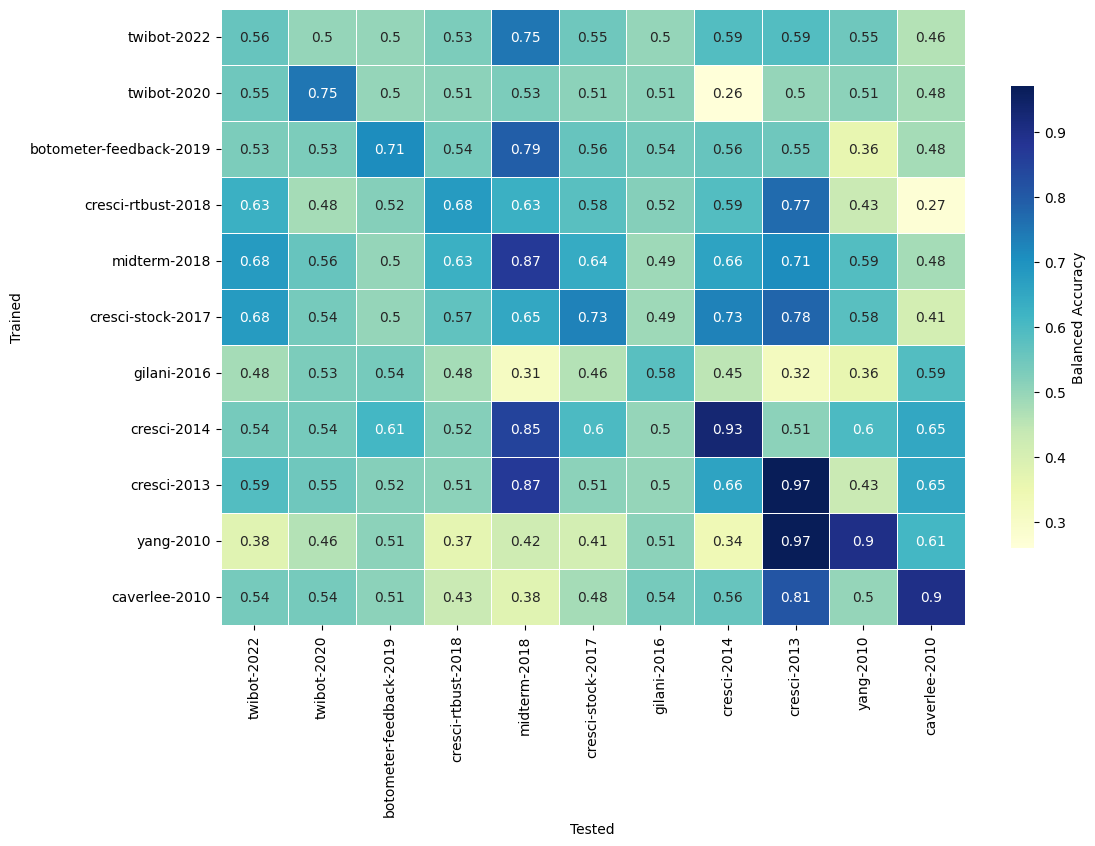

In [360]:
twibot_22 = [balanced_accuracy_twibot_22, balaced_acc_twibot22_twibot20, balaced_acc_twibot22_feedback, balaced_acc_twibot22_rtbust,
             balaced_acc_twibot22_midterm, balaced_acc_twibot22_stock, balaced_acc_twibot22_gilani, balaced_acc_twibot22_cresci17,
             balaced_acc_twibot22_cresci15, balaced_acc_twibot22_yang, balaced_acc_twibot22_caverlee]

twibot_20 = [balaced_acc_twibot20_twibot22, balanced_acc_twibot_20, balaced_acc_twibot20_feedback, balaced_acc_twibot20_rtbust,
             balaced_acc_twibot20_midterm, balaced_acc_twibot20_stock, balaced_acc_twibot20_gilani, balaced_acc_twibot20_cresci17,
             balaced_acc_twibot20_cresci15, balaced_acc_twibot20_yang, balaced_acc_twibot20_caverlee]

feedback_2019 = [balaced_acc_feedback_twibot22, balaced_acc_feedback_twibot20, balanced_acc_feedback_2019, balaced_acc_feedback_rtbust,
             balaced_acc_feedback_midterm, balaced_acc_feedback_stock, balaced_acc_feedback_gilani, balaced_acc_feedback_cresci17,
             balaced_acc_feedback_cresci15, balaced_acc_feedback_yang, balaced_acc_feedback_caverlee]

rtbust_2019 = [balaced_acc_rtbust_twibot22, balaced_acc_rtbust_twibot20, balaced_acc_rtbust_feedback, balanced_acc_rtbust,
             balaced_acc_rtbust_midterm, balaced_acc_rtbust_stock, balaced_acc_rtbust_gilani, balaced_acc_rtbust_cresci17,
             balaced_acc_rtbust_cresci15, balaced_acc_rtbust_yang, balaced_acc_rtbust_caverlee]

gilani_2017 = [balaced_acc_gilani_twibot22, balaced_acc_gilani_twibot20, balaced_acc_gilani_feedback, balaced_acc_gilani_rtbust,
             balaced_acc_gilani_midterm, balaced_acc_gilani_stock, balanced_acc_gilani, balaced_acc_gilani_cresci17,
             balaced_acc_gilani_cresci15, balaced_acc_gilani_yang, balaced_acc_gilani_caverlee]

cresci_2015 = [balaced_acc_cresci_2015_twibot22, balaced_acc_cresci_2015_twibot20, balaced_acc_cresci_2015_feedback, balaced_acc_cresci_2015_rtbust,
             balaced_acc_cresci_2015_midterm, balaced_acc_cresci_2015_stock, balaced_acc_cresci_2015_gilani, balaced_acc_cresci_2015_cresci17,
             balanced_acc_cresci15, balaced_acc_cresci_2015_yang, balaced_acc_cresci_2015_caverlee]

midterm_2018 = [balaced_acc_midterm_twibot22, balaced_acc_midterm_twibot20, balaced_acc_midterm_feedback, balaced_acc_midterm_rtbust,
             balanced_acc_midterm, balaced_acc_midterm_stock, balaced_acc_midterm_gilani, balaced_acc_midterm_cresci17,
             balaced_acc_midterm_cresci15, balaced_acc_midterm_yang, balaced_acc_midterm_caverlee]

stock_2018 = [balaced_acc_stock_twibot22, balaced_acc_stock_twibot20, balaced_acc_stock_feedback, balaced_acc_stock_rtbust,
             balaced_acc_stock_midterm, balanced_acc_stock, balaced_acc_stock_gilani, balaced_acc_stock_cresci17,
             balaced_acc_stock_cresci15, balaced_acc_stock_yang, balaced_acc_stock_caverlee]

cresci_2017 = [balaced_acc_cresci_2017_twibot22, balaced_acc_cresci_2017_twibot20, balaced_acc_cresci_2017_feedback, balaced_acc_cresci_2017_rtbust,
             balaced_acc_cresci_2017_midterm, balaced_acc_cresci_2017_stock, balaced_acc_cresci_2017_gilani, balanced_acc_cresci17,
             balaced_acc_cresci_2017_cresci15, balaced_acc_cresci_2017_yang, balaced_acc_cresci_2017_caverlee]

yang_2013 = [balaced_acc_yang_twibot22, balaced_acc_yang_twibot20, balaced_acc_yang_feedback, balaced_acc_yang_rtbust,
             balaced_acc_yang_midterm, balaced_acc_yang_stock, balaced_acc_yang_gilani, balaced_acc_yang_cresci17,
             balaced_acc_yang_cresci_2015, balanced_acc_yang, balaced_acc_yang_caverlee]

caverlee_2011 = [balaced_acc_caverlee_twibot22, balaced_acc_caverlee_twibot20, balaced_acc_caverlee_feedback, balaced_acc_caverlee_rtbust,
             balaced_acc_caverlee_midterm, balaced_acc_caverlee_stock, balaced_acc_caverlee_gilani, balaced_acc_caverlee_cresci17,
             balaced_acc_caverlee_cresci15, balaced_acc_caverlee_yang, balanced_acc_caverlee]

# Format the values in each list to 2 decimal places
twibot_22 = [round(value, 2) for value in twibot_22]
twibot_20 = [round(value, 2) for value in twibot_20]
feedback_2019 = [round(value, 2) for value in feedback_2019]
rtbust_2019 = [round(value, 2) for value in rtbust_2019]
gilani_2017 = [round(value, 2) for value in gilani_2017]
cresci_2015 = [round(value, 2) for value in cresci_2015]
midterm_2018 = [round(value, 2) for value in midterm_2018]
stock_2018 = [round(value, 2) for value in stock_2018]
cresci_2017 = [round(value, 2) for value in cresci_2017]
yang_2013 = [round(value, 2) for value in yang_2013]
caverlee_2011 = [round(value, 2) for value in caverlee_2011]

data = {
    'twibot-2022': twibot_22,
    'twibot-2020': twibot_20,
    'botometer-feedback-2019': feedback_2019,
    'cresci-rtbust-2018': rtbust_2019,
    'midterm-2018': midterm_2018,
    'cresci-stock-2017': stock_2018,
    'gilani-2016': gilani_2017,
    'cresci-2014': cresci_2017,
    'cresci-2013': cresci_2015,
    'yang-2010': yang_2013,
    'caverlee-2010': caverlee_2011
}

index = ['twibot-2022', 'twibot-2020', 'botometer-feedback-2019', 'cresci-rtbust-2018', 'midterm-2018', 'cresci-stock-2017',
         'gilani-2016', 'cresci-2014', 'cresci-2013', 'yang-2010', 'caverlee-2010']

df = pd.DataFrame(data, index=index).T

plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.75, 'label': 'Balanced Accuracy'})
plt.xlabel("Tested")
plt.ylabel("Trained")
#plt.title('Balanced accuracy of random forests trained on the row-indexed dataset and tested on the column-indexed one')
plt.show()


### Average performance table

In [361]:
# Create a DataFrame from your data (excluding the header row and the first column)
data_avg = df.copy()

# Exclude diagonal values by setting them to NaN
np.fill_diagonal(data_avg.values, np.nan)

# Calculate column and row averages with the correct division
column_averages = round(data_avg.sum() / (len(data_avg.index) - 1),2)  # Divide by 10
row_averages = round(data_avg.sum(axis=1) / (len(data_avg.columns) - 1),2)  # Divide by 10

# Create a new DataFrame
averages_df = pd.DataFrame({
    "Dataset Name": data_avg.index,  # Assuming dataset names are in the index
    "Used for Training": row_averages,
    "Used for Testing": column_averages
})
# Reset the index to have a numeric index if needed
averages_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(averages_df)

#EXPERIMENT: Fixed Intervals
Training Data: Always a fixed 3 year duration.

Testing Data: The subsequent year after the training interval.

Rationale: Helps understand if a consistent amount of historical data is sufficient to make accurate predictions for the next period.

Example: Train on 2010 and test on the available subsequent year - 2013, then merge 2013-2014, test it on 2016.

##Cycle 1
- Training Data: merged 2010 (caverlee-2011 and yang-2013)
- Testing Data: 2013 (cresci-2015)
- Rationale: After the 2010 data, the next available data is from 2013.


###Merge datasets

In [362]:
# Merge the training sets
X_train_2010 = pd.concat([X_train_caverlee_2011, X_train_yang_2013], axis=0)
y_train_2010 = pd.concat([y_train_caverlee_2011, y_train_yang_2013], axis=0)

# Merge the validation sets
X_val_2010 = pd.concat([X_val_caverlee_2011, X_val_yang_2013], axis=0)
y_val_2010 = pd.concat([y_val_caverlee_2011, y_val_yang_2013], axis=0)

# Merge the test sets
X_test_2010= pd.concat([X_test_caverlee_2011, X_test_yang_2013], axis=0)
y_test_2010 = pd.concat([y_test_caverlee_2011, y_test_yang_2013], axis=0)

X_train_2010.drop(columns=['listed_count'], inplace=True)
X_val_2010.drop(columns=['listed_count'], inplace=True)
X_test_2010.drop(columns=['listed_count'], inplace=True)
# Print the shapes of the merged datasets
print("Merged Training Set:", X_train_2010.shape)
print("Merged Validation Set:", X_val_2010.shape)
print("Merged Test Set:", X_test_2010.shape)

               Dataset Name  Used for Training  Used for Testing
0               twibot-2022               0.55              0.56
1               twibot-2020               0.49              0.52
2   botometer-feedback-2019               0.54              0.52
3        cresci-rtbust-2018               0.54              0.51
4              midterm-2018               0.59              0.62
5         cresci-stock-2017               0.59              0.53
6               gilani-2016               0.45              0.51
7               cresci-2014               0.59              0.54
8               cresci-2013               0.58              0.65
9                 yang-2010               0.50              0.49
10            caverlee-2010               0.53              0.51
Merged Training Set: (35650, 3)
Merged Validation Set: (7640, 3)
Merged Test Set: (7640, 3)


###Train the model

In [363]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_2010 = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_2010.fit(X_train_2010, y_train_2010)

# Predict on the validation set
y_val_pred_2010 = baseline_model_2010.predict(X_val_2010)

# Calculate balanced accuracy
balanced_acc_baseline_2010 = balanced_accuracy_score(y_val_2010, y_val_pred_2010)

# Calculate F1 score
f1_baseline_2010 = f1_score(y_val_2010, y_val_pred_2010)


# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_2010:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_2010:.2f}')

Balanced accuracy on the validation set: 0.90
F1 Score on the validation set: 0.88


In [364]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_2010, y_train_2010)

# Get the best hyperparameters
#best_params_2010 = grid_search.best_params_
best_params_2010 = {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

print(f"Best param:", best_params_2010)

Best param: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [365]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_2010 = RandomForestClassifier(random_state=42, **best_params_2010)

# Train the model on the entire training dataset
optimized_model_2010.fit(X_train_2010, y_train_2010)

# Make predictions on the test set
y_val_pred_2010_op = optimized_model_2010.predict(X_val_2010)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_2010 = balanced_accuracy_score(y_val_2010, y_val_pred_2010_op)

# Calculate F1 score
f1_op_2010 = f1_score(y_val_2010, y_val_pred_2010_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_2010:.2f}')
print(f'F1 Score on the test set: {f1_op_2010:.2f}')

Balanced accuracy on the test set: 0.90
F1 Score on the test set: 0.89


In [366]:
#Save the model
if balanced_acc_baseline_2010 < balanced_acc_op_2010:
    joblib.dump(optimized_model_2010, 'rf_2010.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_2010 == balanced_acc_op_2010 and f1_baseline_2010 < f1_op_2010:
    joblib.dump(optimized_model_2010, 'rf_2010.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_2010, 'rf_2010.pkl')
    print('Saved model: baseline')

Saved model: optimized


###Predict 2013

In-domain

In [367]:
# Predict subsequent year
model_2010 = joblib.load('rf_2010.pkl')

#Predict gilani
y_test_pred_2010 = model_2010.predict(X_test_2010)
y_test_pred_2010_prob = model_2010.predict_proba(X_test_2010)[:, 1]
balanced_acc_2010 = balanced_accuracy_score(y_test_2010, y_test_pred_2010)
balanced_acc_2010

0.9046884640610029

Cross-dataset

In [368]:
# Predict subsequent year
model_2010 = joblib.load('rf_2010.pkl')

X_cresci_2015_fft = X_cresci_2015[['friends_count', 'followers_count', 'tweet_count']].copy()

#Predict gilani
y_pred_2013 = model_2010.predict(X_cresci_2015_fft)
y_pred_2013_prob = model_2010.predict_proba(X_cresci_2015_fft)[:, 1]
balanced_acc_pred_2013 = balanced_accuracy_score(y_cresci_2015, y_pred_2013)
f1_2013 = f1_score(y_cresci_2015, y_pred_2013)
balanced_acc_pred_2013

0.8149688956224319

### Feature importance

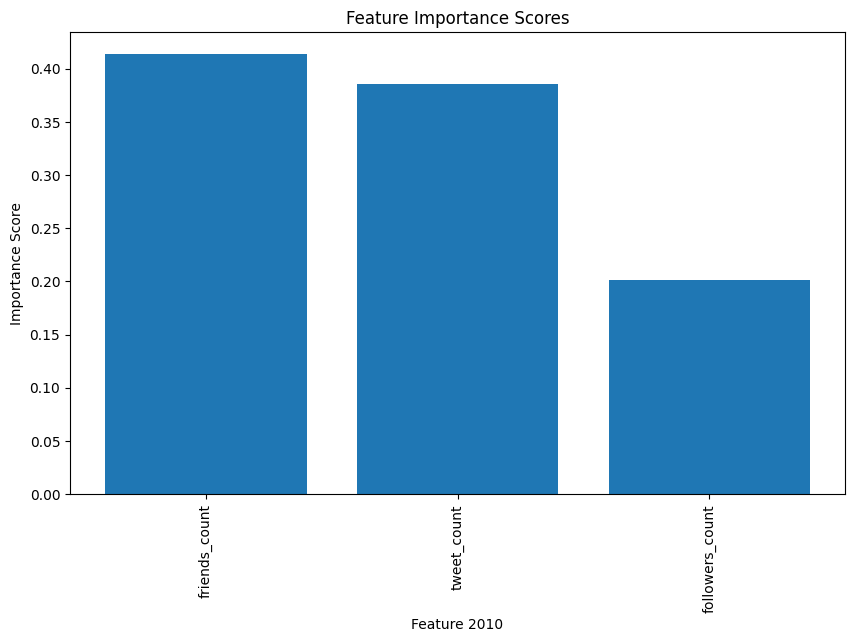

In [369]:
# Get feature importances
importances_2010 = model_2010.feature_importances_

# Sort feature importances in descending order
sorted_indices_2010_2013 = np.argsort(importances_2010)[::-1]

# Get feature names (if available) to label the plot
feature_names_2010 =  X_train_2010.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2010.shape[1]), importances_2010[sorted_indices_2010_2013], align="center")
plt.xticks(range(X_train_2010.shape[1]), [feature_names_2010[i] for i in sorted_indices_2010_2013], rotation=90)
plt.xlabel("Feature 2010")
plt.ylabel("Importance Score")
plt.title("Feature Importance Scores")
plt.show()

###Probability Distributions

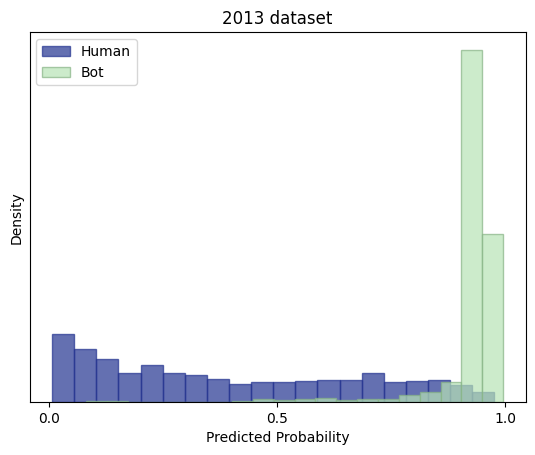

In [370]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2013_prob[y_cresci_2015 == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390', density=True)

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2013_prob[y_cresci_2015 == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385', density=True)

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2013 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

##Cycle 2
- Training Data: merged 2013 (cresci-2015) and 2014 (cresci-2017)
- Testing Data: 2016 (gilani_2017)
- Rationale: Train on two consecutive years (2013 and 2014) and test on the next available year, which is 2016.


###Merge datasets

In [371]:
# Merge the training sets
X_train_2013_2014 = pd.concat([X_train_cresci_2015, X_train_cresci_2017], axis=0)
y_train_2013_2014 = pd.concat([y_train_cresci_2015, y_train_cresci_2017], axis=0)

# Merge the validation sets
X_val_2013_2014 = pd.concat([X_val_cresci_2015, X_val_cresci_2017], axis=0)
y_val_2013_2014 = pd.concat([y_val_cresci_2015, y_val_cresci_2017], axis=0)

# Merge the test sets
X_test_2013_2014 = pd.concat([X_test_cresci_2015, X_test_cresci_2017], axis=0)
y_test_2013_2014 = pd.concat([y_test_cresci_2015, y_test_cresci_2017], axis=0)

X_train_2013_2014.drop(columns=['tweet_count'], inplace=True)
X_val_2013_2014.drop(columns=['tweet_count'], inplace=True)
X_test_2013_2014.drop(columns=['tweet_count'], inplace=True)
# Print the shapes of the merged datasets
print("Merged Training Set:", X_train_2013_2014.shape)
print("Merged Validation Set:", X_val_2013_2014.shape)
print("Merged Test Set:", X_test_2013_2014.shape)

Merged Training Set: (10717, 3)
Merged Validation Set: (2297, 3)
Merged Test Set: (2298, 3)


###Train the model

In [372]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_2013_2014 = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_2013_2014.fit(X_train_2013_2014, y_train_2013_2014)

# Predict on the validation set
y_val_pred_2013_2014 = baseline_model_2013_2014.predict(X_val_2013_2014)

# Calculate balanced accuracy
balanced_acc_baseline_2013_2014 = balanced_accuracy_score(y_val_2013_2014, y_val_pred_2013_2014)

# Calculate F1 score
f1_baseline_2013_2014 = f1_score(y_val_2013_2014, y_val_pred_2013_2014)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_2013_2014:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_2013_2014:.2f}')

Balanced accuracy on the validation set: 0.91
F1 Score on the validation set: 0.93


In [373]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_2013_2014, y_train_2013_2014)

# Get the best hyperparameters
#best_params_2013_2014 = grid_search.best_params_
best_params_2013_2014 = {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
print(f"Best param:", best_params_2013_2014)

Best param: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


In [374]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_2013_2014 = RandomForestClassifier(random_state=42, **best_params_2013_2014)

# Train the model on the entire training dataset
optimized_model_2013_2014.fit(X_train_2013_2014, y_train_2013_2014)

# Make predictions on the test set
y_val_pred_2013_2014_op = optimized_model_2013_2014.predict(X_val_2013_2014)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_2013_2014 = balanced_accuracy_score(y_val_2013_2014, y_val_pred_2013_2014_op)

# Calculate F1 score
f1_op_2013_2014 = f1_score(y_val_2013_2014, y_val_pred_2013_2014_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_2013_2014:.2f}')
print(f'F1 Score on the test set: {f1_op_2013_2014:.2f}')

Balanced accuracy on the test set: 0.91
F1 Score on the test set: 0.93


In [375]:
#Save the model
if balanced_acc_baseline_2013_2014 < balanced_acc_op_2013_2014:
    joblib.dump(optimized_model_2013_2014, 'rf_2013_2014.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_2013_2014 == balanced_acc_op_2013_2014 and f1_baseline_2013_2014 < f1_op_2013_2014:
    joblib.dump(optimized_model_2013_2014, 'rf_2013_2014.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_2013_2014, 'rf_2013_2014.pkl')
    print('Saved model: baseline')

Saved model: optimized


###Predict 2016

In-domain

In [376]:
# Predict subsequent year
model_2013_2014 = joblib.load('rf_2013_2014.pkl')

#Predict gilani
y_test_pred_2013_2014 = model_2013_2014.predict(X_test_2013_2014)
y_test_2013_2014_prob = model_2013_2014.predict_proba(X_test_2013_2014)[:, 1]
balanced_acc_2013_2014 = balanced_accuracy_score(y_test_2013_2014, y_test_pred_2013_2014)
balanced_acc_2013_2014

0.9033613445378151

Cross-dataset

In [377]:
# Predict subsequent year
model_2013_2014 = joblib.load('rf_2013_2014.pkl')

#Predict gilani
y_pred_2016 = model_2013_2014.predict(X_gilani_2017)
y_pred_2016_prob = model_2013_2014.predict_proba(X_gilani_2017)[:, 1]
balanced_acc_pred_2016 = balanced_accuracy_score(y_gilani_2017, y_pred_2016)
f1_2016 = f1_score(y_gilani_2017, y_pred_2016)
balanced_acc_pred_2016

0.5015621771659109

### Feature Importance

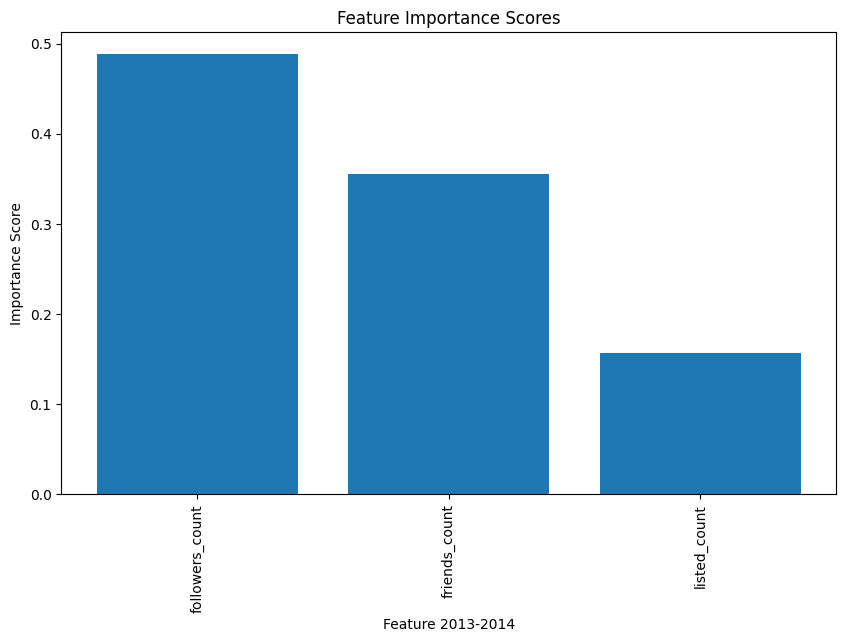

In [378]:
# Get feature importances
importances_2013_2014 = model_2013_2014.feature_importances_

# Sort feature importances in descending order
sorted_indices_2013_2014 = np.argsort(importances_2013_2014)[::-1]

# Get feature names (if available) to label the plot
feature_names_2013_2014 =  X_train_2013_2014.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2013_2014.shape[1]), importances_2013_2014[sorted_indices_2013_2014], align="center")
plt.xticks(range(X_train_2013_2014.shape[1]), [feature_names_2013_2014[i] for i in sorted_indices_2013_2014], rotation=90)
plt.xlabel("Feature 2013-2014")
plt.ylabel("Importance Score")
plt.title("Feature Importance Scores")
plt.show()

###Probability Distributions

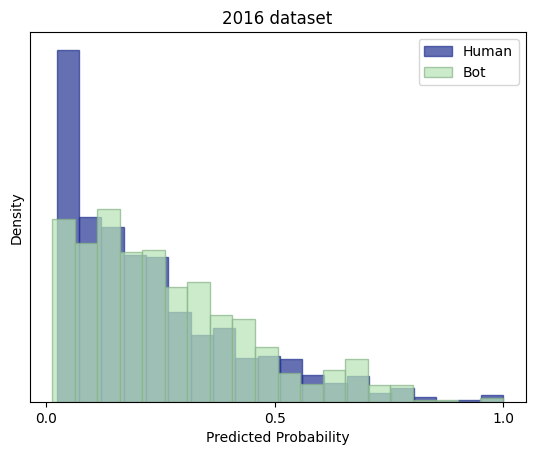

In [379]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2016_prob[y_gilani_2017 == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390', density=True)

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2016_prob[y_gilani_2017 == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385', density=True)

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2016 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

##Cycle 3
- Training Data: merged 2016 (gilani_2017) and 2017 (stock_2018)
- Testing Data: merged 2018 (midterm_2018 and rtbust_2018)
- Rationale: Train on two consecutive years (2016 and 2017) and test on the next available year, which is 2018.


###Merge datasets

In [380]:
# Merge the training sets
X_train_2016_2017 = pd.concat([X_train_gilani_2017, X_train_stock_2018], axis=0)
y_train_2016_2017 = pd.concat([y_train_gilani_2017, y_train_stock_2018], axis=0)

# Merge the validation sets
X_val_2016_2017 = pd.concat([X_val_gilani_2017, X_val_stock_2018], axis=0)
y_val_2016_2017 = pd.concat([y_val_gilani_2017, y_val_stock_2018], axis=0)

# Merge the test sets
X_test_2016_2017 = pd.concat([X_test_gilani_2017, X_test_stock_2018], axis=0)
y_test_2016_2017 = pd.concat([y_test_gilani_2017, y_test_stock_2018], axis=0)

# Print the shapes of the merged datasets
print("Merged Training Set:", X_train_2016_2017.shape)
print("Merged Validation Set:", X_val_2016_2017.shape)
print("Merged Test Set:", X_test_2016_2017.shape)

Merged Training Set: (11005, 3)
Merged Validation Set: (2358, 3)
Merged Test Set: (2360, 3)


In [381]:
# Merge the test sets
X_2018 = pd.concat([X_midterm_2018, X_rtbust_2019], axis=0)
y_2018 = pd.concat([y_midterm_2018, y_rtbust_2019], axis=0)

# Print the shapes of the merged datasets
print("Merged Testing Set:", X_2018.shape)

Merged Testing Set: (51223, 3)


###Train the model

In [382]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_2016_2017 = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_2016_2017.fit(X_train_2016_2017, y_train_2016_2017)

# Predict on the validation set
y_val_pred_2016_2017 = baseline_model_2016_2017.predict(X_val_2016_2017)

# Calculate balanced accuracy
balanced_acc_baseline_2016_2017 = balanced_accuracy_score(y_val_2016_2017, y_val_pred_2016_2017)

# Calculate F1 score
f1_baseline_2016_2017 = f1_score(y_val_2016_2017, y_val_pred_2016_2017)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_2016_2017:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_2016_2017:.2f}')

Balanced accuracy on the validation set: 0.68
F1 Score on the validation set: 0.67


In [383]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_2016_2017, y_train_2016_2017)

# Get the best hyperparameters
#best_params_2016_2017 = grid_search.best_params_
best_params_2016_2017 = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
print(f"Best param:", best_params_2016_2017)

Best param: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [384]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_2016_2017 = RandomForestClassifier(random_state=42, **best_params_2016_2017)

# Train the model on the entire training dataset
optimized_model_2016_2017.fit(X_train_2016_2017, y_train_2016_2017)

# Make predictions on the test set
y_val_pred_2016_2017_op = optimized_model_2016_2017.predict(X_val_2016_2017)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_2016_2017 = balanced_accuracy_score(y_val_2016_2017, y_val_pred_2016_2017_op)

# Calculate F1 score
f1_op_2016_2017 = f1_score(y_val_2016_2017, y_val_pred_2016_2017_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_2016_2017:.2f}')
print(f'F1 Score on the test set: {f1_op_2016_2017:.2f}')

Balanced accuracy on the test set: 0.70
F1 Score on the test set: 0.70


In [385]:
#Save the model
if balanced_acc_baseline_2016_2017 < balanced_acc_op_2016_2017:
    joblib.dump(optimized_model_2016_2017, 'rf_2016_2017.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_2016_2017 == balanced_acc_op_2016_2017 and f1_baseline_2016_2017 < f1_op_2016_2017:
    joblib.dump(optimized_model_2016_2017, 'rf_2016_2017.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_2016_2017, 'rf_2016_2017.pkl')
    print('Saved model: baseline')

Saved model: optimized


###Predict 2018

In-domain

In [386]:
# Predict subsequent year
model_2016_2017 = joblib.load('rf_2016_2017.pkl')

#Predict gilani
y_test_pred_2016_2017 = model_2016_2017.predict(X_test_2016_2017)
y_test_pred_2016_2017_prob = model_2016_2017.predict_proba(X_test_2016_2017)[:, 1]
balanced_acc_2016_2017 = balanced_accuracy_score(y_test_2016_2017, y_test_pred_2016_2017)
balanced_acc_2016_2017

0.7079243243243243

Cross-dataset

In [387]:
# Predict subsequent year
model_2016_2017 = joblib.load('rf_2016_2017.pkl')

#Predict gilani
y_pred_2018 = model_2016_2017.predict(X_2018)
y_pred_2018_prob = model_2016_2017.predict_proba(X_2018)[:, 1]
balanced_acc_pred_2018 = balanced_accuracy_score(y_2018, y_pred_2018)
f1_2018 = f1_score(y_2018, y_pred_2018)
balanced_acc_pred_2018

0.6531262936888652

### Feature Importance

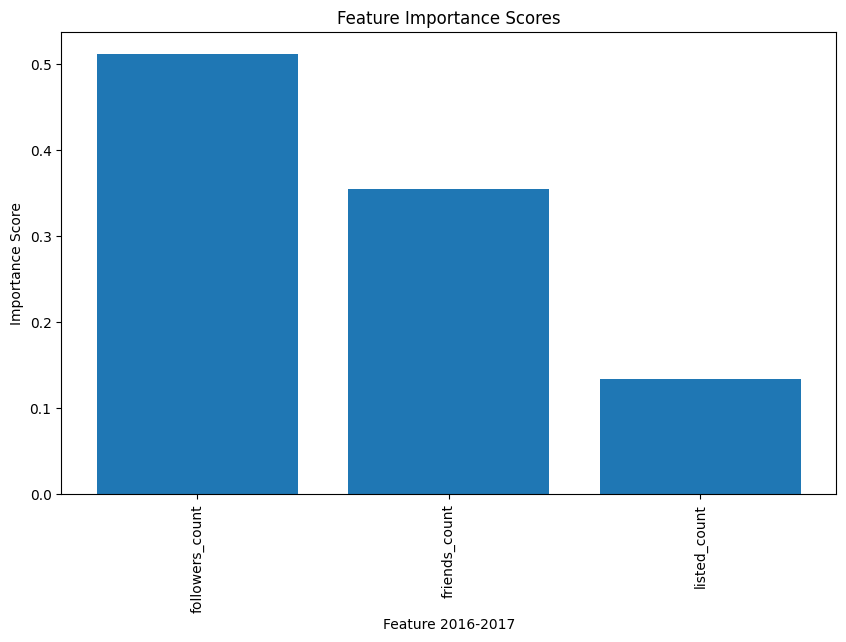

In [388]:
# Get feature importances
importances_2016_2017 = model_2016_2017.feature_importances_

# Sort feature importances in descending order
sorted_indices_2016_2017 = np.argsort(importances_2016_2017)[::-1]

# Get feature names (if available) to label the plot
feature_names_2016_2017 =  X_train_2016_2017.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2016_2017.shape[1]), importances_2016_2017[sorted_indices_2016_2017], align="center")
plt.xticks(range(X_train_2016_2017.shape[1]), [feature_names_2016_2017[i] for i in sorted_indices_2016_2017], rotation=90)
plt.xlabel("Feature 2016-2017")
plt.ylabel("Importance Score")
plt.title("Feature Importance Scores")
plt.show()

###Probability Distributions

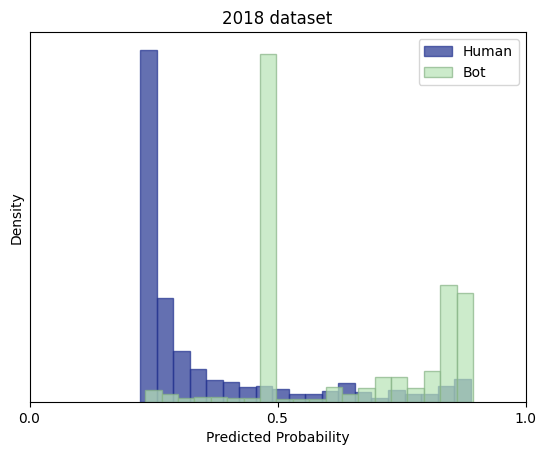

In [389]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2018_prob[y_2018 == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390', density=True)

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2018_prob[y_2018 == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385', density=True)

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2018 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

##Cycle 4
- Training Data: merged 2018 (midterm-2018 and rtbust-2019) and 2019 (feedback-2019)
- Testing Data: 2020 (twibot_2020)
- Rationale: Train on two consecutive years (2018 and 2019) and test on the next available year, which is 2020.


###Merge datasets

In [390]:
# Merge the training sets
X_train_2018_2019 = pd.concat([X_train_midterm_2018, X_train_rtbust_2019, X_train_feedback_2019], axis=0)
y_train_2018_2019 = pd.concat([y_train_midterm_2018, y_train_rtbust_2019, y_train_feedback_2019], axis=0)

# Merge the validation sets
X_val_2018_2019 = pd.concat([X_val_midterm_2018, X_val_rtbust_2019, X_val_feedback_2019], axis=0)
y_val_2018_2019 = pd.concat([y_val_midterm_2018, y_val_rtbust_2019, y_val_feedback_2019], axis=0)

# Merge the test sets
X_test_2018_2019 = pd.concat([X_test_midterm_2018, X_test_rtbust_2019, X_test_feedback_2019], axis=0)
y_test_2018_2019= pd.concat([y_test_midterm_2018, y_test_rtbust_2019, y_test_feedback_2019], axis=0)

# Print the shapes of the merged datasets
print("Merged Training Set:", X_train_2018_2019.shape)
print("Merged Validation Set:", X_val_2018_2019.shape)
print("Merged Test Set:", X_test_2018_2019.shape)

Merged Training Set: (36216, 3)
Merged Validation Set: (7760, 3)
Merged Test Set: (7762, 3)


###Train the model

In [391]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_2018_2019 = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_2018_2019.fit(X_train_2018_2019, y_train_2018_2019)

# Predict on the validation set
y_val_pred_2018_2019 = baseline_model_2018_2019.predict(X_val_2018_2019)

# Calculate balanced accuracy
balanced_acc_baseline_2018_2019 = balanced_accuracy_score(y_val_2018_2019, y_val_pred_2018_2019)

# Calculate F1 score
f1_baseline_2018_2019 = f1_score(y_val_2018_2019, y_val_pred_2018_2019)


# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_2018_2019:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_2018_2019:.2f}')

Balanced accuracy on the validation set: 0.87
F1 Score on the validation set: 0.96


In [392]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_2018_2019, y_train_2018_2019)

# Get the best hyperparameters
#best_params_2018_2019 = grid_search.best_params_
best_params_2018_2019 = {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}
print(f"Best param:", best_params_2018_2019)

Best param: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}


In [393]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_2018_2019 = RandomForestClassifier(random_state=42, **best_params_2018_2019)

# Train the model on the entire training dataset
optimized_model_2018_2019.fit(X_train_2018_2019, y_train_2018_2019)

# Make predictions on the test set
y_val_pred_2018_2019_op = optimized_model_2018_2019.predict(X_val_2018_2019)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_2018_2019 = balanced_accuracy_score(y_val_2018_2019, y_val_pred_2018_2019_op)

# Calculate F1 score
f1_op_2018_2019 = f1_score(y_val_2018_2019, y_val_pred_2018_2019_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_2018_2019:.2f}')
print(f'F1 Score on the test set: {f1_op_2018_2019:.2f}')

Balanced accuracy on the test set: 0.87
F1 Score on the test set: 0.97


In [394]:
# Save the model
if balanced_acc_baseline_2018_2019 < balanced_acc_op_2018_2019:
    joblib.dump(optimized_model_2018_2019, 'rf_2018_2019.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_2018_2019 == balanced_acc_op_2018_2019 and f1_baseline_2018_2019 < f1_op_2018_2019:
    joblib.dump(optimized_model_2018_2019, 'rf_2018_2019.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_2018_2019, 'rf_2018_2019.pkl')
    print('Saved model: baseline')

Saved model: baseline


###Predict 2020

In-domain

In [395]:
# Predict subsequent year
model_2018_2019 = joblib.load('rf_2018_2019.pkl')

#Predict gilani
y_test_pred_2018_2019 = model_2018_2019.predict(X_test_2018_2019)
y_test_pred_2018_2019_prob = model_2018_2019.predict_proba(X_test_2018_2019)[:, 1]
balanced_acc_2018_2019 = balanced_accuracy_score(y_test_2018_2019, y_test_pred_2018_2019)
balanced_acc_2018_2019

0.860782837335535

Cross-dataset

In [396]:
# Predict subsequent year
model_2018_2019 = joblib.load('rf_2018_2019.pkl')

#Predict gilani
y_pred_2020 = model_2018_2019.predict(X_twibot_20_lff)
y_pred_2020_prob = model_2018_2019.predict_proba(X_twibot_20_lff)[:, 1]
balanced_acc_pred_2020 = balanced_accuracy_score(y_twibot_20_sub, y_pred_2020)
f1_2020 = f1_score(y_twibot_20_sub, y_pred_2020)
balanced_acc_pred_2020

0.5553011420165416

### Feature Importance

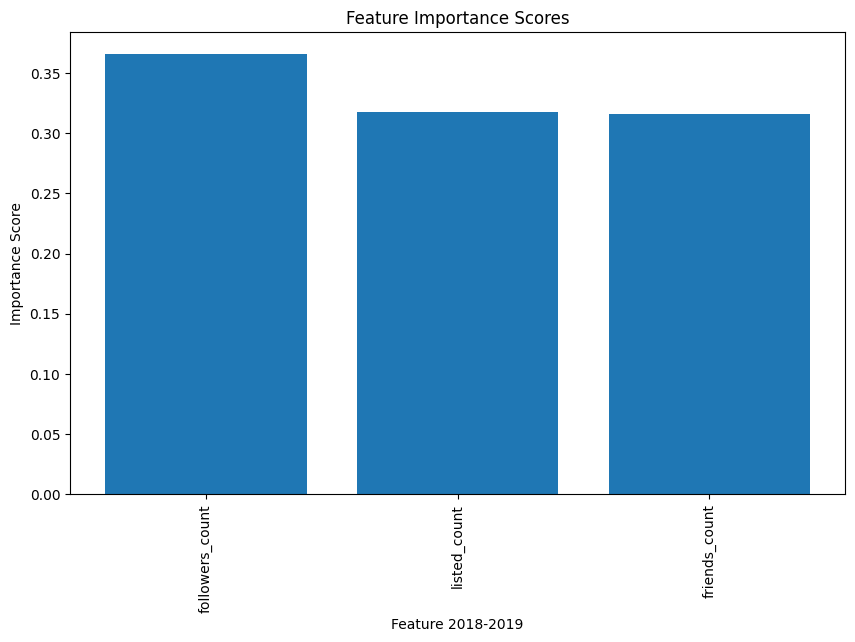

In [397]:
# Get feature importances
importances_2018_2019 = model_2018_2019.feature_importances_

# Sort feature importances in descending order
sorted_indices_2018_2019 = np.argsort(importances_2018_2019)[::-1]

# Get feature names (if available) to label the plot
feature_names_2018_2019 =  X_train_2018_2019.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2018_2019.shape[1]), importances_2018_2019[sorted_indices_2018_2019], align="center")
plt.xticks(range(X_train_2018_2019.shape[1]), [feature_names_2018_2019[i] for i in sorted_indices_2018_2019], rotation=90)
plt.xlabel("Feature 2018-2019")
plt.ylabel("Importance Score")
plt.title("Feature Importance Scores")
plt.show()

###Probability Distributions

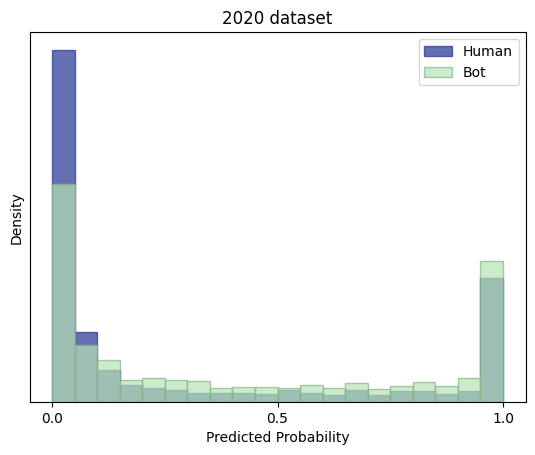

In [398]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2020_prob[y_twibot_20_sub == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390', density=True)

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2020_prob[y_twibot_20_sub == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385', density=True)

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2020 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

##Cycle 5
- Training Data: merged 2019 (feedback_2019) and 2020 (twibot_20)
- Testing Data: 2022 (twibot_2022)
- Rationale: Train on two consecutive years (2019 and 2020) and test on the next available year, which is 2022.


###Merge datasets

In [399]:
# Merge the training sets
X_train_2019_2020 = pd.concat([X_train_feedback_2019, X_train_twibot_20_lff], axis=0)
y_train_2019_2020 = pd.concat([y_train_feedback_2019, y_train_twibot_20_sub], axis=0)

# Merge the validation sets
X_val_2019_2020 = pd.concat([X_val_feedback_2019, X_val_twibot_20_lff], axis=0)
y_val_2019_2020 = pd.concat([y_val_feedback_2019, y_val_twibot_20_sub], axis=0)

# Merge the test sets
X_test_2019_2020 = pd.concat([X_test_feedback_2019, X_test_twibot_20_lff], axis=0)
y_test_2019_2020 = pd.concat([y_test_feedback_2019, y_test_twibot_20_sub], axis=0)

# Print the shapes of the merged datasets
print("Merged Training Set:", X_train_2019_2020.shape)
print("Merged Validation Set:", X_val_2019_2020.shape)
print("Merged Test Set:", X_test_2019_2020.shape)

Merged Training Set: (8638, 3)
Merged Validation Set: (2442, 3)
Merged Test Set: (1261, 3)


###Train the model

In [400]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_2019_2020 = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_2019_2020.fit(X_train_2019_2020, y_train_2019_2020)

# Predict on the validation set
y_val_pred_2019_2020 = baseline_model_2019_2020.predict(X_val_2019_2020)

# Calculate balanced accuracy
balanced_acc_baseline_2019_2020 = balanced_accuracy_score(y_val_2019_2020, y_val_pred_2019_2020)

# Calculate F1 score
f1_baseline_2019_2020 = f1_score(y_val_2019_2020, y_val_pred_2019_2020)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_2019_2020:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_2019_2020:.2f}')

Balanced accuracy on the validation set: 0.69
F1 Score on the validation set: 0.73


In [401]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_2019_2020, y_train_2019_2020)

# Get the best hyperparameters
#best_params_2019_2020 = grid_search.best_params_
best_params_2019_2020 = {'max_depth': 5, 'min_samples_split': 50, 'n_estimators': 100}
print(f"Best param:", best_params_2019_2020)

Best param: {'max_depth': 5, 'min_samples_split': 50, 'n_estimators': 100}


In [402]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_2019_2020 = RandomForestClassifier(random_state=42, **best_params_2019_2020)

# Train the model on the entire training dataset
optimized_model_2019_2020.fit(X_train_2019_2020, y_train_2019_2020)

# Make predictions on the test set
y_val_pred_2019_2020_op = optimized_model_2019_2020.predict(X_val_2019_2020)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_2019_2020 = balanced_accuracy_score(y_val_2019_2020, y_val_pred_2019_2020_op)

# Calculate F1 score
f1_op_2019_2020 = f1_score(y_val_2019_2020, y_val_pred_2019_2020_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_2019_2020:.2f}')
print(f'F1 Score on the test set: {f1_op_2019_2020:.2f}')

Balanced accuracy on the test set: 0.72
F1 Score on the test set: 0.79


In [403]:
# Save the model
if balanced_acc_baseline_2019_2020 < balanced_acc_op_2019_2020:
    joblib.dump(optimized_model_2019_2020, 'rf_2019_2020.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_2019_2020 == balanced_acc_op_2019_2020 and f1_baseline_2019_2020 < f1_op_2019_2020:
    joblib.dump(optimized_model_2019_2020, 'rf_2019_2020.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_2019_2020, 'rf_2019_2020.pkl')
    print('Saved model: baseline')

Saved model: optimized


###Predict 2022

In-domain

In [404]:
# Predict subsequent year
model_2019_2020 = joblib.load('rf_2019_2020.pkl')

#Predict gilani
y_test_pred_2019_2020 = model_2019_2020.predict(X_test_2019_2020)
y_test_pred_2019_2020_prob = model_2019_2020.predict_proba(X_test_2019_2020)[:, 1]
balanced_acc_2019_2020 = balanced_accuracy_score(y_test_2019_2020, y_test_pred_2019_2020)
balanced_acc_2019_2020

0.7231457800511509

Cross-dataset

In [405]:
# Predict subsequent year
model_2019_2020 = joblib.load('rf_2019_2020.pkl')

#Predict gilani
y_pred_2022 = model_2019_2020.predict(X_twibot_22_lff)
y_pred_2022_prob = model_2019_2020.predict_proba(X_twibot_22_lff)[:, 1]
balanced_acc_pred_2022 = balanced_accuracy_score(y_twibot_22, y_pred_2022)
f1_2022 = f1_score(y_twibot_22, y_pred_2022)
balanced_acc_pred_2022

0.5751048775431072

### Feature Importance

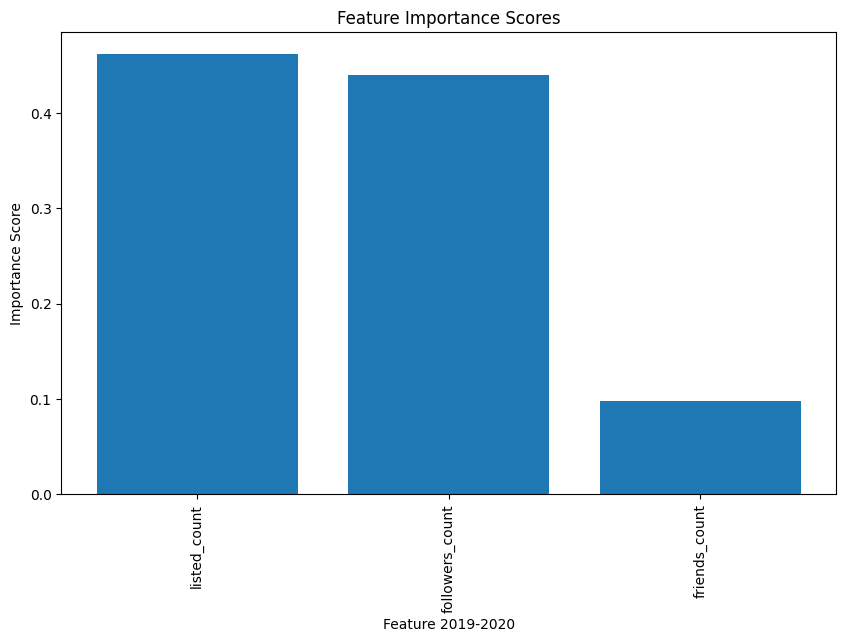

In [406]:
# Get feature importances
importances_2019_2020 = model_2019_2020.feature_importances_

# Sort feature importances in descending order
sorted_indices_2019_2020 = np.argsort(importances_2019_2020)[::-1]

# Get feature names (if available) to label the plot
feature_names_2019_2020 =  X_train_2019_2020.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2019_2020.shape[1]), importances_2019_2020[sorted_indices_2019_2020], align="center")
plt.xticks(range(X_train_2019_2020.shape[1]), [feature_names_2019_2020[i] for i in sorted_indices_2019_2020], rotation=90)
plt.xlabel("Feature 2019-2020")
plt.ylabel("Importance Score")
plt.title("Feature Importance Scores")
plt.show()

###Probability Distributions

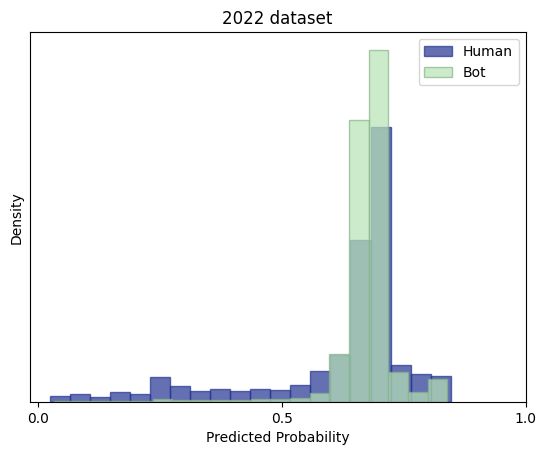

In [407]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2022_prob[y_twibot_22 == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390', density=True)

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2022_prob[y_twibot_22 == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385', density=True)

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2022 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

## Line chart

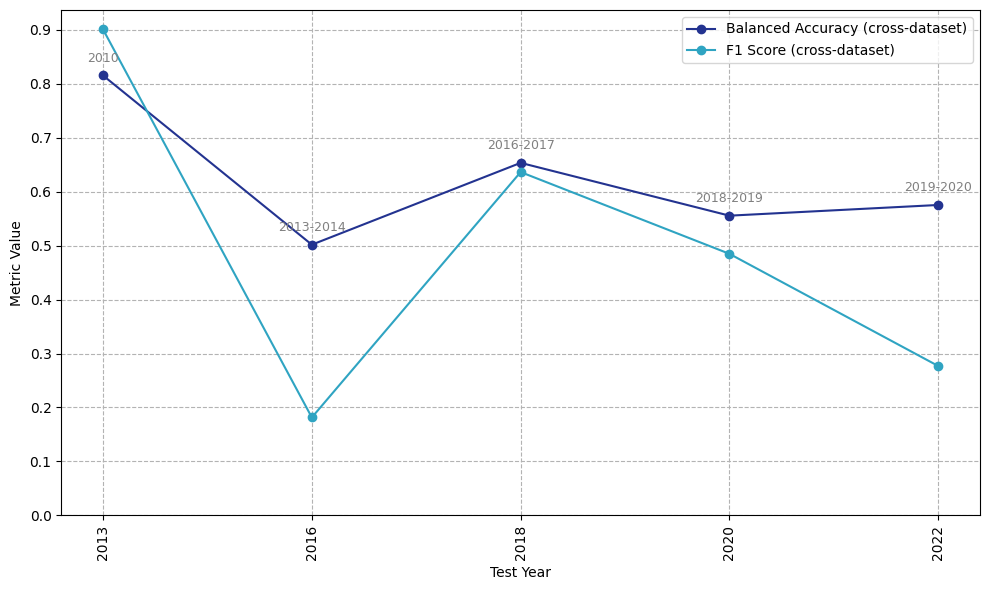

In [408]:
# Data
years_trained_on = ["2010", "2013-2014", "2016-2017", "2018-2019", "2019-2020"]
years_tested_on = ["2013", "2016", "2018", "2020", "2022"]
balanced_accuracy = [balanced_acc_pred_2013, balanced_acc_pred_2016, balanced_acc_pred_2018,
                     balanced_acc_pred_2020, balanced_acc_pred_2022]
f1_scores_list = [f1_2013, f1_2016, f1_2018, f1_2020, f1_2022]

plt.figure(figsize=(10,6))

# Plotting the data
plt.plot(years_tested_on, balanced_accuracy, marker='o', label='Balanced Accuracy (cross-dataset)', color='#233390')
plt.plot(years_tested_on, f1_scores_list, marker='o', label='F1 Score (cross-dataset)', color='#2FA4C2')

# Annotating each point with the corresponding training year(s)
for i, year in enumerate(years_tested_on):
    plt.annotate(f'{years_trained_on[i]}',
                 (year, balanced_accuracy[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=9,
                 color='grey',
                 rotation = 0)

# Setting up the x-axis
plt.xlabel('Test Year')
plt.ylabel('Metric Value')
plt.xticks(ticks=years_tested_on, labels=years_tested_on, rotation=90)

# Modify the y-axis to have a more granular range with increments of 0.1
y_max = plt.ylim()[1]  # Get the current maximum of the y-axis
y_ticks = np.arange(0, round(y_max, 1) + 0.1, 0.1)  # Set new ticks from 0 to y_max with a step of 0.1
plt.yticks(y_ticks, [f'{y:.1f}' for y in y_ticks])  # Set tick labels with one decimal place

# Finalizing the plot
plt.legend()
plt.tight_layout()
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()

## Feature Importance 2010-2020 (per fixed period)

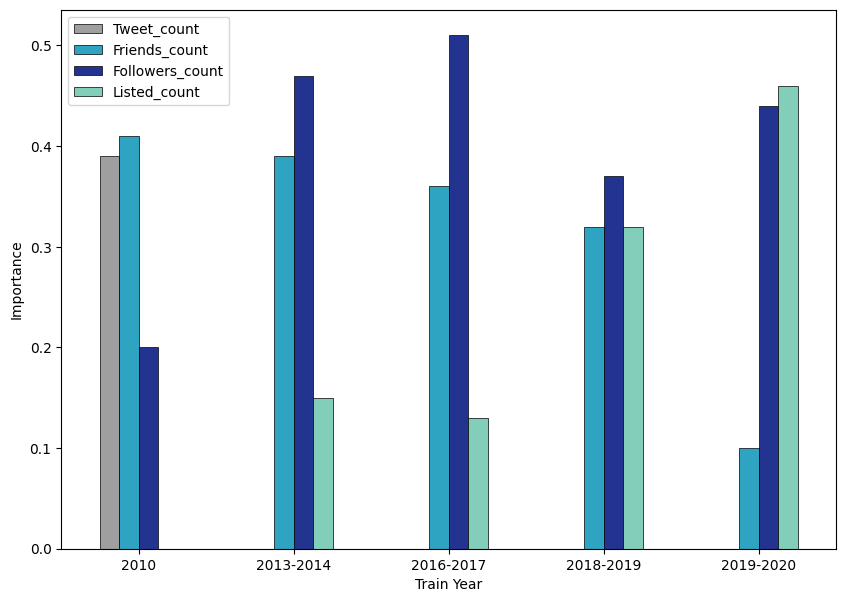

In [409]:
# Data
data_feat_import = {
    'Train Year': ['2010', '2013-2014', '2016-2017', '2018-2019', '2019-2020'],
    'Tweet_count': [0.39, 0, 0, 0, 0],
    'Friends_count': [0.41, 0.39, 0.36, 0.32, 0.1],
    'Followers_count': [0.2, 0.47, 0.51, 0.37, 0.44],
    'Listed_count': [0, 0.15, 0.13, 0.32, 0.46],
}

# Convert the dictionary to a pandas DataFrame and set 'Period' as the index
df_feat_import = pd.DataFrame(data_feat_import)
df_feat_import.set_index('Train Year', inplace=True)

# Define the edge color and width
edge_color = 'black'
edge_width = 0.5  # Adjust the width as desired

# Plotting the bar chart with centered period labels, edge color, and reduced opacity
ax = df_feat_import.plot(kind='bar', figsize=(10, 7),
                         color=['#9F9F9F', '#2FA4C2', '#233390', '#83CEBB'],
                         edgecolor=edge_color,
                         linewidth=edge_width)

# Setting the ylabel
ax.set_ylabel('Importance')

# Centering the period labels
ax.set_xticks(range(len(df_feat_import.index)))
ax.set_xticklabels(df_feat_import.index, rotation=0, ha='center')
#ax = plt.gca()
# Showing the plot
plt.show()

## In-domain vs cross-dataset bars

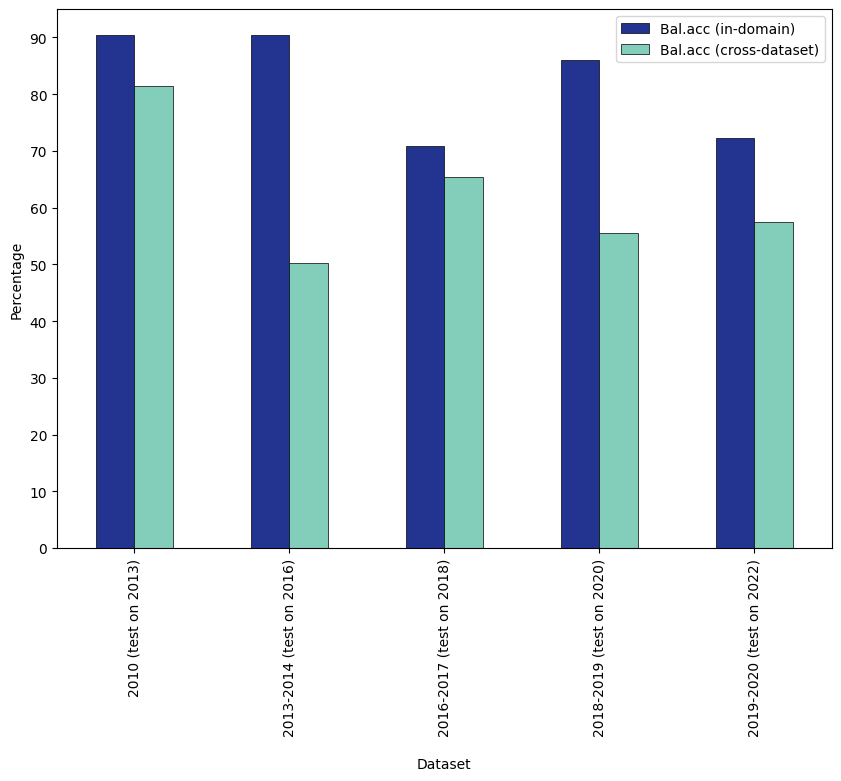

In [410]:
# Data
bal_acc_cross_ex2 = [round(val*100, 2) for val in [balanced_acc_pred_2013, balanced_acc_pred_2016,
                                                   balanced_acc_pred_2018, balanced_acc_pred_2020,
                                                   balanced_acc_pred_2022]]

bal_acc_indomain_ex2 = [round(val*100, 2) for val in [balanced_acc_2010, balanced_acc_2013_2014,
                                                   balanced_acc_2016_2017, balanced_acc_2018_2019,
                                                   balanced_acc_2019_2020]]

data_indomain_cross_ex2 = {
    'Dataset': ['2010 (test on 2013)', '2013-2014 (test on 2016)',
                '2016-2017 (test on 2018)', '2018-2019 (test on 2020)', '2019-2020 (test on 2022)'],
    'Bal.acc (in-domain)': bal_acc_indomain_ex2,
    'Bal.acc (cross-dataset)': bal_acc_cross_ex2
}

custom_colors = ['#233390', '#83CEBB']

# Create a DataFrame from the dictionary
df_ex2 = pd.DataFrame(data_indomain_cross_ex2)

# Set the 'Dataset' column as the x-axis (index) for the bar chart
df_ex2.set_index('Dataset', inplace=True)

# Plotting the bar chart
ax = df_ex2.plot(kind='bar', figsize=(10, 7), color=custom_colors, edgecolor='black', linewidth=0.5)
ax.set_ylabel('Percentage')
ax.set_xlabel('Dataset')

# Set x-label rotation to 0 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.labelpad = 15

y_ticks = np.arange(0, 100, 10)
ax.set_yticks(y_ticks)
#ax = plt.gca()
# Showing the plot
plt.show()

In [411]:
print(balanced_acc_2010)
print(balanced_acc_2013_2014)
print(balanced_acc_2016_2017)
print(balanced_acc_2018_2019)
print(balanced_acc_2019_2020)

0.9046884640610029
0.9033613445378151
0.7079243243243243
0.860782837335535
0.7231457800511509


#EXPERIMENT: Growing Intervals
Training Data: Starts from the first year and consistently grows by including each subsequent year.

Testing Data: The next unseen year after the training data.

Rationale: Investigates the effect of accumulating more and more historical data on predictive performance. It checks if having more data always benefits the model or if there's a point of diminishing returns.

Example: Train on 2009 and test on 2010, then train on 2009-2010 and test on 2011, and so on.

##Cycle 1
- train on merged 2010 (caverlee-2011 and yang-2013)
- test on 2013 (cresci-2015)

Since this data is avilable from the previous experiment, only the performance metrics are reported.

### Predict 2013

In-domain

In [412]:
print(balanced_acc_2010)

0.9046884640610029


Cross-dataset

In [413]:
print(balanced_acc_pred_2013)
print(f1_2013)

0.8149688956224319
0.9003119490031195


###Feature importance 2010

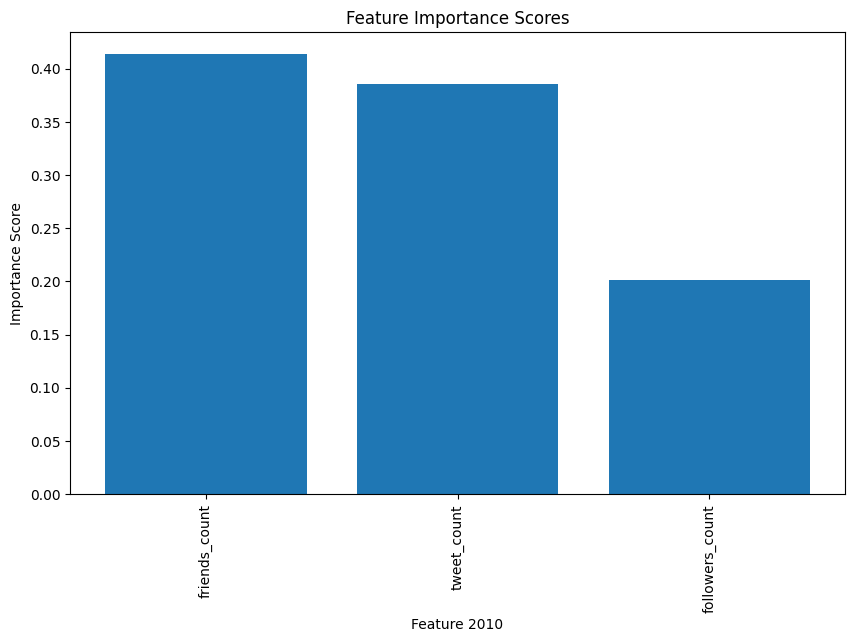

In [414]:
# Get feature importances
importances_2010 = model_2010.feature_importances_

# Sort feature importances in descending order
sorted_indices_2010_2013 = np.argsort(importances_2010)[::-1]

# Get feature names (if available) to label the plot
feature_names_2010 =  X_train_2010.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2010.shape[1]), importances_2010[sorted_indices_2010_2013], align="center")
plt.xticks(range(X_train_2010.shape[1]), [feature_names_2010[i] for i in sorted_indices_2010_2013], rotation=90)
plt.xlabel("Feature 2010")
plt.ylabel("Importance Score")
plt.title("Feature Importance Scores")
plt.show()

###Probability Distributions

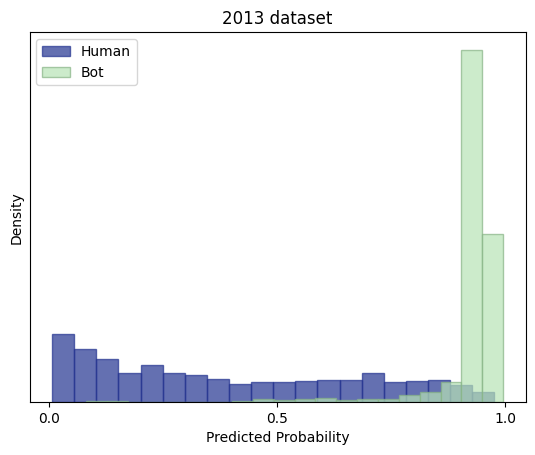

In [415]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2013_prob[y_cresci_2015 == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390', density=True)

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2013_prob[y_cresci_2015 == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385', density=True)

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2013 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

## Cycle 2
- train on merged 2010 (caverlee-2011 and yang-2013) and 2013 (cresci-2015)
- test on 2014 (cresci-2017)

### Merge datasets

In [416]:
X_train_2010_2013_exgi = pd.concat([X_train_2010, X_train_cresci_2015], axis=0)
y_train_2010_2013_exgi = pd.concat([y_train_2010, y_train_cresci_2015], axis=0)

X_val_2010_2013_exgi = pd.concat([X_val_2010, X_val_cresci_2015], axis=0)
y_val_2010_2013_exgi = pd.concat([y_val_2010, y_val_cresci_2015], axis=0)

X_test_2010_2013_exgi = pd.concat([X_test_2010, X_test_cresci_2015], axis=0)
y_test_2010_2013_exgi = pd.concat([y_test_2010, y_test_cresci_2015], axis=0)

X_train_2010_2013_exgi.drop(columns=['listed_count'], inplace=True)
X_val_2010_2013_exgi.drop(columns=['listed_count'], inplace=True)
X_test_2010_2013_exgi.drop(columns=['listed_count'], inplace=True)

# Print the shapes of the merged datasets
print("Merged Training Set:", X_train_2010_2013_exgi.shape)
print("Merged Validation Set:", X_val_2010_2013_exgi.shape)
print("Merged Test Set:", X_test_2010_2013_exgi.shape)

Merged Training Set: (39360, 3)
Merged Validation Set: (8435, 3)
Merged Test Set: (8436, 3)


### Train the model

In [417]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_2010_2013_exgi = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_2010_2013_exgi.fit(X_train_2010_2013_exgi, y_train_2010_2013_exgi)

# Predict on the validation set
y_val_pred_2010_2013_exgi = baseline_model_2010_2013_exgi.predict(X_val_2010_2013_exgi)

# Calculate balanced accuracy
balanced_acc_baseline_2010_2013_exgi = balanced_accuracy_score(y_val_2010_2013_exgi, y_val_pred_2010_2013_exgi)

# Calculate F1 score
f1_baseline_2010_2013_exgi = f1_score(y_val_2010_2013_exgi, y_val_pred_2010_2013_exgi)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_2010_2013_exgi:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_2010_2013_exgi:.2f}')

Balanced accuracy on the validation set: 0.89
F1 Score on the validation set: 0.88


In [418]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_2010_2013_exgi, y_train_2010_2013_exgi)

# Get the best hyperparameters
#best_params_2010_2013_exgi = grid_search.best_params_
best_params_2010_2013_exgi = {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 300}
print(f"Best param:", best_params_2010_2013_exgi)

Best param: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 300}


In [419]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_2010_2013_exgi = RandomForestClassifier(random_state=42, **best_params_2010_2013_exgi)

# Train the model on the entire training dataset
optimized_model_2010_2013_exgi.fit(X_train_2010_2013_exgi, y_train_2010_2013_exgi)

# Make predictions on the test set
y_val_pred_2010_2013_exgi_op = optimized_model_2010_2013_exgi.predict(X_val_2010_2013_exgi)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_2010_2013_exgi = balanced_accuracy_score(y_val_2010_2013_exgi, y_val_pred_2010_2013_exgi_op)

# Calculate F1 score
f1_op_2010_2013_exgi = f1_score(y_val_2010_2013_exgi, y_val_pred_2010_2013_exgi_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_2010_2013_exgi:.2f}')
print(f'F1 Score on the test set: {f1_op_2010_2013_exgi:.2f}')

Balanced accuracy on the test set: 0.90
F1 Score on the test set: 0.89


In [420]:
# Save the model
if balanced_acc_baseline_2010_2013_exgi < balanced_acc_op_2010_2013_exgi:
    joblib.dump(optimized_model_2010_2013_exgi, 'rf_2010_2013_exgi.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_2010_2013_exgi == balanced_acc_op_2010_2013_exgi and f1_baseline_2010_2013_exgi < f1_op_2010_2013_exgi:
    joblib.dump(optimized_model_2010_2013_exgi, 'rf_2010_2013_exgi.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_2010_2013_exgi, 'rf_2010_2013_exgi.pkl')
    print('Saved model: baseline')

Saved model: optimized


### Predict 2014

In-domain

In [421]:
# Predict subsequent year
model_2010_2013_exgi = joblib.load('rf_2010_2013_exgi.pkl')

# Predict gilani
y_test_pred_2010_2013_exgi = model_2010_2013_exgi.predict(X_test_2010_2013_exgi)
y_test_pred_2010_2013_prob_exgi = model_2010_2013_exgi.predict_proba(X_test_2010_2013_exgi)[:, 1]
balanced_acc_2010_2013_exgi = balanced_accuracy_score(y_test_2010_2013_exgi, y_test_pred_2010_2013_exgi)
balanced_acc_2010_2013_exgi

0.9025367854914357

Cross-dataset

In [422]:
# Predict subsequent year
model_2010_2013_exgi = joblib.load('rf_2010_2013_exgi.pkl')

# Predict gilani
y_pred_2014_exgi = model_2010_2013_exgi.predict(X_cresci_2017_fft)
y_pred_2014_prob_exgi = model_2010_2013_exgi.predict_proba(X_cresci_2017_fft)[:, 1]
balanced_acc_pred_2014_exgi = balanced_accuracy_score(y_cresci_2017, y_pred_2014_exgi)
f1_2014_exgi = f1_score(y_cresci_2017, y_pred_2014_exgi)
balanced_acc_pred_2014_exgi

0.7436323656783157

###Feature importance 2010-2013

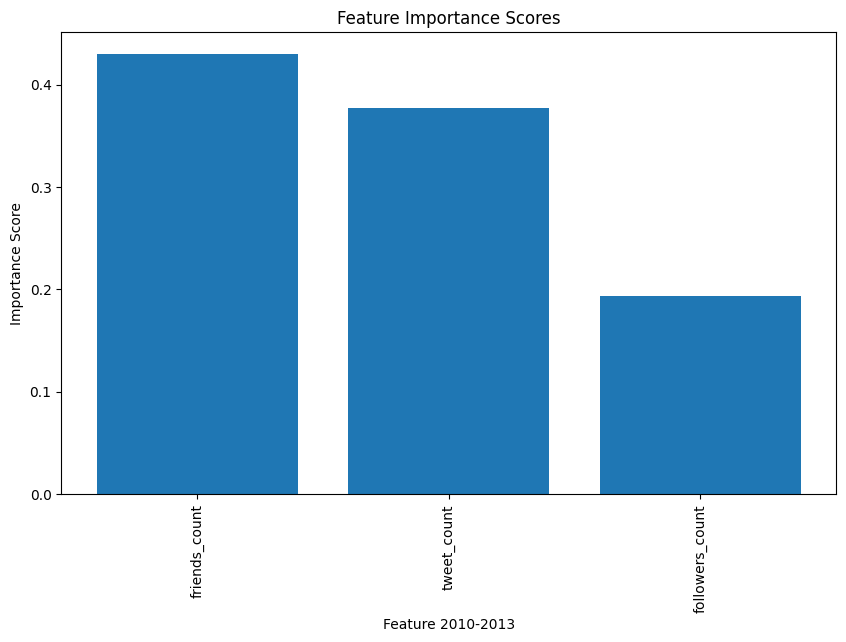

In [423]:
# Get feature importances
importances_2010_2013_exgi = model_2010_2013_exgi.feature_importances_

# Sort feature importances in descending order
sorted_indices_2010_2013_exgi = np.argsort(importances_2010_2013_exgi)[::-1]

# Get feature names (if available) to label the plot
feature_names_2010_2013_exgi =  X_train_2010_2013_exgi.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2010_2013_exgi.shape[1]), importances_2010_2013_exgi[sorted_indices_2010_2013_exgi], align="center")
plt.xticks(range(X_train_2010_2013_exgi.shape[1]), [feature_names_2010_2013_exgi[i] for i in sorted_indices_2010_2013_exgi], rotation=90)
plt.xlabel("Feature 2010-2013")
plt.ylabel("Importance Score")
plt.title("Feature Importance Scores")
plt.show()

###Probability Distributions

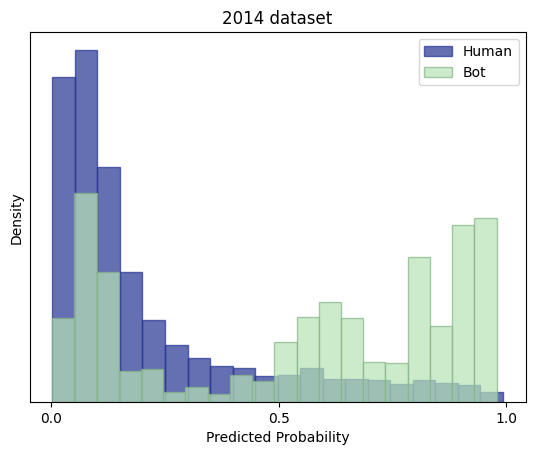

In [424]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2014_prob_exgi[y_cresci_2017 == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390', density=True)

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2014_prob_exgi[y_cresci_2017 == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385', density=True)

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2014 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

## Cycle 3
- train on merged 2010 (caverlee-2011 and yang-2013),  2013 (cresci-2015) and 2014 (cresci-2017)
- test on 2016 (gilani-2017)

### Merge datasets

In [425]:
X_train_2010_2014_exgi = pd.concat([X_train_2010_2013_exgi, X_train_cresci_2017], axis=0)
y_train_2010_2014_exgi = pd.concat([y_train_2010_2013_exgi, y_train_cresci_2017], axis=0)

X_val_2010_2014_exgi = pd.concat([X_val_2010_2013_exgi, X_val_cresci_2017], axis=0)
y_val_2010_2014_exgi = pd.concat([y_val_2010_2013_exgi, y_val_cresci_2017], axis=0)

X_test_2010_2014_exgi = pd.concat([X_test_2010_2013_exgi, X_test_cresci_2017], axis=0)
y_test_2010_2014_exgi = pd.concat([y_test_2010_2013_exgi, y_test_cresci_2017], axis=0)

X_train_2010_2014_exgi.drop(columns=['tweet_count', 'listed_count'], inplace=True)
X_val_2010_2014_exgi.drop(columns=['tweet_count', 'listed_count'], inplace=True)
X_test_2010_2014_exgi.drop(columns=['tweet_count', 'listed_count'], inplace=True)

# Print the shapes of the merged datasets
print("Merged Training Set:", X_train_2010_2014_exgi.shape)
print("Merged Validation Set:", X_val_2010_2014_exgi.shape)
print("Merged Test Set:", X_test_2010_2014_exgi.shape)


Merged Training Set: (46367, 2)
Merged Validation Set: (9937, 2)
Merged Test Set: (9938, 2)


### Train the model

In [426]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_2010_2014_exgi = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_2010_2014_exgi.fit(X_train_2010_2014_exgi, y_train_2010_2014_exgi)

# Predict on the validation set
y_val_pred_2010_2014_exgi = baseline_model_2010_2014_exgi.predict(X_val_2010_2014_exgi)

# Calculate balanced accuracy
balanced_acc_baseline_2010_2014_exgi = balanced_accuracy_score(y_val_2010_2014_exgi, y_val_pred_2010_2014_exgi)

# Calculate F1 score
f1_baseline_2010_2014_exgi = f1_score(y_val_2010_2014_exgi, y_val_pred_2010_2014_exgi)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_2010_2014_exgi:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_2010_2014_exgi:.2f}')

Balanced accuracy on the validation set: 0.76
F1 Score on the validation set: 0.75


In [427]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_2010_2014_exgi, y_train_2010_2014_exgi)

# Get the best hyperparameters
# best_params_2010_2014_exgi = grid_search.best_params_
best_params_2010_2014_exgi = {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 200}
print(f"Best param:", best_params_2010_2014_exgi)

Best param: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 200}


In [428]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_2010_2014_exgi = RandomForestClassifier(random_state=42, **best_params_2010_2014_exgi)

# Train the model on the entire training dataset
optimized_model_2010_2014_exgi.fit(X_train_2010_2014_exgi, y_train_2010_2014_exgi)

# Make predictions on the test set
y_val_pred_2010_2014_exgi_op = optimized_model_2010_2014_exgi.predict(X_val_2010_2014_exgi)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_2010_2014_exgi = balanced_accuracy_score(y_val_2010_2014_exgi, y_val_pred_2010_2014_exgi_op)

# Calculate F1 score
f1_op_2010_2014_exgi = f1_score(y_val_2010_2014_exgi, y_val_pred_2010_2014_exgi_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_2010_2014_exgi:.2f}')
print(f'F1 Score on the test set: {f1_op_2010_2014_exgi:.2f}')

Balanced accuracy on the test set: 0.78
F1 Score on the test set: 0.77


In [429]:
# Save the model
if balanced_acc_baseline_2010_2014_exgi < balanced_acc_op_2010_2014_exgi:
    joblib.dump(optimized_model_2010_2014_exgi, 'rf_2010_2014_exgi.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_2010_2014_exgi == balanced_acc_op_2010_2014_exgi and f1_baseline_2010_2014_exgi < f1_op_2010_2014_exgi:
    joblib.dump(optimized_model_2010_2014_exgi, 'rf_2010_2014_exgi.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_2010_2014_exgi, 'rf_2010_2014_exgi.pkl')
    print('Saved model: baseline')

Saved model: optimized


### Predict 2016

In-domain

In [430]:
# Predict subsequent year
model_2010_2014_exgi = joblib.load('rf_2010_2014_exgi.pkl')

# Predict gilani
y_test_pred_2010_2014_exgi = model_2010_2014_exgi.predict(X_test_2010_2014_exgi)
y_test_pred_2010_2014_prob_exgi = model_2010_2014_exgi.predict_proba(X_test_2010_2014_exgi)[:, 1]
balanced_acc_2010_2014_exgi = balanced_accuracy_score(y_test_2010_2014_exgi, y_test_pred_2010_2014_exgi)
balanced_acc_2010_2014_exgi

0.7756905238373989

Cross-dataset

In [431]:
# Predict subsequent year
model_2010_2014_exgi = joblib.load('rf_2010_2014_exgi.pkl')

# Predict gilani
y_pred_2016_exgi = model_2010_2014_exgi.predict(X_gilani_ff)
y_pred_2016_prob_exgi = model_2010_2014_exgi.predict_proba(X_gilani_ff)[:, 1]
balanced_acc_pred_2016_exgi = balanced_accuracy_score(y_gilani_2017, y_pred_2016_exgi)
f1_2016_exgi = f1_score(y_gilani_2017, y_pred_2016_exgi)
balanced_acc_pred_2016_exgi

0.5230608885481574

###Feature importance 2010-2014

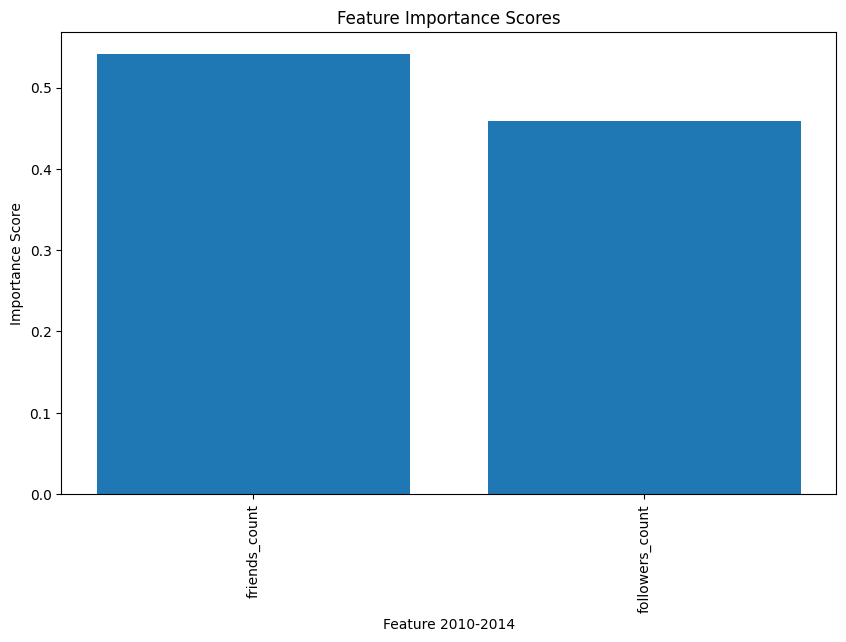

In [432]:
# Get feature importances
importances_2010_2014_exgi = model_2010_2014_exgi.feature_importances_

# Sort feature importances in descending order
sorted_indices_2010_2014_exgi = np.argsort(importances_2010_2014_exgi)[::-1]

# Get feature names (if available) to label the plot
feature_names_2010_2014_exgi =  X_train_2010_2014_exgi.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2010_2014_exgi.shape[1]), importances_2010_2014_exgi[sorted_indices_2010_2014_exgi], align="center")
plt.xticks(range(X_train_2010_2014_exgi.shape[1]), [feature_names_2010_2014_exgi[i] for i in sorted_indices_2010_2014_exgi], rotation=90)
plt.xlabel("Feature 2010-2014")
plt.ylabel("Importance Score")
plt.title("Feature Importance Scores")
plt.show()

###Probability Distributions

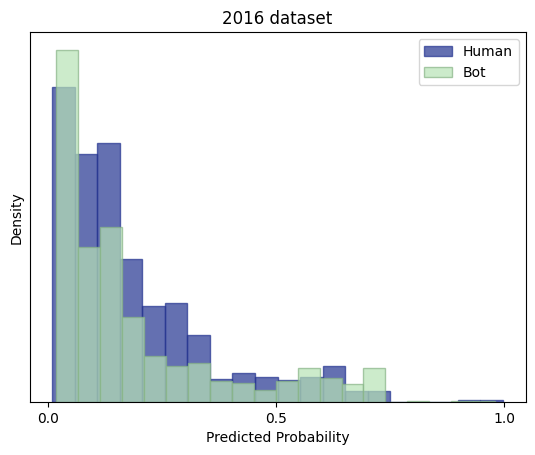

In [433]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2016_prob_exgi[y_gilani_2017 == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390')

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2016_prob_exgi[y_gilani_2017 == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385')

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2016 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

## Cycle 4
- train on merged 2010 (caverlee-2011 and yang-2013),  2013 (cresci-2015), 2014 (cresci-2017) and 2016 (gilani_2017)
- test on 2017 (stock-2018)

### Merge datasets

In [434]:
X_train_2010_2016_exgi = pd.concat([X_train_2010_2014_exgi, X_train_gilani_2017], axis=0)
y_train_2010_2016_exgi = pd.concat([y_train_2010_2014_exgi, y_train_gilani_2017], axis=0)

X_val_2010_2016_exgi = pd.concat([X_val_2010_2014_exgi, X_val_gilani_2017], axis=0)
y_val_2010_2016_exgi = pd.concat([y_val_2010_2014_exgi, y_val_gilani_2017], axis=0)

X_test_2010_2016_exgi = pd.concat([X_test_2010_2014_exgi, X_test_gilani_2017], axis=0)
y_test_2010_2016_exgi = pd.concat([y_test_2010_2014_exgi, y_test_gilani_2017], axis=0)

X_train_2010_2016_exgi.drop(columns=['listed_count'], inplace=True)
X_val_2010_2016_exgi.drop(columns=['listed_count'], inplace=True)
X_test_2010_2016_exgi.drop(columns=['listed_count'], inplace=True)

# Print the shapes of the merged datasets
print("Merged Training Set:", X_train_2010_2016_exgi.shape)
print("Merged Validation Set:", X_val_2010_2016_exgi.shape)
print("Merged Test Set:", X_test_2010_2016_exgi.shape)


Merged Training Set: (48081, 2)
Merged Validation Set: (10304, 2)
Merged Test Set: (10306, 2)


### Train the model

In [435]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_2010_2016_exgi = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_2010_2016_exgi.fit(X_train_2010_2016_exgi, y_train_2010_2016_exgi)

# Predict on the validation set
y_val_pred_2010_2016_exgi = baseline_model_2010_2016_exgi.predict(X_val_2010_2016_exgi)

# Calculate balanced accuracy
balanced_acc_baseline_2010_2016_exgi = balanced_accuracy_score(y_val_2010_2016_exgi, y_val_pred_2010_2016_exgi)

# Calculate F1 score
f1_baseline_2010_2016_exgi = f1_score(y_val_2010_2016_exgi, y_val_pred_2010_2016_exgi)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_2010_2016_exgi:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_2010_2016_exgi:.2f}')

Balanced accuracy on the validation set: 0.74
F1 Score on the validation set: 0.73


In [436]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_2010_2016_exgi, y_train_2010_2016_exgi)

# Get the best hyperparameters
#best_params_2010_2016_exgi = grid_search.best_params_
best_params_2010_2016_exgi = {'max_depth': 15, 'min_samples_split': 20, 'n_estimators': 100}
print(f"Best param:", best_params_2010_2016_exgi)

Best param: {'max_depth': 15, 'min_samples_split': 20, 'n_estimators': 100}


In [437]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_2010_2016_exgi = RandomForestClassifier(random_state=42, **best_params_2010_2016_exgi)

# Train the model on the entire training dataset
optimized_model_2010_2016_exgi.fit(X_train_2010_2016_exgi, y_train_2010_2016_exgi)

# Make predictions on the test set
y_val_pred_2010_2016_exgi_op = optimized_model_2010_2016_exgi.predict(X_val_2010_2016_exgi)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_2010_2016_exgi = balanced_accuracy_score(y_val_2010_2016_exgi, y_val_pred_2010_2016_exgi_op)

# Calculate F1 score
f1_op_2010_2016_exgi = f1_score(y_val_2010_2016_exgi, y_val_pred_2010_2016_exgi_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_2010_2016_exgi:.2f}')
print(f'F1 Score on the test set: {f1_op_2010_2016_exgi:.2f}')

Balanced accuracy on the test set: 0.77
F1 Score on the test set: 0.76


In [438]:
# Save the model
if balanced_acc_baseline_2010_2016_exgi < balanced_acc_op_2010_2016_exgi:
    joblib.dump(optimized_model_2010_2016_exgi, 'rf_2010_2016_exgi.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_2010_2016_exgi == balanced_acc_op_2010_2016_exgi and f1_baseline_2010_2016_exgi < f1_op_2010_2016_exgi:
    joblib.dump(optimized_model_2010_2016_exgi, 'rf_2010_2016_exgi.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_2010_2016_exgi, 'rf_2010_2016_exgi.pkl')
    print('Saved model: baseline')

Saved model: optimized


### Predict 2017

In-domain

In [439]:
# Predict subsequent year
model_2010_2016_exgi = joblib.load('rf_2010_2016_exgi.pkl')

# Predict gilani
y_test_pred_2010_2016_exgi = model_2010_2016_exgi.predict(X_test_2010_2016_exgi)
y_test_pred_2019_2016_prob_exgi = model_2010_2016_exgi.predict_proba(X_test_2010_2016_exgi)[:, 1]
balanced_acc_2010_2016_exgi = balanced_accuracy_score(y_test_2010_2016_exgi, y_test_pred_2010_2016_exgi)
balanced_acc_2010_2016_exgi

0.7684438623581076

Cross-dataset

In [440]:
# Predict subsequent year
model_2010_2016_exgi = joblib.load('rf_2010_2016_exgi.pkl')

# Predict gilani
y_pred_stock_2017_exgi = model_2010_2016_exgi.predict(X_stock_ff)
y_pred_2017_prob_exgi = model_2010_2016_exgi.predict_proba(X_stock_ff)[:, 1]
balanced_acc_pred_2017_exgi = balanced_accuracy_score(y_stock_2018, y_pred_stock_2017_exgi)
f1_2017_exgi = f1_score(y_stock_2018, y_pred_stock_2017_exgi)
balanced_acc_pred_2017_exgi

0.49086859141483064

###Feature importance 2010-2016

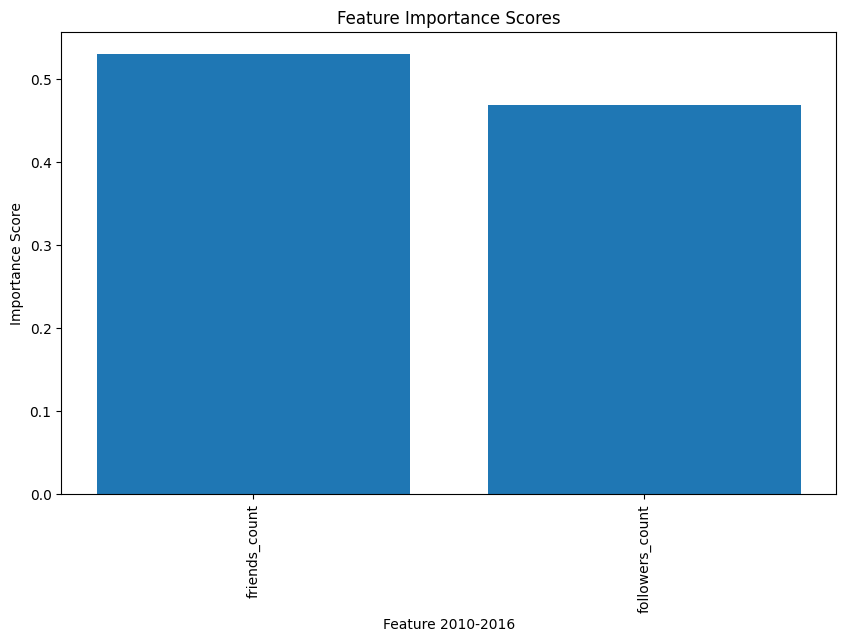

In [441]:
# Get feature importances
importances_2010_2016_exgi = model_2010_2016_exgi.feature_importances_

# Sort feature importances in descending order
sorted_indices_2010_2016_exgi = np.argsort(importances_2010_2016_exgi)[::-1]

# Get feature names (if available) to label the plot
feature_names_2010_2016_exgi =  X_train_2010_2016_exgi.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2010_2016_exgi.shape[1]), importances_2010_2016_exgi[sorted_indices_2010_2016_exgi], align="center")
plt.xticks(range(X_train_2010_2016_exgi.shape[1]), [feature_names_2010_2016_exgi[i] for i in sorted_indices_2010_2016_exgi], rotation=90)
plt.xlabel("Feature 2010-2016")
plt.ylabel("Importance Score")
plt.title("Feature Importance Scores")
plt.show()

###Probability Distributions

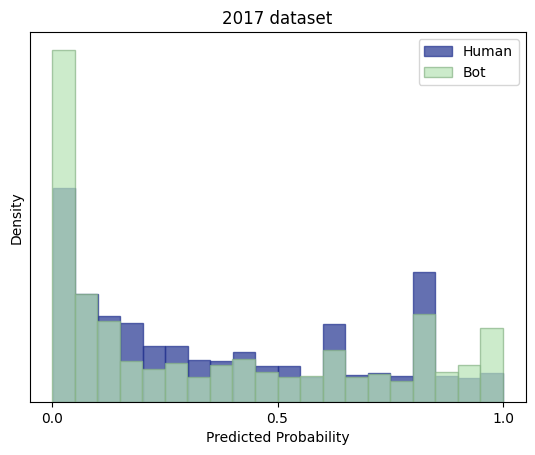

In [442]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2017_prob_exgi[y_stock_2018 == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390', density=True)

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2017_prob_exgi[y_stock_2018 == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385', density=True)

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2017 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

## Cycle 5
- train on merged 2010 (caverlee-2011 and yang-2013),  2013 (cresci-2015), 2014 (cresci-2017), 2016 (gilani_2017) and 2017 (stock_2018)
- test on merged 2018 (rtbust-2019 and midterm-2018)

### Merge datasets

In [443]:
# Merge datasets
X_train_2010_2017_exgi = pd.concat([X_train_2010_2016_exgi, X_train_stock_2018], axis=0)
y_train_2010_2017_exgi = pd.concat([y_train_2010_2016_exgi, y_train_stock_2018], axis=0)

X_val_2010_2017_exgi = pd.concat([X_val_2010_2016_exgi, X_val_stock_2018], axis=0)
y_val_2010_2017_exgi = pd.concat([y_val_2010_2016_exgi, y_val_stock_2018], axis=0)

X_test_2010_2017_exgi = pd.concat([X_test_2010_2016_exgi, X_test_stock_2018], axis=0)
y_test_2010_2017_exgi = pd.concat([y_test_2010_2016_exgi, y_test_stock_2018], axis=0)

# Drop columns
X_train_2010_2017_exgi.drop(columns=['listed_count'], inplace=True)
X_val_2010_2017_exgi.drop(columns=['listed_count'], inplace=True)
X_test_2010_2017_exgi.drop(columns=['listed_count'], inplace=True)

# Print the shapes of the merged datasets
print("Merged Training Set:", X_train_2010_2017_exgi.shape)
print("Merged Validation Set:", X_val_2010_2017_exgi.shape)
print("Merged Test Set:", X_test_2010_2017_exgi.shape)

Merged Training Set: (57372, 2)
Merged Validation Set: (12295, 2)
Merged Test Set: (12298, 2)


### Train the model

In [444]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_2010_2017_exgi = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_2010_2017_exgi.fit(X_train_2010_2017_exgi, y_train_2010_2017_exgi)

# Predict on the validation set
y_val_pred_2010_2017_exgi = baseline_model_2010_2017_exgi.predict(X_val_2010_2017_exgi)

# Calculate balanced accuracy
balanced_acc_baseline_2010_2017_exgi = balanced_accuracy_score(y_val_2010_2017_exgi, y_val_pred_2010_2017_exgi)

# Calculate F1 score
f1_baseline_2010_2017_exgi = f1_score(y_val_2010_2017_exgi, y_val_pred_2010_2017_exgi)


# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_2010_2017_exgi:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_2010_2017_exgi:.2f}')

Balanced accuracy on the validation set: 0.70
F1 Score on the validation set: 0.70


In [445]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_2010_2017_exgi, y_train_2010_2017_exgi)

# Get the best hyperparameters
#best_params_2010_2017_exgi = grid_search.best_params_
best_params_2010_2017_exgi = {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
print(f"Best param:", best_params_2010_2017_exgi)

Best param: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [446]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_2010_2017_exgi = RandomForestClassifier(random_state=42, **best_params_2010_2017_exgi)

# Train the model on the entire training dataset
optimized_model_2010_2017_exgi.fit(X_train_2010_2017_exgi, y_train_2010_2017_exgi)

# Make predictions on the test set
y_val_pred_2010_2017_exgi_op = optimized_model_2010_2017_exgi.predict(X_val_2010_2017_exgi)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_2010_2017_exgi = balanced_accuracy_score(y_val_2010_2017_exgi, y_val_pred_2010_2017_exgi_op)

# Calculate F1 score
f1_op_2010_2017_exgi = f1_score(y_val_2010_2017_exgi, y_val_pred_2010_2017_exgi_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_2010_2017_exgi:.2f}')
print(f'F1 Score on the test set: {f1_op_2010_2017_exgi:.2f}')

Balanced accuracy on the test set: 0.74
F1 Score on the test set: 0.72


In [447]:
# Save the model
if balanced_acc_baseline_2010_2017_exgi < balanced_acc_op_2010_2017_exgi:
    joblib.dump(optimized_model_2010_2017_exgi, 'rf_2010_2017_exgi.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_2010_2017_exgi == balanced_acc_op_2010_2017_exgi and f1_baseline_2010_2017_exgi < f1_op_2010_2017_exgi:
    joblib.dump(optimized_model_2010_2017_exgi, 'rf_2010_2017_exgi.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_2010_2017_exgi, 'rf_2010_2017_exgi.pkl')
    print('Saved model: baseline')

Saved model: optimized


### Predict 2018

In-domain

In [448]:
model_2010_2017_exgi = joblib.load('rf_2010_2017_exgi.pkl')

y_test_pred_2010_2017_exgi = model_2010_2017_exgi.predict(X_test_2010_2017_exgi)
y_test_pred_2010__2017_prob_exgi = model_2010_2016_exgi.predict_proba(X_test_2010_2017_exgi)[:, 1]
balanced_acc_2010_2017_exgi = balanced_accuracy_score(y_test_2010_2017_exgi, y_test_pred_2010_2017_exgi)
balanced_acc_2010_2017_exgi

0.730754928288869

Cross-dataset

In [449]:
X_2018_exgi = pd.concat([X_midterm_2018, X_rtbust_2019], axis=0)
y_2018_exgi = pd.concat([y_midterm_2018, y_rtbust_2019], axis=0)
X_2018_exgi.drop(columns=['listed_count'], inplace=True)

model_2010_2017_exgi = joblib.load('rf_2010_2017_exgi.pkl')

y_pred_2018_exgi = model_2010_2017_exgi.predict(X_2018_exgi)
y_pred_2018_prob_exgi = model_2010_2016_exgi.predict_proba(X_2018_exgi)[:, 1]
balanced_acc_pred_2018_exgi = balanced_accuracy_score(y_2018_exgi, y_pred_2018_exgi)
f1_2018_exgi = f1_score(y_2018_exgi, y_pred_2018_exgi)
balanced_acc_pred_2018_exgi

0.7327449031446205

###Feature importance 2010-2017

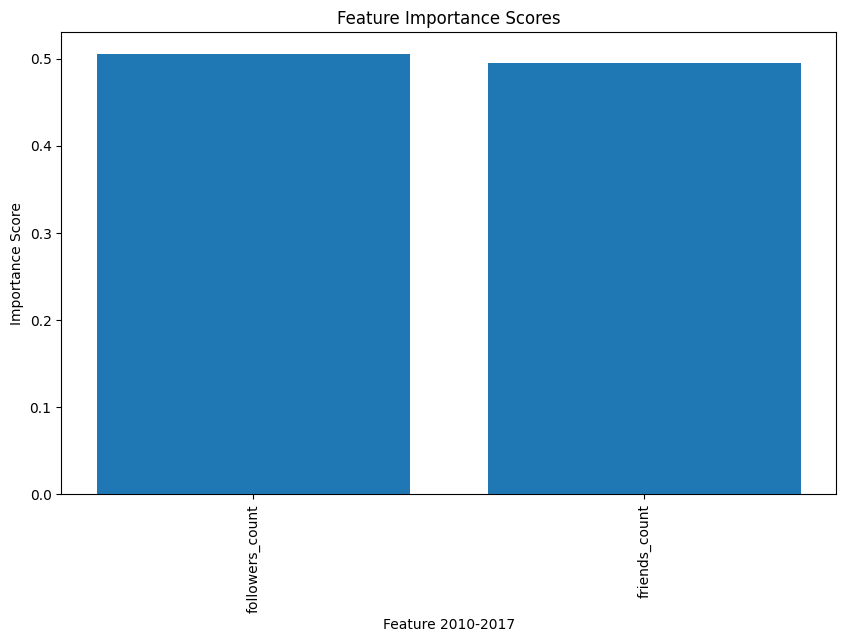

In [450]:
# Get feature importances
importances_2010_2017_exgi = model_2010_2017_exgi.feature_importances_

# Sort feature importances in descending order
sorted_indices_2010_2017_exgi = np.argsort(importances_2010_2017_exgi)[::-1]

# Get feature names (if available) to label the plot
feature_names_2010_2017_exgi =  X_train_2010_2017_exgi.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2010_2017_exgi.shape[1]), importances_2010_2017_exgi[sorted_indices_2010_2017_exgi], align="center")
plt.xticks(range(X_train_2010_2017_exgi.shape[1]), [feature_names_2010_2017_exgi[i] for i in sorted_indices_2010_2017_exgi], rotation=90)
plt.xlabel("Feature 2010-2017")
plt.ylabel("Importance Score")
plt.title("Feature Importance Scores")
plt.show()

###Probability Distributions

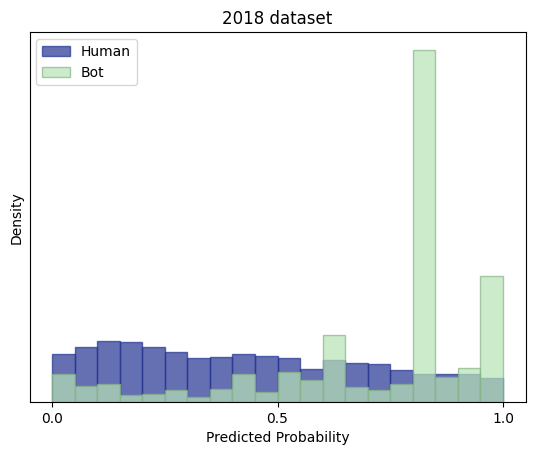

In [451]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2018_prob_exgi[y_2018_exgi == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390', density=True)

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2018_prob_exgi[y_2018_exgi == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385', density=True)

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2018 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

## Cycle 6
- train on merged 2010 (caverlee-2011 and yang-2013),  2013 (cresci-2015), 2014 (cresci-2017), 2016 (gilani_2017), 2017 (stock_2018) and 2018 (rtbust-2019 and midterm-2018)
- test on 2019 (feedback_2019)

### Merge datasets

In [452]:
X_train_2010_2018_exgi = pd.concat([X_train_2010_2017_exgi, X_train_midterm_2018, X_train_rtbust_2019], axis=0)
y_train_2010_2018_exgi = pd.concat([y_train_2010_2017_exgi, y_train_midterm_2018, y_train_rtbust_2019], axis=0)

X_val_2010_2018_exgi = pd.concat([X_val_2010_2017_exgi, X_val_midterm_2018, X_val_rtbust_2019], axis=0)
y_val_2010_2018_exgi = pd.concat([y_val_2010_2017_exgi, y_val_midterm_2018, y_val_rtbust_2019], axis=0)

X_test_2010_2018_exgi = pd.concat([X_test_2010_2017_exgi, X_test_midterm_2018, X_test_rtbust_2019], axis=0)
y_test_2010_2018_exgi = pd.concat([y_test_2010_2017_exgi, y_test_midterm_2018, y_test_rtbust_2019], axis=0)

X_train_2010_2018_exgi.drop(columns=['listed_count'], inplace=True)
X_val_2010_2018_exgi.drop(columns=['listed_count'], inplace=True)
X_test_2010_2018_exgi.drop(columns=['listed_count'], inplace=True)

# Print the shapes of the merged datasets
print("Merged Training Set:", X_train_2010_2018_exgi.shape)
print("Merged Validation Set:", X_val_2010_2018_exgi.shape)
print("Merged Test Set:", X_test_2010_2018_exgi.shape)

Merged Training Set: (93228, 2)
Merged Validation Set: (19978, 2)
Merged Test Set: (19982, 2)


### Train the model

In [453]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_2010_2018_exgi = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_2010_2018_exgi.fit(X_train_2010_2018_exgi, y_train_2010_2018_exgi)

# Predict on the validation set
y_val_pred_2010_2018_exgi = baseline_model_2010_2018_exgi.predict(X_val_2010_2018_exgi)

# Calculate balanced accuracy
balanced_acc_baseline_2010_2018_exgi = balanced_accuracy_score(y_val_2010_2018_exgi, y_val_pred_2010_2018_exgi)

# Calculate F1 score
f1_baseline_2010_2018_exgi = f1_score(y_val_2010_2018_exgi, y_val_pred_2010_2018_exgi)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_2010_2018_exgi:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_2010_2018_exgi:.2f}')

Balanced accuracy on the validation set: 0.75
F1 Score on the validation set: 0.81


In [454]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_2010_2018_exgi, y_train_2010_2018_exgi)

# Get the best hyperparameters
#best_params_2010_2018_exgi = grid_search.best_params_
best_params_2010_2018_exgi = {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 300}
print(f"Best param:", best_params_2010_2018_exgi)

Best param: {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 300}


In [455]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_2010_2018_exgi = RandomForestClassifier(random_state=42, **best_params_2010_2018_exgi)

# Train the model on the entire training dataset
optimized_model_2010_2018_exgi.fit(X_train_2010_2018_exgi, y_train_2010_2018_exgi)

# Make predictions on the test set
y_val_pred_2010_2018_exgi_op = optimized_model_2010_2018_exgi.predict(X_val_2010_2018_exgi)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_2010_2018_exgi = balanced_accuracy_score(y_val_2010_2018_exgi, y_val_pred_2010_2018_exgi_op)

# Calculate F1 score
f1_op_2010_2018_exgi = f1_score(y_val_2010_2018_exgi, y_val_pred_2010_2018_exgi_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_2010_2018_exgi:.2f}')
print(f'F1 Score on the test set: {f1_op_2010_2018_exgi:.2f}')

Balanced accuracy on the test set: 0.78
F1 Score on the test set: 0.81


In [456]:
# Save the model
if balanced_acc_baseline_2010_2018_exgi < balanced_acc_op_2010_2018_exgi:
    joblib.dump(optimized_model_2010_2018_exgi, 'rf_2010_2018_exgi.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_2010_2018_exgi == balanced_acc_op_2010_2018_exgi and f1_baseline_2010_2018_exgi < f1_op_2010_2018_exgi:
    joblib.dump(optimized_model_2010_2018_exgi, 'rf_2010_2018_exgi.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_2010_2018_exgi, 'rf_2010_2018_exgi.pkl')
    print('Saved model: baseline')

Saved model: optimized


### Predict 2019

In-domain

In [457]:
model_2010_2018_exgi = joblib.load('rf_2010_2018_exgi.pkl')

y_test_pred_2010_2018_exgi = model_2010_2018_exgi.predict(X_test_2010_2018_exgi)
y_test_pred_2010_2018_prob_exgi = model_2010_2018_exgi.predict_proba(X_test_2010_2018_exgi)[:, 1]
balanced_acc_2010_2018_exgi = balanced_accuracy_score(y_test_2010_2018_exgi, y_test_pred_2010_2018_exgi)
balanced_acc_2010_2018_exgi

0.7693752070545781

Cross-dataset

In [458]:
model_2010_2018_exgi = joblib.load('rf_2010_2018_exgi.pkl')

y_pred_2019_exgi = model_2010_2018_exgi.predict(X_feedback_2019_ff)
y_pred_2019_prob_exgi = model_2010_2018_exgi.predict_proba(X_feedback_2019_ff)[:, 1]
balanced_acc_pred_2019_exgi = balanced_accuracy_score(y_feedback_2019, y_pred_2019_exgi)
f1_2019_exgi = f1_score(y_feedback_2019, y_pred_2019_exgi)
balanced_acc_pred_2019_exgi

0.4757294738475865

###Feature importance 2010-2018

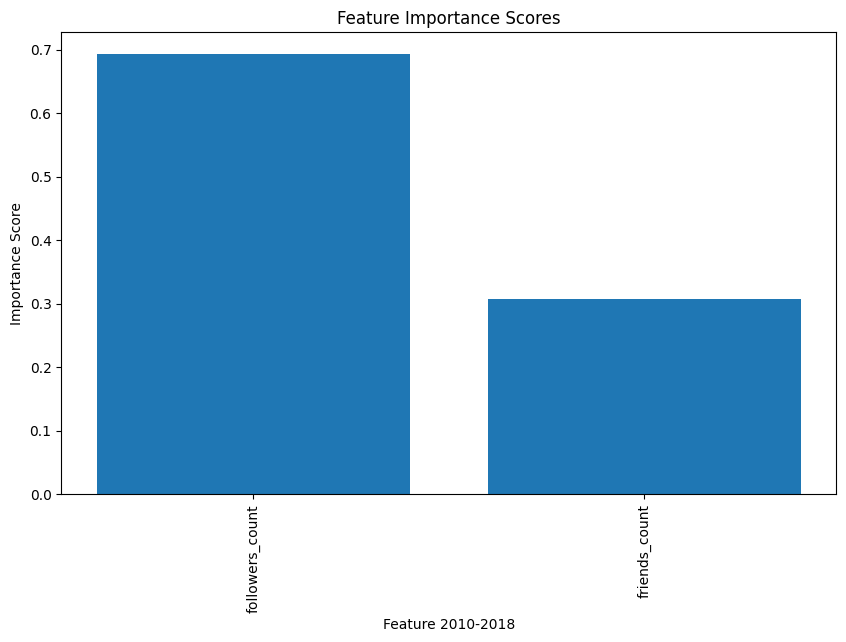

In [459]:
# Get feature importances
importances_2010_2018_exgi = model_2010_2018_exgi.feature_importances_

# Sort feature importances in descending order
sorted_indices_2010_2018_exgi = np.argsort(importances_2010_2018_exgi)[::-1]

# Get feature names (if available) to label the plot
feature_names_2010_2018_exgi =  X_train_2010_2018_exgi.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2010_2018_exgi.shape[1]), importances_2010_2018_exgi[sorted_indices_2010_2018_exgi], align="center")
plt.xticks(range(X_train_2010_2018_exgi.shape[1]), [feature_names_2010_2018_exgi[i] for i in sorted_indices_2010_2018_exgi], rotation=90)
plt.xlabel("Feature 2010-2018")
plt.ylabel("Importance Score")
plt.title("Feature Importance Scores")
plt.show()

###Probability Distributions

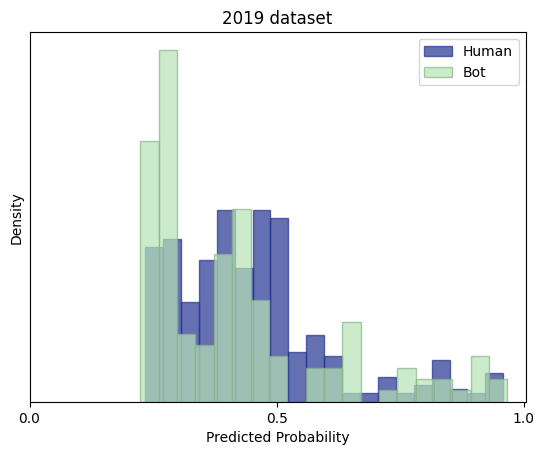

In [460]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2019_prob_exgi[y_feedback_2019 == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390', density=True)

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2019_prob_exgi[y_feedback_2019 == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385', density=True)

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2019 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

## Cycle 7
- train on merged 2010 (caverlee-2011 and yang-2013),  2013 (cresci-2015), 2014 (cresci-2017), 2016 (gilani_2017), 2017 (stock_2018), 2018 (rtbust-2019 and midterm-2018) and 2019 (feedback_2019)
- test on 2020 (twibot_20)

### Merge datasets

In [461]:
# Combine training data from 2010-2018 with feedback data from 2019
X_train_2010_2019_exgi = pd.concat([X_train_2010_2018_exgi, X_train_feedback_2019], axis=0)
y_train_2010_2019_exgi = pd.concat([y_train_2010_2018_exgi, y_train_feedback_2019], axis=0)

# Combine validation data from 2010-2018 with feedback data from 2019
X_val_2010_2019_exgi = pd.concat([X_val_2010_2018_exgi, X_val_feedback_2019], axis=0)
y_val_2010_2019_exgi = pd.concat([y_val_2010_2018_exgi, y_val_feedback_2019], axis=0)

# Combine test data from 2010-2018 with feedback data from 2019
X_test_2010_2019_exgi = pd.concat([X_test_2010_2018_exgi, X_test_feedback_2019], axis=0)
y_test_2010_2019_exgi = pd.concat([y_test_2010_2018_exgi, y_test_feedback_2019], axis=0)

# Drop the 'listed_count' column from all merged datasets
X_train_2010_2019_exgi.drop(columns=['listed_count'], inplace=True)
X_val_2010_2019_exgi.drop(columns=['listed_count'], inplace=True)
X_test_2010_2019_exgi.drop(columns=['listed_count'], inplace=True)

# Print the shapes of the merged datasets
print("Merged Training Set:", X_train_2010_2019_exgi.shape)
print("Merged Validation Set:", X_val_2010_2019_exgi.shape)
print("Merged Test Set:", X_test_2010_2019_exgi.shape)

Merged Training Set: (93588, 2)
Merged Validation Set: (20055, 2)
Merged Test Set: (20060, 2)


### Train the model

In [462]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_2010_2019_exgi = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_2010_2019_exgi.fit(X_train_2010_2019_exgi, y_train_2010_2019_exgi)

# Predict on the validation set
y_val_pred_2010_2019_exgi = baseline_model_2010_2019_exgi.predict(X_val_2010_2019_exgi)

# Calculate balanced accuracy
balanced_acc_baseline_2010_2019_exgi = balanced_accuracy_score(y_val_2010_2019_exgi, y_val_pred_2010_2019_exgi)

# Calculate F1 score
f1_baseline_2010_2019_exgi = f1_score(y_val_2010_2019_exgi, y_val_pred_2010_2019_exgi)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_2010_2019_exgi:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_2010_2019_exgi:.2f}')

Balanced accuracy on the validation set: 0.75
F1 Score on the validation set: 0.81


In [463]:
# Fit the HalvingGridSearchCV object to the data
# grid_search.fit(X_train_2010_2019_exgi, y_train_2010_2019_exgi)

# Get the best hyperparameters
#best_params_2010_2019_exgi = grid_search.best_params_
best_params_2010_2019_exgi = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
print(f"Best param:", best_params_2010_2019_exgi)

Best param: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [464]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_2010_2019_exgi = RandomForestClassifier(random_state=42, **best_params_2010_2019_exgi)

# Train the model on the entire training dataset
optimized_model_2010_2019_exgi.fit(X_train_2010_2019_exgi, y_train_2010_2019_exgi)

# Make predictions on the test set
y_val_pred_2010_2019_exgi_op = optimized_model_2010_2019_exgi.predict(X_val_2010_2019_exgi)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_2010_2019_exgi = balanced_accuracy_score(y_val_2010_2019_exgi, y_val_pred_2010_2019_exgi_op)

# Calculate F1 score
f1_op_2010_2019_exgi = f1_score(y_val_2010_2019_exgi, y_val_pred_2010_2019_exgi_op)


# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_2010_2019_exgi:.2f}')
print(f'F1 Score on the test set: {f1_op_2010_2019_exgi:.2f}')

Balanced accuracy on the test set: 0.78
F1 Score on the test set: 0.80


In [465]:
# Save the model
if balanced_acc_baseline_2010_2019_exgi < balanced_acc_op_2010_2019_exgi:
    joblib.dump(optimized_model_2010_2019_exgi, 'rf_2010_2019.pkl')
    print('Saved model: optimized')
elif balanced_acc_baseline_2010_2019_exgi == balanced_acc_op_2010_2019_exgi and f1_baseline_2010_2019_exgi < f1_op_2010_2019_exgi:
    joblib.dump(optimized_model_2010_2019_exgi, 'rf_2010_2019.pkl')
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_2010_2019_exgi, 'rf_2010_2019.pkl')
    print('Saved model: baseline')

Saved model: optimized


### Predict 2020

In-domain

In [466]:
model_2010_2019_exgi = joblib.load('rf_2010_2019.pkl')

y_test_pred_2010_2019_exgi = model_2010_2019_exgi.predict(X_test_2010_2019_exgi)
y_test_pred_2010_2019_prob_exgi = model_2010_2019_exgi.predict_proba(X_test_2010_2019_exgi)[:, 1]
balanced_acc_2010_2019_exgi = balanced_accuracy_score(y_test_2010_2019_exgi, y_test_pred_2010_2019_exgi)
balanced_acc_2010_2019_exgi

0.7735188860050985

Cross-dataset

In [467]:
model_2010_2019_exgi = joblib.load('rf_2010_2019.pkl')

X_2020_exgi = X_twibot_20_sub[['friends_count', 'followers_count']].copy()

y_pred_2020_exgi = model_2010_2019_exgi.predict(X_2020_exgi)
y_pred_2020_prob_exgi = model_2010_2019_exgi.predict_proba(X_2020_exgi)[:, 1]
balanced_acc_pred_2020_exgi = balanced_accuracy_score(y_twibot_20_sub, y_pred_2020_exgi)
f1_2020_exgi = f1_score(y_twibot_20_sub, y_pred_2020_exgi)
balanced_acc_pred_2020_exgi

0.558147177845115

###Feature importance 2010-2019

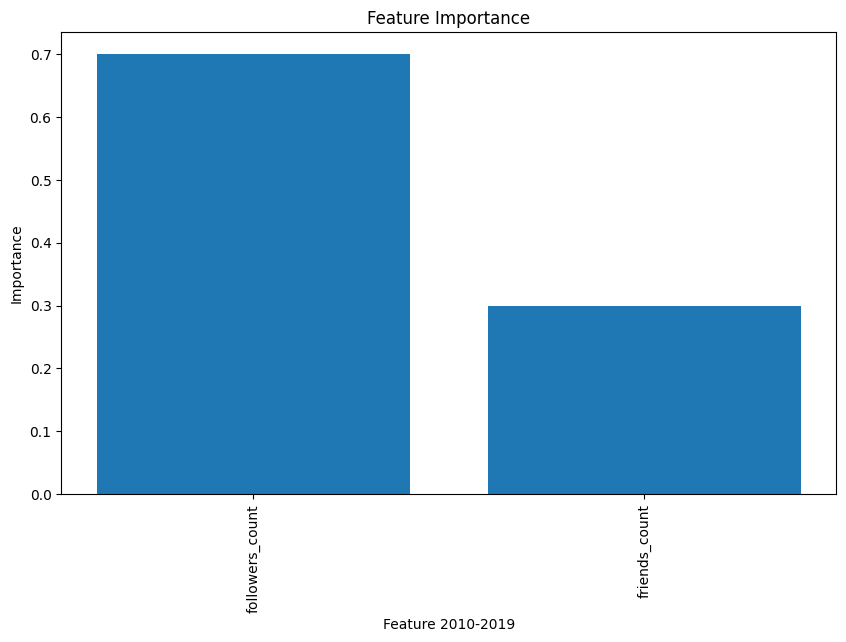

In [468]:
# Get feature importances
importances_2010_2019_exgi = model_2010_2019_exgi.feature_importances_

# Sort feature importances in descending order
sorted_indices_2010_2019_exgi = np.argsort(importances_2010_2019_exgi)[::-1]

# Get feature names (if available) to label the plot
feature_names_2010_2019_exgi =  X_train_2010_2019_exgi.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2010_2019_exgi.shape[1]), importances_2010_2019_exgi[sorted_indices_2010_2019_exgi], align="center")
plt.xticks(range(X_train_2010_2019_exgi.shape[1]), [feature_names_2010_2019_exgi[i] for i in sorted_indices_2010_2019_exgi], rotation=90)
plt.xlabel("Feature 2010-2019")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

###Probability Distributions

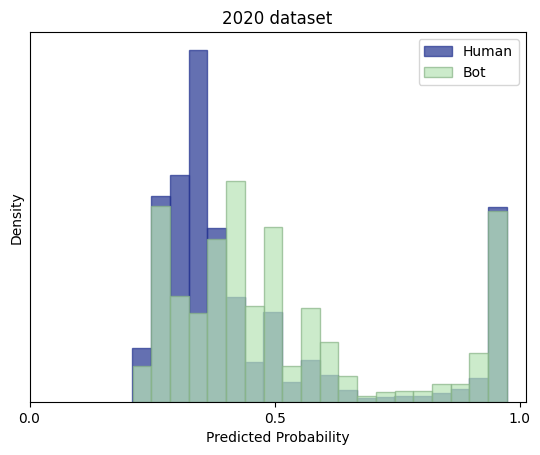

In [469]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2020_prob_exgi[y_twibot_20_sub == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390', density=True)

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2020_prob_exgi[y_twibot_20_sub == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385', density=True)

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2020 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

# Setting custom tick positions and labels for the x-axis
plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

## Cycle 8
- train on merged 2010 (caverlee-2011 and yang-2013),  2013 (cresci-2015), 2014 (cresci-2017), 2016 (gilani_2017), 2017 (stock_2018), 2018 (rtbust-2019 and midterm-2018), 2019 (feedback_2019) and 2020 (twibot_20)
- test on 2022 (twibot_2022)

### Merge datasets

In [470]:
X_train_2010_2020_exgi = pd.concat([X_train_2010_2019_exgi, X_train_twibot_20_sub], axis=0)
y_train_2010_2020_exgi = pd.concat([y_train_2010_2019_exgi, y_train_twibot_20_sub], axis=0)

X_val_2010_2020_exgi = pd.concat([X_val_2010_2019_exgi, X_val_twibot_20_sub], axis=0)
y_val_2010_2020_exgi = pd.concat([y_val_2010_2019_exgi, y_val_twibot_20_sub], axis=0)

X_test_2010_2020_exgi = pd.concat([X_test_2010_2019_exgi, X_test_twibot_20_sub], axis=0)
y_test_2010_2020_exgi = pd.concat([y_test_2010_2019_exgi, y_test_twibot_20_sub], axis=0)

X_train_2010_2020_exgi.drop(columns=['listed_count', 'tweet_count'], inplace=True)
X_val_2010_2020_exgi.drop(columns=['listed_count', 'tweet_count'], inplace=True)
X_test_2010_2020_exgi.drop(columns=['listed_count', 'tweet_count'], inplace=True)

# Print the shapes of the merged datasets
print("Merged Training Set:", X_train_2010_2020_exgi.shape)
print("Merged Validation Set:", X_val_2010_2020_exgi.shape)
print("Merged Test Set:", X_test_2010_2020_exgi.shape)


Merged Training Set: (101866, 2)
Merged Validation Set: (22420, 2)
Merged Test Set: (21243, 2)


### Train the model

In [471]:
# ESTABLISH BASELINE

# Create a Random Forest classifier
baseline_model_2010_2020_exgi = RandomForestClassifier(random_state=42)

# Fit the data
baseline_model_2010_2020_exgi.fit(X_train_2010_2020_exgi, y_train_2010_2020_exgi)

# Predict on the validation set
y_val_pred_2010_2020_exgi = baseline_model_2010_2020_exgi.predict(X_val_2010_2020_exgi)

# Calculate balanced accuracy
balanced_acc_baseline_2010_2020_exgi = balanced_accuracy_score(y_val_2010_2020_exgi, y_val_pred_2010_2020_exgi)

# Calculate F1 score
f1_baseline_2010_2020_exgi = f1_score(y_val_2010_2020_exgi, y_val_pred_2010_2020_exgi)

# Print the balanced accuracy on the validation set
print(f'Balanced accuracy on the validation set: {balanced_acc_baseline_2010_2020_exgi:.2f}')
print(f'F1 Score on the validation set: {f1_baseline_2010_2020_exgi:.2f}')

Balanced accuracy on the validation set: 0.72
F1 Score on the validation set: 0.79


In [472]:
# Fit the HalvingGridSearchCV object to the data
#grid_search.fit(X_train_2010_2020_exgi, y_train_2010_2020_exgi)

# Get the best hyperparameters
#best_params_2010_2020_exgi = grid_search.best_params_
best_params_2010_2020_exgi = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
print(f"Best param:", best_params_2010_2020_exgi)

Best param: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [473]:
# RETRAIN AND PREDICT

# Create a Random Forest classifier with the best hyperparameters
optimized_model_2010_2020_exgi = RandomForestClassifier(random_state=42, **best_params_2010_2020_exgi)

# Train the model on the entire training dataset
optimized_model_2010_2020_exgi.fit(X_train_2010_2020_exgi, y_train_2010_2020_exgi)

# Make predictions on the test set
y_val_pred_2010_2020_exgi_op = optimized_model_2010_2020_exgi.predict(X_val_2010_2020_exgi)

# EVALUATE THE OPTIMIZED MODEL

# Calculate balanced accuracy
balanced_acc_op_2010_2020_exgi = balanced_accuracy_score(y_val_2010_2020_exgi, y_val_pred_2010_2020_exgi_op)

# Calculate F1 score
f1_op_2010_2020_exgi = f1_score(y_val_2010_2020_exgi, y_val_pred_2010_2020_exgi_op)

# Print the balanced accuracy on the test set
print(f'Balanced accuracy on the test set: {balanced_acc_op_2010_2020_exgi:.2f}')
print(f'F1 Score on the test set: {f1_op_2010_2020_exgi:.2f}')

Balanced accuracy on the test set: 0.76
F1 Score on the test set: 0.80


In [474]:
# Save the model
if balanced_acc_baseline_2010_2020_exgi < balanced_acc_op_2010_2020_exgi:
    joblib.dump(optimized_model_2010_2020_exgi, 'rf_2010_2020_exgi.pkl')
    balanced_acc_2010_2020_exgi = balanced_acc_op_2010_2020_exgi
    print('Saved model: optimized')
elif balanced_acc_baseline_2010_2020_exgi == balanced_acc_op_2010_2020_exgi and f1_baseline_2010_2020_exgi < f1_op_2010_2020_exgi:
    joblib.dump(optimized_model_2010_2020_exgi, 'rf_2010_2020_exgi.pkl')
    balanced_acc_2010_2020_exgi = balanced_acc_op_2010_2020_exgi
    print('Saved model: optimized')
else:
    joblib.dump(baseline_model_2010_2020_exgi, 'rf_2010_2020_exgi.pkl')
    balanced_acc_2010_2020_exgi = balanced_acc_baseline_2010_2020_exgi
    print('Saved model: baseline')


Saved model: optimized


### Predict 2022

In-domain

In [475]:
model_2010_2020_exgi = joblib.load('rf_2010_2020_exgi.pkl')

y_test_pred_2010_2020_exgi = model_2010_2020_exgi.predict(X_test_2010_2020_exgi)
y_test_pred_2010_2020_prob_exgi = model_2010_2020_exgi.predict_proba(X_test_2010_2020_exgi)[:, 1]
balanced_acc_2010_2020_exgi = balanced_accuracy_score(y_test_2010_2020_exgi, y_test_pred_2010_2020_exgi)
balanced_acc_2010_2020_exgi

0.7656140966078404

Cross-dataset

In [476]:
X_2022_exgi = X_twibot_22[['friends_count', 'followers_count']].copy()

model_2010_2020_exgi = joblib.load('rf_2010_2020_exgi.pkl')

y_pred_2022_exgi = model_2010_2020_exgi.predict(X_2022_exgi)
y_pred_2022_prob_exgi = model_2010_2020_exgi.predict_proba(X_2022_exgi)[:, 1]
balanced_acc_pred_2022_exgi = balanced_accuracy_score(y_twibot_22, y_pred_2022_exgi)
f1_2022_exgi = f1_score(y_twibot_22, y_pred_2022_exgi)
balanced_acc_pred_2022_exgi

0.6312284191335745

###Feature importance 2010-2020

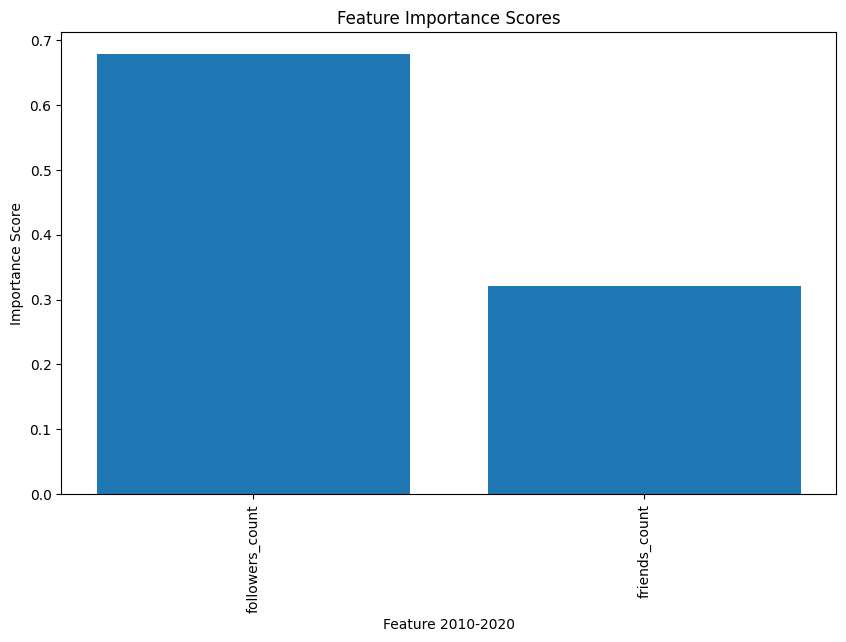

In [477]:
# Get feature importances
importances_2010_2020_exgi = model_2010_2020_exgi.feature_importances_

# Sort feature importances in descending order
sorted_indices_2010_2020_exgi = np.argsort(importances_2010_2020_exgi)[::-1]

# Get feature names (if available) to label the plot
feature_names_2010_2020_exgi =  X_train_2010_2020_exgi.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_2010_2020_exgi.shape[1]), importances_2010_2020_exgi[sorted_indices_2010_2020_exgi], align="center")
plt.xticks(range(X_train_2010_2020_exgi.shape[1]), [feature_names_2010_2020_exgi[i] for i in sorted_indices_2010_2020_exgi], rotation=90)
plt.xlabel("Feature 2010-2020")
plt.ylabel("Importance Score")
plt.title("Feature Importance Scores")
plt.show()

###Probability Distribution

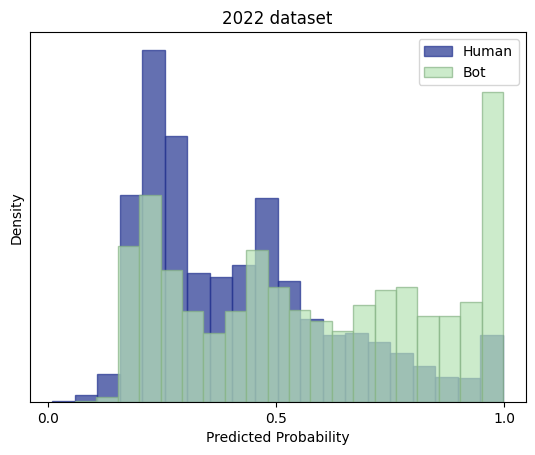

In [478]:
# Plotting histogram for predicted probabilities of human accounts in the twibot_22 test dataset
plt.hist(y_pred_2022_prob_exgi[y_twibot_22 == 0], color='#233390', label='Human', bins=20, alpha= 0.7, edgecolor='#233390', density=True)

# Plotting histogram for predicted probabilities of bot accounts in the twibot_22 test dataset
plt.hist(y_pred_2022_prob_exgi[y_twibot_22 == 1], color='#B7E3B6', label='Bot', bins=20, alpha=0.7, edgecolor='#86B385', density=True)

# Adding a legend to the plot
plt.legend()

# Setting the title for the plot
plt.title("2022 dataset")

# Setting the x-axis label
plt.xlabel("Predicted Probability")

# Setting the y-axis label
plt.ylabel("Density")

plt.xticks([0.0, 0.5, 1.0])
plt.yticks([])

# Displaying the plot
plt.show()

## Line chart

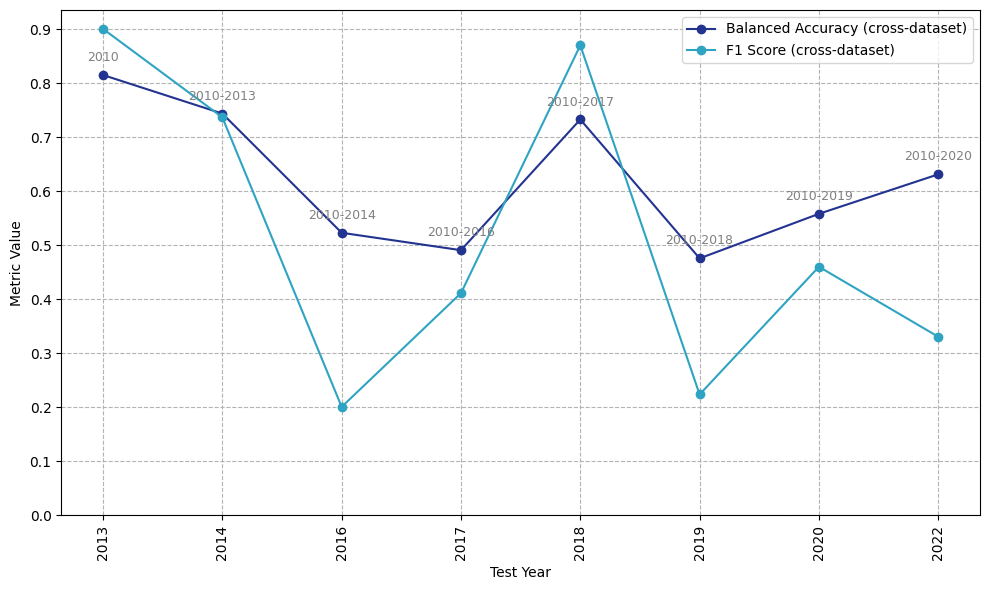

In [479]:
# Training years
training_years = ["2010", "2010-2013", "2010-2014", "2010-2016", "2010-2017", '2010-2018', '2010-2019', '2010-2020']

# Testing years
testing_years = ["2013", "2014", "2016", "2017", "2018", "2019", "2020", "2022"]

# Performance metrics from your experiment
balanced_accuracy_exgi = [balanced_acc_pred_2013, balanced_acc_pred_2014_exgi, balanced_acc_pred_2016_exgi, balanced_acc_pred_2017_exgi, balanced_acc_pred_2018_exgi, balanced_acc_pred_2019_exgi,
           balanced_acc_pred_2020_exgi, balanced_acc_pred_2022_exgi]

f1_score_list_exgi = [f1_2013, f1_2014_exgi, f1_2016_exgi, f1_2017_exgi, f1_2018_exgi,
                      f1_2019_exgi, f1_2020_exgi, f1_2022_exgi ]


plt.figure(figsize=(10,6))

# Plotting the data
plt.plot(testing_years, balanced_accuracy_exgi, marker='o', label='Balanced Accuracy (cross-dataset)', color='#233390')
plt.plot(testing_years, f1_score_list_exgi, marker='o', label='F1 Score (cross-dataset)', color='#2FA4C2')

# Annotating each point with the corresponding training year(s)
for i, year in enumerate(testing_years):
    plt.annotate(f'{training_years[i]}',
                 (year, balanced_accuracy_exgi[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=9,
                 color='grey',
                 rotation = 0)

# Setting up the x-axis
plt.xlabel('Test Year')
plt.ylabel('Metric Value')
plt.xticks(ticks=testing_years, labels=testing_years, rotation=90)

# Modify the y-axis to have a more granular range with increments of 0.1
y_max = plt.ylim()[1]  # Get the current maximum of the y-axis
y_ticks = np.arange(0, round(y_max, 1) + 0.1, 0.1)  # Set new ticks from 0 to y_max with a step of 0.1
plt.yticks(y_ticks, [f'{y:.1f}' for y in y_ticks])  # Set tick labels with one decimal place

# Finalizing the plot
plt.legend()
plt.tight_layout()
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()


## Feature Importance 2010-2020

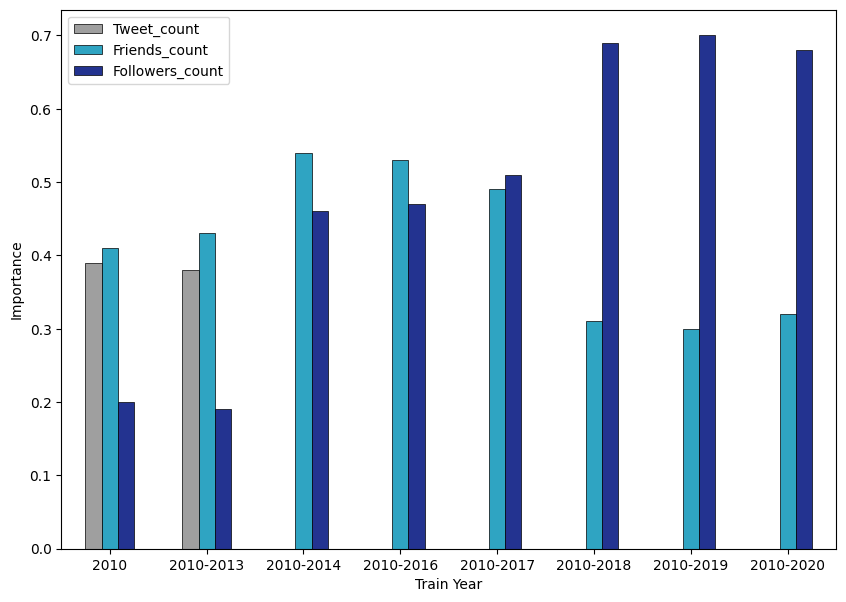

In [480]:
# Data
data_feat_import_exgi = {
    'Train Year': ['2010', '2010-2013', '2010-2014', '2010-2016', '2010-2017', '2010-2018', '2010-2019', '2010-2020'],
    'Tweet_count': [0.39, 0.38, 0, 0, 0, 0, 0, 0],
    'Friends_count': [0.41, 0.43, 0.54, 0.53, 0.49, 0.31, 0.30, 0.32],
    'Followers_count': [0.2, 0.19, 0.46, 0.47, 0.51, 0.69, 0.70, 0.68]
}

# Convert the dictionary to a pandas DataFrame and set 'Period' as the index
df_feat_import_exgi = pd.DataFrame(data_feat_import_exgi)
df_feat_import_exgi.set_index('Train Year', inplace=True)

# Define the edge color and width
edge_color = 'black'
edge_width = 0.5  # Adjust the width as desired

# Plotting the bar chart with centered period labels, edge color, and reduced opacity
ax = df_feat_import_exgi.plot(kind='bar', figsize=(10, 7),
                         color=['#9F9F9F', '#2FA4C2', '#233390', '#83CEBB'],
                         edgecolor=edge_color,
                         linewidth=edge_width)

# Setting the ylabel
ax.set_ylabel('Importance')

# Centering the period labels
ax.set_xticks(range(len(df_feat_import_exgi.index)))
ax.set_xticklabels(df_feat_import_exgi.index, rotation=0, ha='center')
#ax = plt.gca()
# Showing the plot
plt.show()

## In-domain vs cross-dataset bars

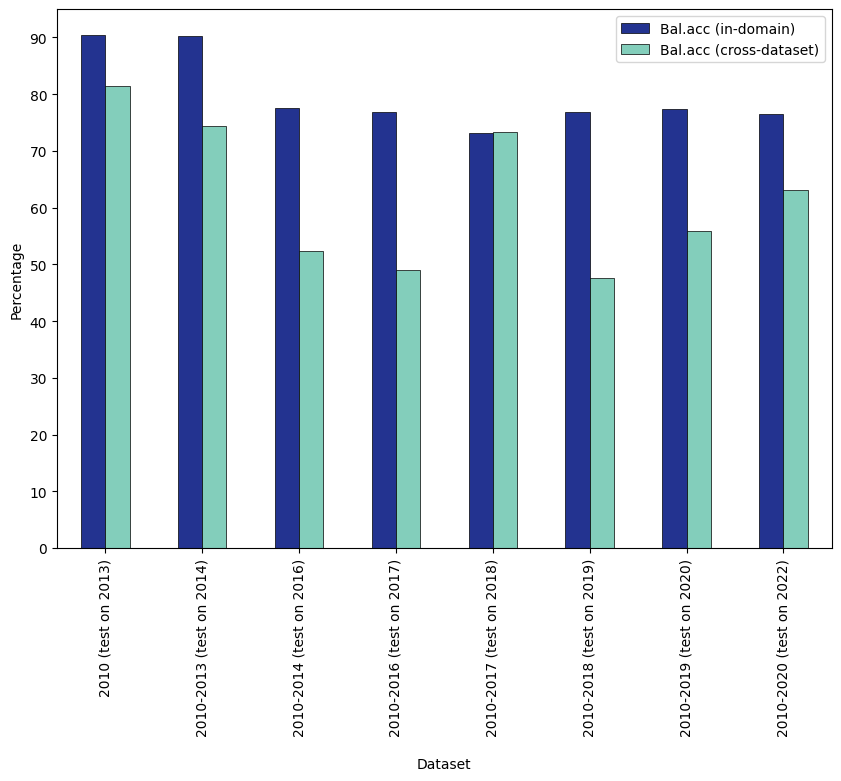

In [481]:
# Data
bal_acc_cross_ex3 = [round(val * 100, 2) for val in [balanced_acc_pred_2013, balanced_acc_pred_2014_exgi,
                                                   balanced_acc_pred_2016_exgi, balanced_acc_pred_2017_exgi,
                                                   balanced_acc_pred_2018_exgi, balanced_acc_pred_2019_exgi,
                                                   balanced_acc_pred_2020_exgi, balanced_acc_pred_2022_exgi]]

bal_acc_indomain_ex3 = [round(val * 100, 2) for val in [balanced_acc_2010, balanced_acc_2010_2013_exgi,
                                                   balanced_acc_2010_2014_exgi, balanced_acc_2010_2016_exgi,
                                                   balanced_acc_2010_2017_exgi, balanced_acc_2010_2018_exgi,
                                                  balanced_acc_2010_2019_exgi, balanced_acc_2010_2020_exgi]]

data_indomain_cross_ex3 = {
    'Dataset': ['2010 (test on 2013)', '2010-2013 (test on 2014)',
                '2010-2014 (test on 2016)', '2010-2016 (test on 2017)', '2010-2017 (test on 2018)', '2010-2018 (test on 2019)', '2010-2019 (test on 2020)', '2010-2020 (test on 2022)'],
    'Bal.acc (in-domain)': bal_acc_indomain_ex3,
    'Bal.acc (cross-dataset)': bal_acc_cross_ex3
}

custom_colors = ['#233390', '#83CEBB']

# Create a DataFrame from the dictionary
df_ex3 = pd.DataFrame(data_indomain_cross_ex3)

# Set the 'Dataset' column as the x-axis (index) for the bar chart
df_ex3.set_index('Dataset', inplace=True)

# Plotting the bar chart
ax = df_ex3.plot(kind='bar', figsize=(10, 7), color=custom_colors, edgecolor='black', linewidth=0.5)
ax.set_ylabel('Percentage')
ax.set_xlabel('Dataset')

# Set x-label rotation to 0 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.labelpad = 15

y_ticks = np.arange(0, 100, 10)
ax.set_yticks(y_ticks)
#ax = plt.gca()
# Showing the plot
plt.show()